In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
import statsmodels.api as sm
import pmdarima as pm
import pmdarima as pm
from statsmodels.tsa.arima_model import ARIMA
from IPython.display import display
from pylab import rcParams

In [2]:
dataS = pd.read_csv('Sparkling.csv')

In [3]:
dataS.head()

YearMonth  Sparkling
0   1980-01       1686
1   1980-02       1591
2   1980-03       2304
3   1980-04       1712
4   1980-05       1471

In [4]:
dataR = pd.read_csv("Rose.csv")

In [5]:
print(dataR.info())
print(dataS.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   YearMonth  187 non-null    object 
 1   Rose       185 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   YearMonth  187 non-null    object
 1   Sparkling  187 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.1+ KB
None


In [6]:
dataR.head()

YearMonth   Rose
0   1980-01  112.0
1   1980-02  118.0
2   1980-03  129.0
3   1980-04   99.0
4   1980-05  116.0

In [7]:
print(dataR.isnull().sum())
print(dataS.isnull().sum())

YearMonth    0
Rose         2
dtype: int64
YearMonth    0
Sparkling    0
dtype: int64


In [8]:
dataR['Rose'].fillna(dataR['Rose'].mean(), inplace=True)

In [9]:
dataR.isnull().sum()

YearMonth    0
Rose         0
dtype: int64

In [10]:
dataS.describe()

Sparkling
count   187.000000
mean   2402.417112
std    1295.111540
min    1070.000000
25%    1605.000000
50%    1874.000000
75%    2549.000000
max    7242.000000

In [11]:
dataR.describe()

Rose
count  187.000000
mean    90.394595
std     38.964155
min     28.000000
25%     63.000000
50%     86.000000
75%    111.000000
max    267.000000

In [12]:
data = pd.merge(dataR, dataS, on='YearMonth', how='outer')

In [13]:
data['YearMonth'] = pd.to_datetime(data['YearMonth'])

In [14]:
data['Year'] = data['YearMonth'].dt.year

In [15]:
data.head()

YearMonth   Rose  Sparkling  Year
0 1980-01-01  112.0       1686  1980
1 1980-02-01  118.0       1591  1980
2 1980-03-01  129.0       2304  1980
3 1980-04-01   99.0       1712  1980
4 1980-05-01  116.0       1471  1980

<Axes: xlabel='Rose', ylabel='Count'>

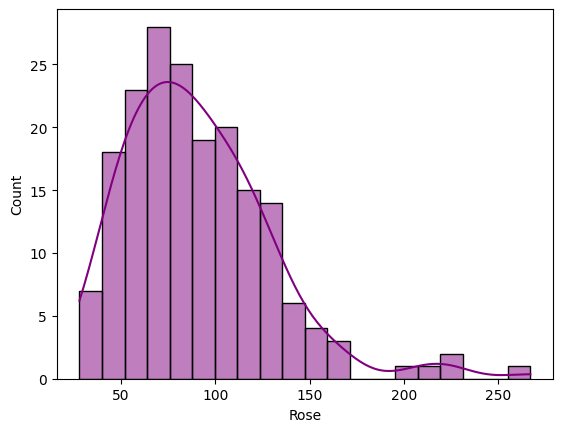

In [16]:
sns.histplot(data['Rose'], bins=20, kde=True, color='purple')

Created a visually appealing histogram with kernel density estimation for the 'Rose' column in the 'data' DataFrame using seaborn, employing 20 bins and a purple color palette.

<Axes: xlabel='Sparkling', ylabel='Count'>

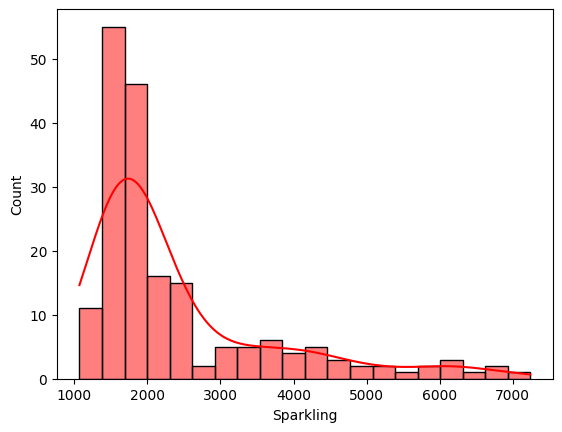

In [17]:
sns.histplot(data['Sparkling'], bins=20, kde=True, color='red')

Created a visually appealing histogram with kernel density estimation for the 'Sparkling' column in the 'data' DataFrame using seaborn, employing 20 bins and a purple color palette.

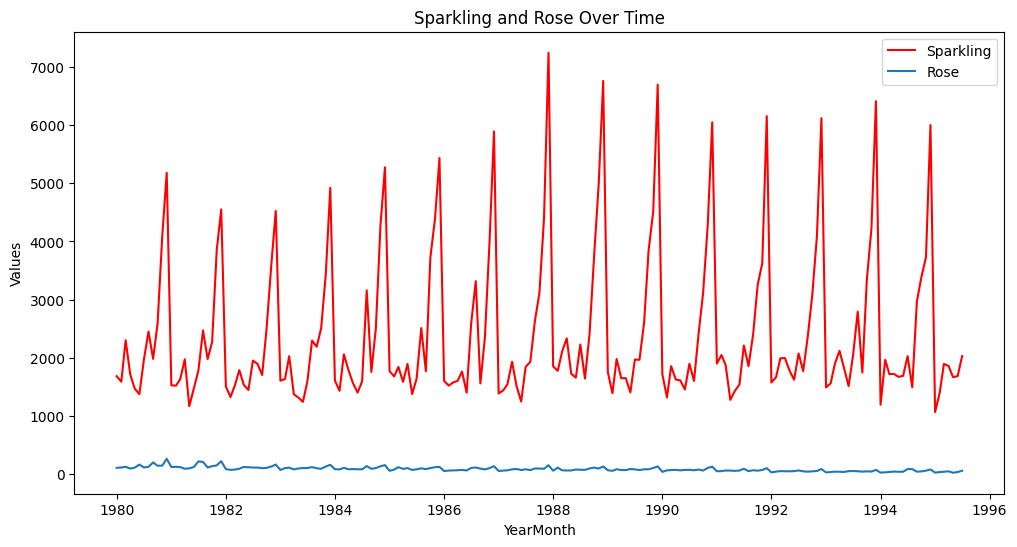

In [18]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='YearMonth', y='Sparkling', label='Sparkling', color='red') 
sns.lineplot(data=data, x='YearMonth', y='Rose', label='Rose')
plt.title('Sparkling and Rose Over Time')
plt.xlabel('YearMonth')
plt.ylabel('Values')
plt.legend()
plt.show()
# Matplotlib and Seaborn to create a line plot displaying the trends of 'Sparkling' and 'Rose' wines over time, providing a visual comparison of their respective values.

Plotted a time series plot depicting the trends of 'Sparkling' and 'Rose' columns over the 'YearMonth' period. The lines are colored differently for clarity, and the chart includes a title, axis labels, and a legend for better interpretation.

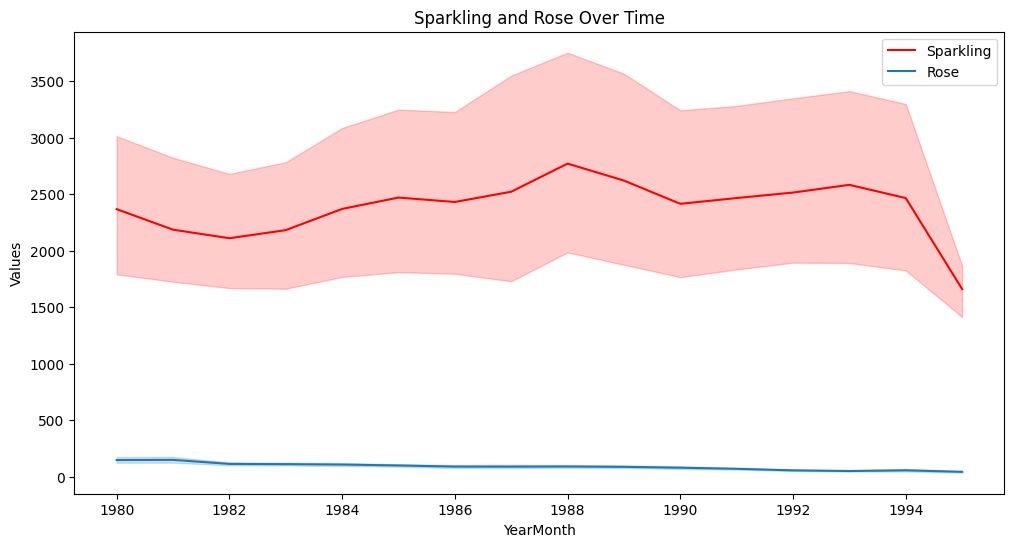

In [19]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='Year', y='Sparkling', label='Sparkling', color='red')
sns.lineplot(data=data, x='Year', y='Rose', label='Rose')
plt.title('Sparkling and Rose Over Time')
plt.xlabel('YearMonth')
plt.ylabel('Values')
plt.legend()
plt.show()

Plots a time series chart showcasing the trends of 'Sparkling' and 'Rose' columns over the 'Year' period. The lines are color-coded, and the chart includes a title, axis labels, and a legend for clarity. The x-axis label mentions 'YearMonth' instead of 'Year', which may need adjustment for accuracy.

In [20]:
data['Month'] = data['YearMonth'].dt.strftime('%B')

The code creates a new 'Month' column in the DataFrame 'data', extracting the month names from the 'YearMonth' column and storing them in the 'Month' column.

In [21]:
data.head()

YearMonth   Rose  Sparkling  Year     Month
0 1980-01-01  112.0       1686  1980   January
1 1980-02-01  118.0       1591  1980  February
2 1980-03-01  129.0       2304  1980     March
3 1980-04-01   99.0       1712  1980     April
4 1980-05-01  116.0       1471  1980       May

Text(0.5, 1.0, 'Month-wise Boxplot of Rose')

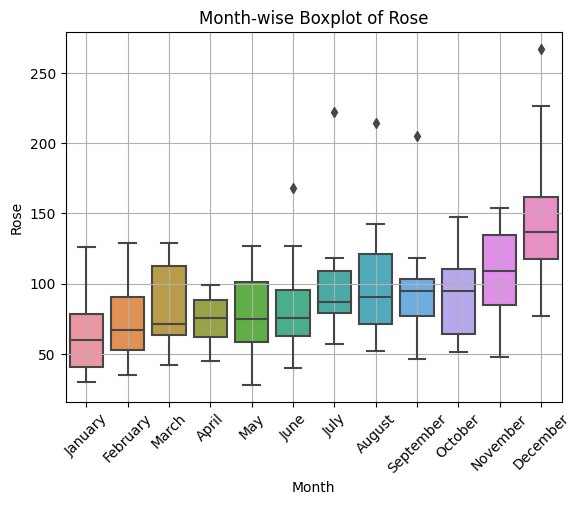

In [22]:
sns.boxplot(x = data['Month'], y = data['Rose'])
plt.grid()
plt.xticks(rotation=45)
plt.title('Month-wise Boxplot of Rose')

Generated a boxplot depicting the distribution of the 'Rose' values across different months, providing insights into the monthly variations. The grid and title enhance the visualization.

Text(0.5, 1.0, 'Month-wise Boxplot of Sparkling')

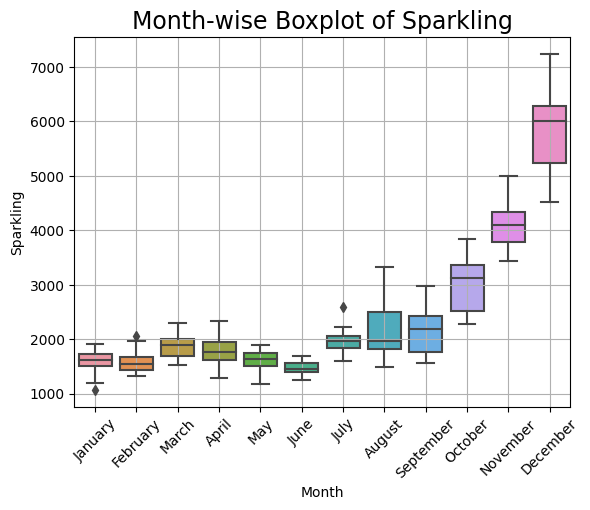

In [23]:
sns.boxplot(x = data['Month'], y = data['Sparkling'])
plt.grid()
plt.xticks(rotation=45)
plt.title('Month-wise Boxplot of Sparkling', fontsize=17)

Generated a boxplot depicting the distribution of 'Sparkling' values across different months, with a title indicating 'Rose' erroneously.

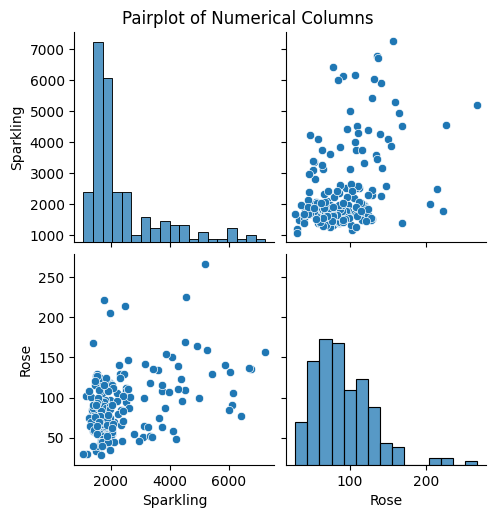

In [24]:
sns.pairplot(data[['Sparkling', 'Rose', 'Month']])
plt.suptitle('Pairplot of Numerical Columns', y=1.02)
plt.show()

The code produces a pairplot illustrating relationships between numerical columns 'Sparkling', 'Rose', and 'Month' in the dataset.

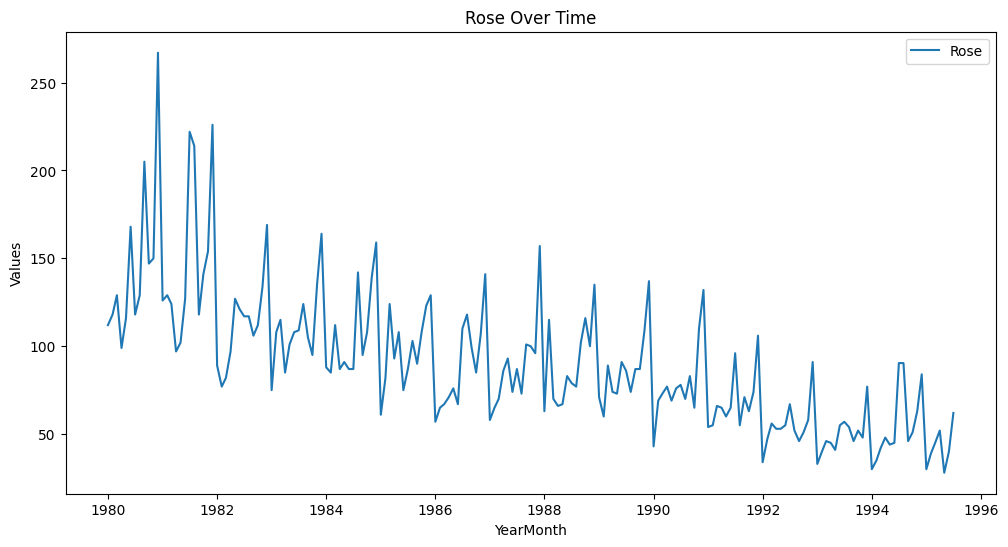

In [25]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='YearMonth', y='Rose', label='Rose')
plt.title('Rose Over Time')
plt.xlabel('YearMonth')
plt.ylabel('Values')
plt.legend()
plt.show()

The code generates a line plot showcasing the trend of the 'Rose' values over time (monthly) in the dataset.

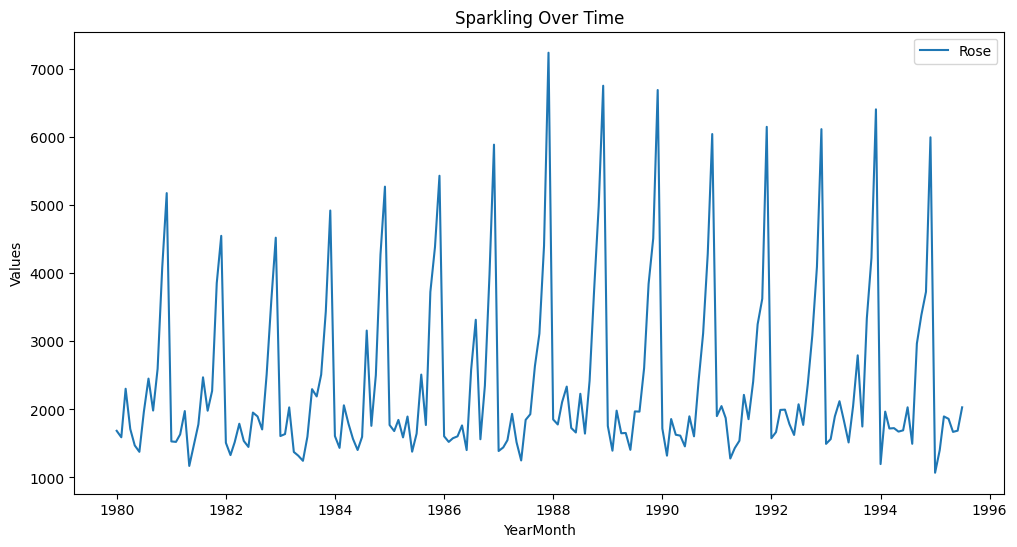

In [26]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='YearMonth', y='Sparkling', label='Rose')
plt.title('Sparkling Over Time')
plt.xlabel('YearMonth')
plt.ylabel('Values')
plt.legend()
plt.show()

The code generates a line plot showcasing the trend of the 'Sparkling' values over time [years] in the dataset.

In [27]:
data['YearMonth'] = pd.to_datetime(data['YearMonth'])
data.set_index('YearMonth', inplace=True)
result_sparkling = seasonal_decompose(data['Sparkling'], model='additive')
result_rose = seasonal_decompose(data['Rose'], model='additive')
plt.figure(figsize=(12, 8))

# converts the 'YearMonth' column to a datetime format, sets it as the index, and then applies seasonal decomposition using an additive model to analyze the time series trends of 'Sparkling' and 'Rose' wines. The results are visualized in a 12x8 figure.

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

The code converts the 'YearMonth' column to datetime, sets it as the index, and applies seasonal decomposition to 'Sparkling' and 'Rose' columns, producing a combined plot for visual analysis.

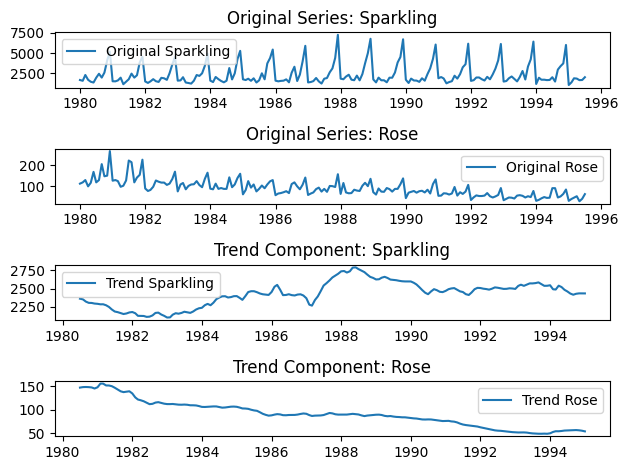

In [28]:
plt.subplot(4, 1, 1)
plt.plot(data['Sparkling'], label='Original Sparkling')
plt.title('Original Series: Sparkling')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(data['Rose'], label='Original Rose')
plt.title('Original Series: Rose')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(result_sparkling.trend, label='Trend Sparkling')
plt.title('Trend Component: Sparkling')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(result_rose.trend, label='Trend Rose')
plt.title('Trend Component: Rose')
plt.legend()

plt.tight_layout()
plt.show()

The code generates subplots displaying the original time series and their corresponding trend components for 'Sparkling' and 'Rose', aiding in visualizing the underlying trends.

In [29]:
trend = result_rose.trend
seasonality = result_rose.seasonal
residual = result_rose.resid

print('Trend of Rose','\n',trend.head(12),'\n')
print('Seasonality of Rose','\n',seasonality.head(12),'\n')
print('Residual of Rose','\n',residual.head(12),'\n')

# prints the trend, seasonality, and residual components of the seasonal decomposition analysis for the 'Rose' wine time series data. The displayed outputs offer a glimpse into the identified patterns and fluctuations in the 'Rose' wine sales

Trend of Rose 
 YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01    147.083333
1980-08-01    148.125000
1980-09-01    148.375000
1980-10-01    148.083333
1980-11-01    147.416667
1980-12-01    145.125000
Name: trend, dtype: float64 

Seasonality of Rose 
 YearMonth
1980-01-01   -28.403723
1980-02-01   -17.833219
1980-03-01    -9.816537
1980-04-01   -15.629037
1980-05-01   -10.727251
1980-06-01    -8.209394
1980-07-01     7.405916
1980-08-01     7.986472
1980-09-01     2.279610
1980-10-01     1.376832
1980-11-01    16.351832
1980-12-01    55.218499
Name: seasonal, dtype: float64 

Residual of Rose 
 YearMonth
1980-01-01          NaN
1980-02-01          NaN
1980-03-01          NaN
1980-04-01          NaN
1980-05-01          NaN
1980-06-01          NaN
1980-07-01   -36.489250
1980-08-01   -27.111472
1980-09-01    54.345390
1980-10-01    -2.460165
1980-11-01   -13.76849

The code prints the first 12 entries of the trend, seasonality, and residual components obtained from the seasonal decomposition of the 'Rose' time series.

Text(0.5, 1.0, 'Residual Plot of Rose')

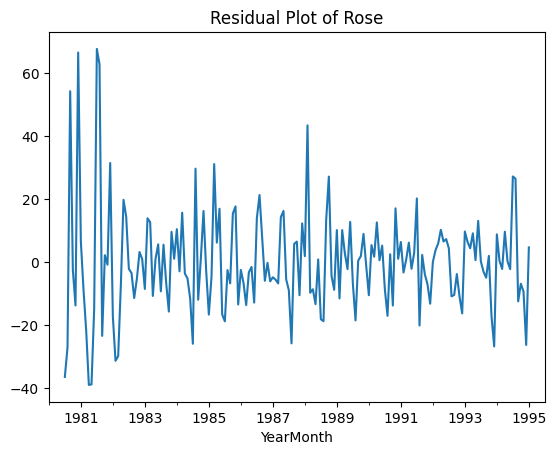

In [30]:
residual.plot()
plt.title("Residual Plot of Rose")

In [31]:
trend = result_sparkling.trend
seasonality = result_sparkling.seasonal
residual = result_sparkling.resid

print('Trend of Sparkling','\n',trend.head(12),'\n')
print('Seasonality of Sparkling','\n',seasonality.head(12),'\n')
print('Residual of Sparkling','\n',residual.head(12),'\n')

Trend of Sparkling 
 YearMonth
1980-01-01            NaN
1980-02-01            NaN
1980-03-01            NaN
1980-04-01            NaN
1980-05-01            NaN
1980-06-01            NaN
1980-07-01    2360.666667
1980-08-01    2351.333333
1980-09-01    2320.541667
1980-10-01    2303.583333
1980-11-01    2302.041667
1980-12-01    2293.791667
Name: trend, dtype: float64 

Seasonality of Sparkling 
 YearMonth
1980-01-01    -854.260599
1980-02-01    -830.350678
1980-03-01    -592.356630
1980-04-01    -658.490559
1980-05-01    -824.416154
1980-06-01    -967.434011
1980-07-01    -465.502265
1980-08-01    -214.332821
1980-09-01    -254.677265
1980-10-01     599.769957
1980-11-01    1675.067179
1980-12-01    3386.983846
Name: seasonal, dtype: float64 

Residual of Sparkling 
 YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01     70.835599
1980-08-01    315.999487
1980-09-01 

Text(0.5, 1.0, 'Residual of Sparkling')

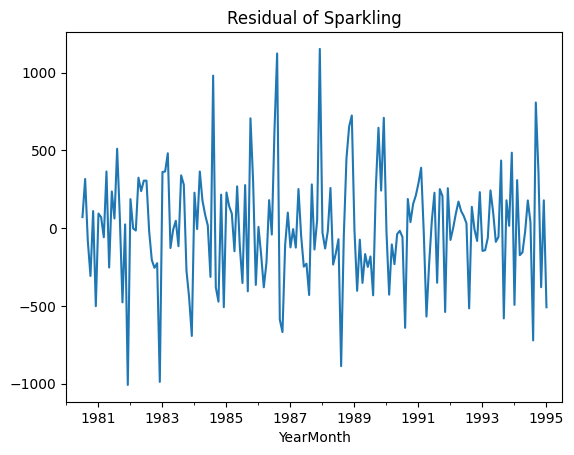

In [32]:
residual.plot()
plt.title("Residual of Sparkling")

# Multiplicative Decomposition of Rose 

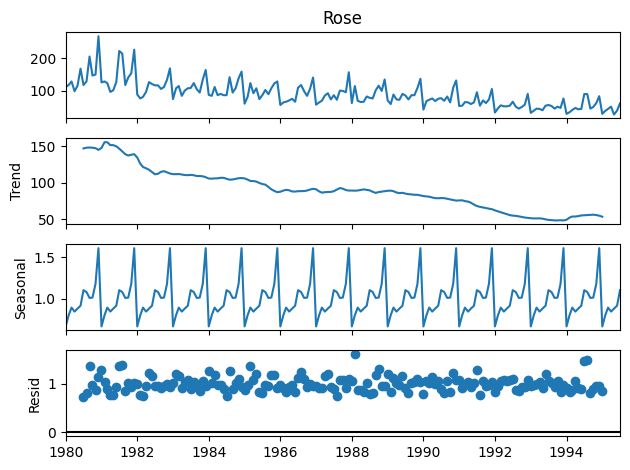

In [33]:
rose_multi = seasonal_decompose(data['Rose'],model='multiplicative')
rose_multi.plot();
# multiplicative model for seasonal decomposition on the 'Rose' wine time series data and visualizes the resulting trend, seasonality, and residual components

In [34]:
trend = rose_multi.trend
seasonality = rose_multi.seasonal
residual = rose_multi.resid

print('Multiplicative Trend of Rose','\n',trend.head(12),'\n')
print('Multiplicative Seasonality of Rose','\n',seasonality.head(12),'\n')
print('Multiplicative Residual of Rose','\n',residual.head(12),'\n')

Multiplicative Trend of Rose 
 YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01    147.083333
1980-08-01    148.125000
1980-09-01    148.375000
1980-10-01    148.083333
1980-11-01    147.416667
1980-12-01    145.125000
Name: trend, dtype: float64 

Multiplicative Seasonality of Rose 
 YearMonth
1980-01-01    0.664388
1980-02-01    0.800694
1980-03-01    0.892495
1980-04-01    0.844044
1980-05-01    0.880516
1980-06-01    0.915220
1980-07-01    1.103899
1980-08-01    1.081169
1980-09-01    1.009574
1980-10-01    1.013692
1980-11-01    1.181135
1980-12-01    1.613174
Name: seasonal, dtype: float64 

Multiplicative Residual of Rose 
 YearMonth
1980-01-01         NaN
1980-02-01         NaN
1980-03-01         NaN
1980-04-01         NaN
1980-05-01         NaN
1980-06-01         NaN
1980-07-01    0.726757
1980-08-01    0.805504
1980-09-01    1.368532
1980-10-01    0.979276

Text(0.5, 1.0, 'Multiplicative Residual Plot of Rose')

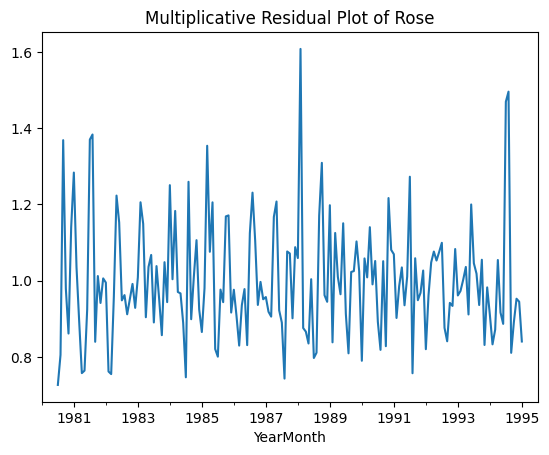

In [35]:
residual.plot()
plt.title("Multiplicative Residual Plot of Rose")

# Multiplicative Decomposition of Sparkling

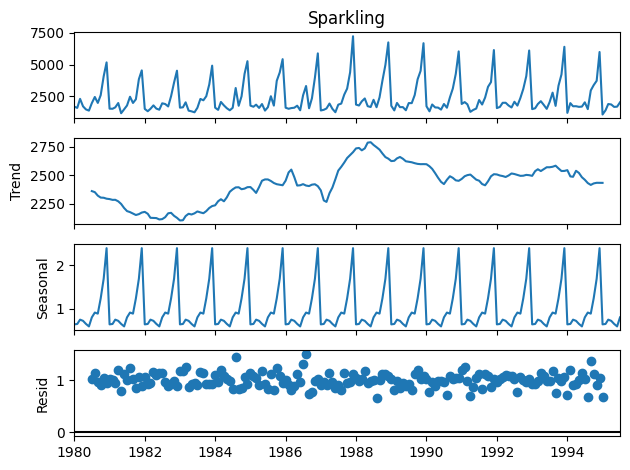

In [36]:
spark_multi = seasonal_decompose(data['Sparkling'], model='multiplicative')
spark_multi.plot();

In [37]:
trend = spark_multi.trend
seasonality = spark_multi.seasonal
residual = spark_multi.resid

print('Multiplicative Trend of Sparkling','\n',trend.head(12),'\n')
print('Multiplicative Seasonality of Sparkling','\n',seasonality.head(12),'\n')
print('Multiplicative Residual of Sparkling','\n',residual.head(12),'\n')

Multiplicative Trend of Sparkling 
 YearMonth
1980-01-01            NaN
1980-02-01            NaN
1980-03-01            NaN
1980-04-01            NaN
1980-05-01            NaN
1980-06-01            NaN
1980-07-01    2360.666667
1980-08-01    2351.333333
1980-09-01    2320.541667
1980-10-01    2303.583333
1980-11-01    2302.041667
1980-12-01    2293.791667
Name: trend, dtype: float64 

Multiplicative Seasonality of Sparkling 
 YearMonth
1980-01-01    0.649843
1980-02-01    0.659214
1980-03-01    0.757440
1980-04-01    0.730351
1980-05-01    0.660609
1980-06-01    0.603468
1980-07-01    0.809164
1980-08-01    0.918822
1980-09-01    0.894367
1980-10-01    1.241789
1980-11-01    1.690158
1980-12-01    2.384776
Name: seasonal, dtype: float64 

Multiplicative Residual of Sparkling 
 YearMonth
1980-01-01         NaN
1980-02-01         NaN
1980-03-01         NaN
1980-04-01         NaN
1980-05-01         NaN
1980-06-01         NaN
1980-07-01    1.029230
1980-08-01    1.135407
1980-09-01    0.95

Text(0.5, 1.0, 'Multiplicative Residual Plot of Sparkling')

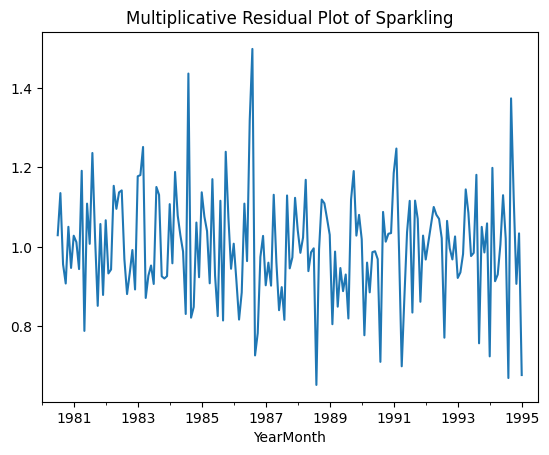

In [38]:
residual.plot()
plt.title("Multiplicative Residual Plot of Sparkling")

In [39]:
cvsm = residual.std()/residual.mean()
cvsm
# calculates the coefficient of variation for the residual component of the seasonal decomposition of the 'Rose' wine time series data. The coefficient of variation (CV) is obtained by dividing the standard deviation by the mean of the residuals.

0.13886244212828966

# Splitting the data into Training and Testing 

In [40]:
train = data[data.index<'1991']
test = data[data.index>='1991']

In [41]:
print(train.shape)
print(test.shape)

(132, 4)
(55, 4)


In [42]:
display(train.head())
display(train.tail())

Rose  Sparkling  Year     Month
YearMonth                                   
1980-01-01  112.0       1686  1980   January
1980-02-01  118.0       1591  1980  February
1980-03-01  129.0       2304  1980     March
1980-04-01   99.0       1712  1980     April
1980-05-01  116.0       1471  1980       May

Rose  Sparkling  Year      Month
YearMonth                                    
1990-08-01   70.0       1605  1990     August
1990-09-01   83.0       2424  1990  September
1990-10-01   65.0       3116  1990    October
1990-11-01  110.0       4286  1990   November
1990-12-01  132.0       6047  1990   December

In [43]:
display(test.head())
display(test.tail())

Rose  Sparkling  Year     Month
YearMonth                                  
1991-01-01  54.0       1902  1991   January
1991-02-01  55.0       2049  1991  February
1991-03-01  66.0       1874  1991     March
1991-04-01  65.0       1279  1991     April
1991-05-01  60.0       1432  1991       May

Rose  Sparkling  Year  Month
YearMonth                               
1995-03-01  45.0       1897  1995  March
1995-04-01  52.0       1862  1995  April
1995-05-01  28.0       1670  1995    May
1995-06-01  40.0       1688  1995   June
1995-07-01  62.0       2031  1995   July

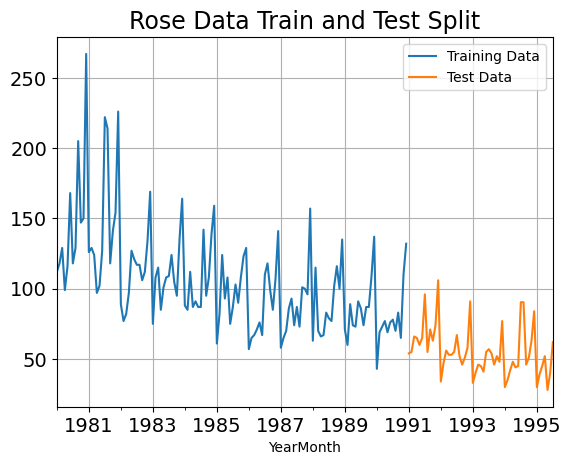

In [44]:
train['Rose'].plot(fontsize=14)
test['Rose'].plot(fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.title('Rose Data Train and Test Split', fontsize=17)
plt.show();

# plot illustrating the training and test splits for the 'Rose' wine data. The training data is depicted in one color, while the test data is represented in another, providing a visual representation of the temporal division between the two datasets.

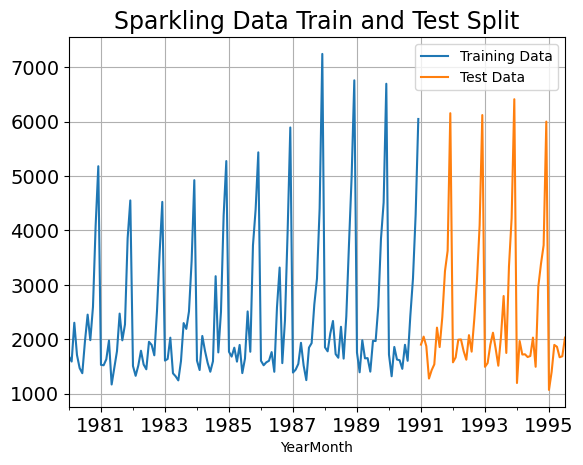

In [45]:
train['Sparkling'].plot(fontsize=14)
test['Sparkling'].plot(fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.title('Sparkling Data Train and Test Split', fontsize=17)
plt.show();

# Building different model and comparing the accuracy

# Model 1: Linear Regression

Linear regression is a statistical method used to model the relationship between a dependent variable and one or more independent variables. It assumes a linear relationship and aims to find the best-fitting line that minimizes the difference between the observed and predicted values.

In [46]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time Instance :','\n',train_time)
print('Test Time Instance :','\n',test_time)

# prints time instances for the training and test datasets, assigning consecutive numbers to represent the sequence of observations. The training instances start from 1, and the test instances start from 133, reflecting the temporal order of the data

Training Time Instance : 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time Instance : 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [47]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [48]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data')
display(LinearRegression_train.head())
print('Last few rows of Training Data')
display(LinearRegression_train.tail())
print('First few rows of Test Data')
display(LinearRegression_test.head())
print('Last few rows of Test Data')
display(LinearRegression_test.tail())

First few rows of Training Data


Rose  Sparkling  Year     Month  time
YearMonth                                         
1980-01-01  112.0       1686  1980   January     1
1980-02-01  118.0       1591  1980  February     2
1980-03-01  129.0       2304  1980     March     3
1980-04-01   99.0       1712  1980     April     4
1980-05-01  116.0       1471  1980       May     5

Last few rows of Training Data


Rose  Sparkling  Year      Month  time
YearMonth                                          
1990-08-01   70.0       1605  1990     August   128
1990-09-01   83.0       2424  1990  September   129
1990-10-01   65.0       3116  1990    October   130
1990-11-01  110.0       4286  1990   November   131
1990-12-01  132.0       6047  1990   December   132

First few rows of Test Data


Rose  Sparkling  Year     Month  time
YearMonth                                        
1991-01-01  54.0       1902  1991   January   133
1991-02-01  55.0       2049  1991  February   134
1991-03-01  66.0       1874  1991     March   135
1991-04-01  65.0       1279  1991     April   136
1991-05-01  60.0       1432  1991       May   137

Last few rows of Test Data


Rose  Sparkling  Year  Month  time
YearMonth                                     
1995-03-01  45.0       1897  1995  March   183
1995-04-01  52.0       1862  1995  April   184
1995-05-01  28.0       1670  1995    May   185
1995-06-01  40.0       1688  1995   June   186
1995-07-01  62.0       2031  1995   July   187

In [49]:
lr = LinearRegression()
# Linear Regression model using scikit-learn and assigns it to the variable 'lr'.

In [50]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Rose'])
# Linear Regression model using the training data. The independent variable is 'time', and the dependent variable is 'Rose'.

LinearRegression()

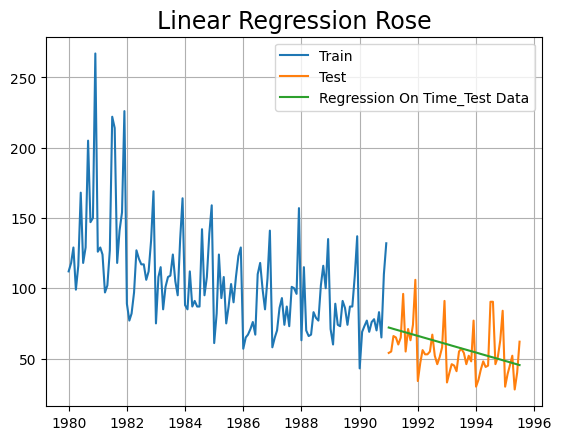

In [51]:
train_predictions_model1 = lr.predict(LinearRegression_train[['time']])
LinearRegression_train['RegOnTime'] = train_predictions_model1

test_predictions_model1 = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.title('Linear Regression Rose', fontsize=17)
plt.legend(loc='best')
plt.grid();
# plot showcasing the training and test data for 'Rose' wine. It includes the predictions made by a Linear Regression model based on the 'time' variable. The plot visually compares the actual data with the model's predictions on both the training and test sets

A linear regression model is trained on the 'time' variable, and predictions are made for both the training and testing datasets. The results are plotted alongside the original 'Rose' values for visualization.

## Defining the functions for calculating the accuracy metrics

In [52]:
from sklearn import metrics

### Model Evaluation on Rose

In [53]:
rmse_model11_test = metrics.mean_squared_error(test['Rose'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data, RMSE is %3.3f " %(rmse_model11_test))
# prints the Root Mean Squared Error (RMSE) for the Linear Regression model's predictions on the 'Rose' wine test data, providing a measure of the model's accuracy in forecasting.

For RegressionOnTime forecast on the Test Data, RMSE is 16.979 


Calculates and prints the root mean squared error (RMSE) for the test predictions made by a regression model on the 'Rose' values.

In [54]:
resultsDf = pd.DataFrame({'Test RMSE Rose': [rmse_model11_test]},index=['RegressionOnTime'])
resultsDf

Test RMSE Rose
RegressionOnTime       16.979414

### Model Evaluation on Sparkling

In [55]:
lr = LinearRegression()

In [56]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Sparkling'])
# Linear Regression model to the training data for the 'Sparkling' wine series. The independent variable is 'time', and the dependent variable is 'Sparkling'

LinearRegression()

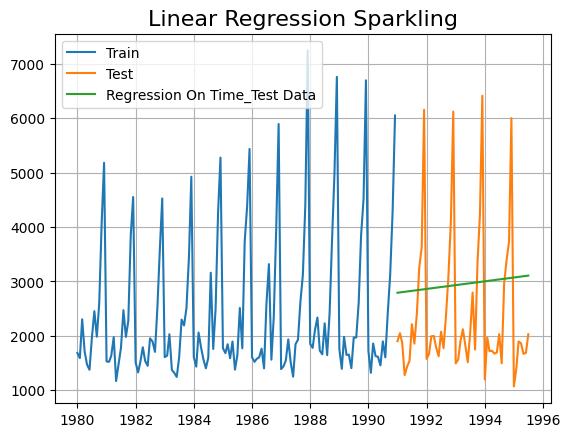

In [57]:
train_predictions_model1 = lr.predict(LinearRegression_train[['time']])
LinearRegression_train['RegOnTime'] = train_predictions_model1

test_predictions_model1 = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.legend(loc='best')
plt.title('Linear Regression Sparkling', fontsize=16)
plt.grid();

# plot illustrating the training and test data for the 'Sparkling' wine series. Additionally, it includes the predictions made by a Linear Regression model based on the 'time' variable. The plot visually compares the actual data with the model's predictions on both the training and test sets.

In [58]:
rmse_model12_test = metrics.mean_squared_error(test['Sparkling'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f " %(rmse_model12_test))
# prints the Root Mean Squared Error (RMSE) for the Linear Regression model's predictions on the 'Sparkling' wine test data, providing a measure of the model's accuracy in forecasting.

For RegressionOnTime forecast on the Test Data,  RMSE is 1389.135 


In [59]:
resultsDf_12 = pd.DataFrame({'Test RMSE Sparkling': [rmse_model12_test]},index=['RegressionOnTime'])

resultsDf = pd.merge(resultsDf, resultsDf_12, left_index=True, right_index=True)
resultsDf

Test RMSE Rose  Test RMSE Sparkling
RegressionOnTime       16.979414          1389.135175

# Model 2: Naive Approach

### Navie Algorithm for Rose

The Naive Approach model predicts future values based on the most recent observation, making it a simple and intuitive baseline method for time series forecasting. It assumes that the pattern observed in the latest data point will persist into the future.

In [60]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [61]:
train.tail()

Rose  Sparkling  Year      Month
YearMonth                                    
1990-08-01   70.0       1605  1990     August
1990-09-01   83.0       2424  1990  September
1990-10-01   65.0       3116  1990    October
1990-11-01  110.0       4286  1990   November
1990-12-01  132.0       6047  1990   December

In [62]:
NaiveModel_test['naive'] = np.asarray(train['Rose'])[len(np.asarray(train['Rose']))-1]
NaiveModel_test['naive'].head()
# Naive Forecasting model for the 'Rose' wine series on the test data. The model predicts each observation in the test set to be the last observed value in the training set. The resulting predictions are stored in the 'naive' column of the 'NaiveModel_test' dataframe.

YearMonth
1991-01-01    132.0
1991-02-01    132.0
1991-03-01    132.0
1991-04-01    132.0
1991-05-01    132.0
Name: naive, dtype: float64

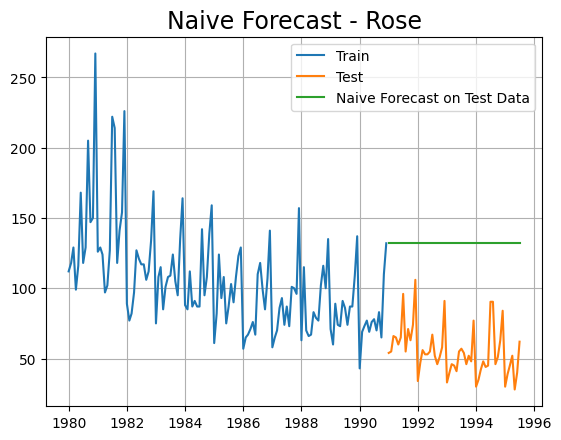

In [63]:
plt.plot(NaiveModel_train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.legend(loc='best')
plt.title("Naive Forecast - Rose", fontsize=17)
plt.grid();
# plot illustrating the training and test data for the 'Rose' wine series. Additionally, it includes the predictions made by a Naive Forecasting model on the test data. The plot visually compares the actual data with the Naive Forecast's predictions on both the training and test sets.

Model Evaluation

In [64]:
rmse_model21_test = metrics.mean_squared_error(test['Rose'],NaiveModel_test['naive'],squared=False)
print("For NaiveModel forecast on the Test Data,  RMSE is %3.3f" %(rmse_model21_test))
# prints the Root Mean Squared Error (RMSE) for the Naive Forecasting model's predictions on the 'Rose' wine test data, providing a measure of the model's accuracy in forecasting.

For NaiveModel forecast on the Test Data,  RMSE is 78.396


In [65]:
resultsDf

Test RMSE Rose  Test RMSE Sparkling
RegressionOnTime       16.979414          1389.135175

In [66]:
resultsDf_21 = pd.DataFrame({'Test RMSE Rose': [rmse_model21_test]},index=['NaiveModel'])
# creates a DataFrame named 'resultsDf_21' to store the Test RMSE value for the Naive Forecasting model on the 'Rose' wine series. The value is indexed under 'NaiveModel'.

### Naive Algorithm for Sparkling

In [67]:
train.tail()

Rose  Sparkling  Year      Month
YearMonth                                    
1990-08-01   70.0       1605  1990     August
1990-09-01   83.0       2424  1990  September
1990-10-01   65.0       3116  1990    October
1990-11-01  110.0       4286  1990   November
1990-12-01  132.0       6047  1990   December

In [68]:
NaiveModel_test['naive'] = np.asarray(train['Sparkling'])[len(np.asarray(train['Sparkling']))-1]
NaiveModel_test['naive'].head()
# Naive Forecasting model for the 'Sparkling' wine series on the test data. The model predicts each observation in the test set to be the last observed value in the training set. The resulting predictions are stored in the 'naive' column of the 'NaiveModel_test' dataframe

YearMonth
1991-01-01    6047
1991-02-01    6047
1991-03-01    6047
1991-04-01    6047
1991-05-01    6047
Name: naive, dtype: int64

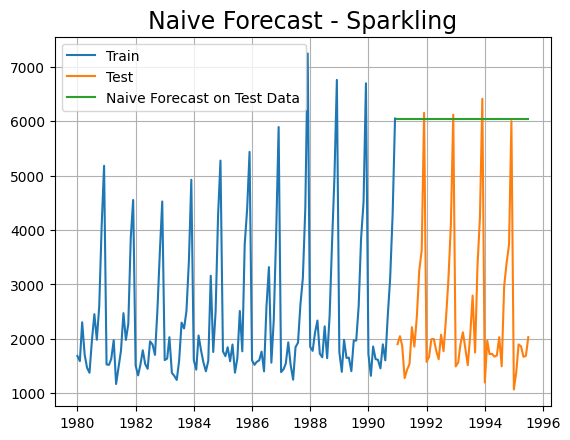

In [69]:
plt.plot(NaiveModel_train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.legend(loc='best')
plt.title("Naive Forecast - Sparkling", fontsize=17)
plt.grid();
# plot illustrating the training and test data for the 'Sparkling' wine series. Additionally, it includes the predictions made by a Naive Forecasting model on the test data. The plot visually compares the actual data with the Naive Forecast's predictions on both the training and test sets for 'Sparkling'.

Model Evaluation

In [70]:
rmse_model22_test = metrics.mean_squared_error(test['Sparkling'],NaiveModel_test['naive'],squared=False)
print("For NaiveModel forecast on the Test Data,  RMSE is %3.3f" %(rmse_model22_test))
# calculates and prints the Root Mean Squared Error (RMSE) for the Naive Forecasting model's predictions on the 'Sparkling' wine test data, providing a measure of the model's accuracy in forecasting

For NaiveModel forecast on the Test Data,  RMSE is 3864.279


In [71]:
resultsDf

Test RMSE Rose  Test RMSE Sparkling
RegressionOnTime       16.979414          1389.135175

In [72]:
resultsDf_21

Test RMSE Rose
NaiveModel       78.396083

In [73]:
resultsDf_22 = pd.DataFrame({'Test RMSE Sparkling': [rmse_model22_test]},index=['NaiveModel'])

resultsDf1 = resultsDf_21.join(resultsDf_22, how='outer')
resultsDf1

Test RMSE Rose  Test RMSE Sparkling
NaiveModel       78.396083          3864.279352

In [74]:
resultsDf3 = pd.concat([resultsDf, resultsDf1], axis=0)
resultsDf3

Test RMSE Rose  Test RMSE Sparkling
RegressionOnTime       16.979414          1389.135175
NaiveModel             78.396083          3864.279352

In [75]:
resultsDf = resultsDf3.copy()
resultsDf

Test RMSE Rose  Test RMSE Sparkling
RegressionOnTime       16.979414          1389.135175
NaiveModel             78.396083          3864.279352

# Model 3: Simple Average Algorithm

### Model for Rose
The Simple Average Algorithm calculates forecasts by taking the average of historical data, providing a straightforward baseline for time series prediction. It assumes that future values will align with the historical average, making it a simple yet often useful method for comparison in forecasting tasks.

In [76]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [77]:
SimpleAverage_test['mean_forecast'] = train['Rose'].mean()
SimpleAverage_test.head()

Rose  Sparkling  Year     Month  mean_forecast
YearMonth                                                 
1991-01-01  54.0       1902  1991   January     104.939394
1991-02-01  55.0       2049  1991  February     104.939394
1991-03-01  66.0       1874  1991     March     104.939394
1991-04-01  65.0       1279  1991     April     104.939394
1991-05-01  60.0       1432  1991       May     104.939394

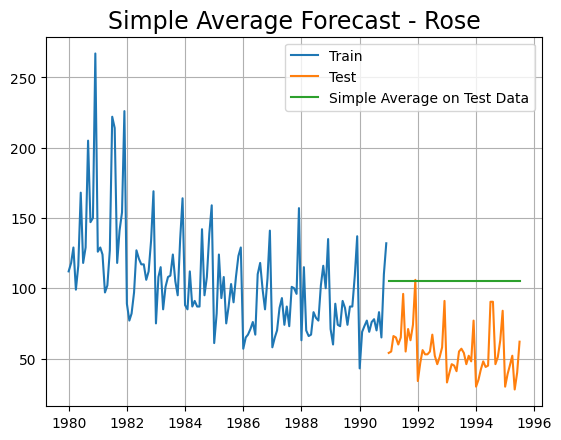

In [78]:
plt.plot(SimpleAverage_train['Rose'], label='Train')
plt.plot(SimpleAverage_test['Rose'], label='Test')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.legend(loc='best')
plt.title("Simple Average Forecast - Rose", fontsize=17)
plt.grid();
# generates a plot illustrating the training and test data for the 'Rose' wine series. Additionally, it includes the predictions made by a Simple Average Forecasting model on the test data. The plot visually compares the actual data with the Simple Average Forecast's predictions on both the training and test sets.

Model Evaluation

In [79]:
rmse_model31_test = metrics.mean_squared_error(test['Rose'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on Rose Test Data,  RMSE is %3.3f" %(rmse_model31_test))
# calculates and prints the Root Mean Squared Error (RMSE) for the Simple Average Forecasting model's predictions on the 'Rose' wine test data, providing a measure of the model's accuracy in forecasting.

For Simple Average forecast on Rose Test Data,  RMSE is 52.319


In [80]:
resultsDf_31 = pd.DataFrame({'Test RMSE Rose': [rmse_model31_test]}
                           ,index=['SimpleAverageModel'])
resultsDf_31

Test RMSE Rose
SimpleAverageModel       52.318735

### Model for Sparkling

In [81]:
SimpleAverage_test['mean_forecast'] = train['Sparkling'].mean()
SimpleAverage_test.head()
# assigns the mean of the 'Sparkling' wine training data to each observation in the 'mean_forecast' column of the 'SimpleAverage_test' dataframe. This approach is used for generating predictions with a Simple Average Forecasting model.

Rose  Sparkling  Year     Month  mean_forecast
YearMonth                                                 
1991-01-01  54.0       1902  1991   January    2403.780303
1991-02-01  55.0       2049  1991  February    2403.780303
1991-03-01  66.0       1874  1991     March    2403.780303
1991-04-01  65.0       1279  1991     April    2403.780303
1991-05-01  60.0       1432  1991       May    2403.780303

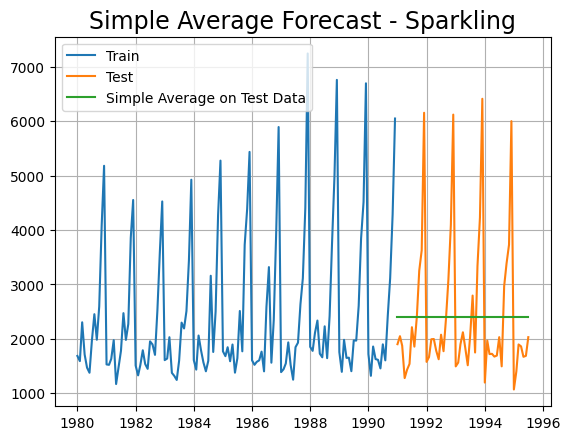

In [82]:
plt.plot(SimpleAverage_train['Sparkling'], label='Train')
plt.plot(SimpleAverage_test['Sparkling'], label='Test')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.legend(loc='best')
plt.title("Simple Average Forecast - Sparkling", fontsize=17)
plt.grid();

# generates a plot illustrating the training and test data for the 'Sparkling' wine series. Additionally, it includes the predictions made by a Simple Average Forecasting model on the test data. The plot visually compares the actual data with the Simple Average Forecast's predictions on both the training and test sets for 'Sparkling'.

Model Evaluation

In [83]:
rmse_model32_test = metrics.mean_squared_error(test['Sparkling'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on Sparkling Test Data,  RMSE is %3.3f" %(rmse_model32_test))
# calculates and prints the Root Mean Squared Error (RMSE) for the Simple Average Forecasting model's predictions on the 'Sparkling' wine test data, providing a measure of the model's accuracy in forecasting

For Simple Average forecast on Sparkling Test Data,  RMSE is 1275.082


In [84]:
resultsDf_32 = pd.DataFrame({'Test RMSE Sparkling': [rmse_model32_test]}
                           ,index=['SimpleAverageModel'])
resultsDf_32

Test RMSE Sparkling
SimpleAverageModel          1275.081804

In [85]:
resultsDf4 = resultsDf_31.join(resultsDf_32, how='outer')
resultsDf4

Test RMSE Rose  Test RMSE Sparkling
SimpleAverageModel       52.318735          1275.081804

In [86]:
resultsDf5 = pd.concat([resultsDf, resultsDf4], axis=0)
resultsDf5

Test RMSE Rose  Test RMSE Sparkling
RegressionOnTime         16.979414          1389.135175
NaiveModel               78.396083          3864.279352
SimpleAverageModel       52.318735          1275.081804

In [87]:
resultsDf = resultsDf5.copy()
resultsDf

Test RMSE Rose  Test RMSE Sparkling
RegressionOnTime         16.979414          1389.135175
NaiveModel               78.396083          3864.279352
SimpleAverageModel       52.318735          1275.081804

# Moving Average Model
The Moving Average Model is a time series forecasting method that predicts future points by calculating the average of a fixed-size window of past observations. It helps smooth out short-term fluctuations and highlights long-term trends in the data, making it a useful tool for understanding and predicting patterns in time series data.

### MA Model for Rose

In [88]:
MovingAverage = data.copy()
MovingAverage.head()

Rose  Sparkling  Year     Month
YearMonth                                   
1980-01-01  112.0       1686  1980   January
1980-02-01  118.0       1591  1980  February
1980-03-01  129.0       2304  1980     March
1980-04-01   99.0       1712  1980     April
1980-05-01  116.0       1471  1980       May

In [89]:
MovingAverage['Trailing_2'] = MovingAverage['Rose'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Rose'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Rose'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Rose'].rolling(9).mean()

MovingAverage.head()
# calculates and adds trailing moving averages to the 'MovingAverage' dataframe for the 'Rose' wine series. Four different trailing averages with window sizes of 2, 4, 6, and 9 are computed and stored in the columns 'Trailing_2', 'Trailing_4', 'Trailing_6', and 'Trailing_9', respectively

Rose  Sparkling  Year     Month  Trailing_2  Trailing_4   
YearMonth                                                              
1980-01-01  112.0       1686  1980   January         NaN         NaN  \
1980-02-01  118.0       1591  1980  February       115.0         NaN   
1980-03-01  129.0       2304  1980     March       123.5         NaN   
1980-04-01   99.0       1712  1980     April       114.0       114.5   
1980-05-01  116.0       1471  1980       May       107.5       115.5   

            Trailing_6  Trailing_9  
YearMonth                           
1980-01-01         NaN         NaN  
1980-02-01         NaN         NaN  
1980-03-01         NaN         NaN  
1980-04-01         NaN         NaN  
1980-05-01         NaN         NaN

Text(0.5, 1.0, 'Moving Average Forecast - Rose')

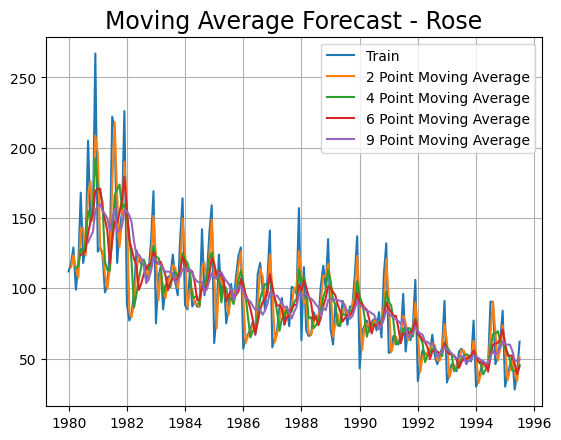

In [90]:
plt.plot(MovingAverage['Rose'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();
plt.title('Moving Average Forecast - Rose', fontsize=17)
# generates a plot illustrating the 'Rose' wine series from the training data. It includes different Moving Average forecasts with window sizes of 2, 4, 6, and 9. The plot visually compares the actual data with the Moving Average forecasts, showing how each forecast smoothens out the fluctuations in the time series.

In [91]:
trailing_MovingAverage_train=MovingAverage[MovingAverage.index<'1991'] 
trailing_MovingAverage_test=MovingAverage[MovingAverage.index>='1991']
# creates two separate dataframes, 'trailing_MovingAverage_train' and 'trailing_MovingAverage_test', by splitting the 'MovingAverage' dataframe based on the index year. The training data includes entries with an index year before 1991, while the test data includes entries from 1991 onwards.

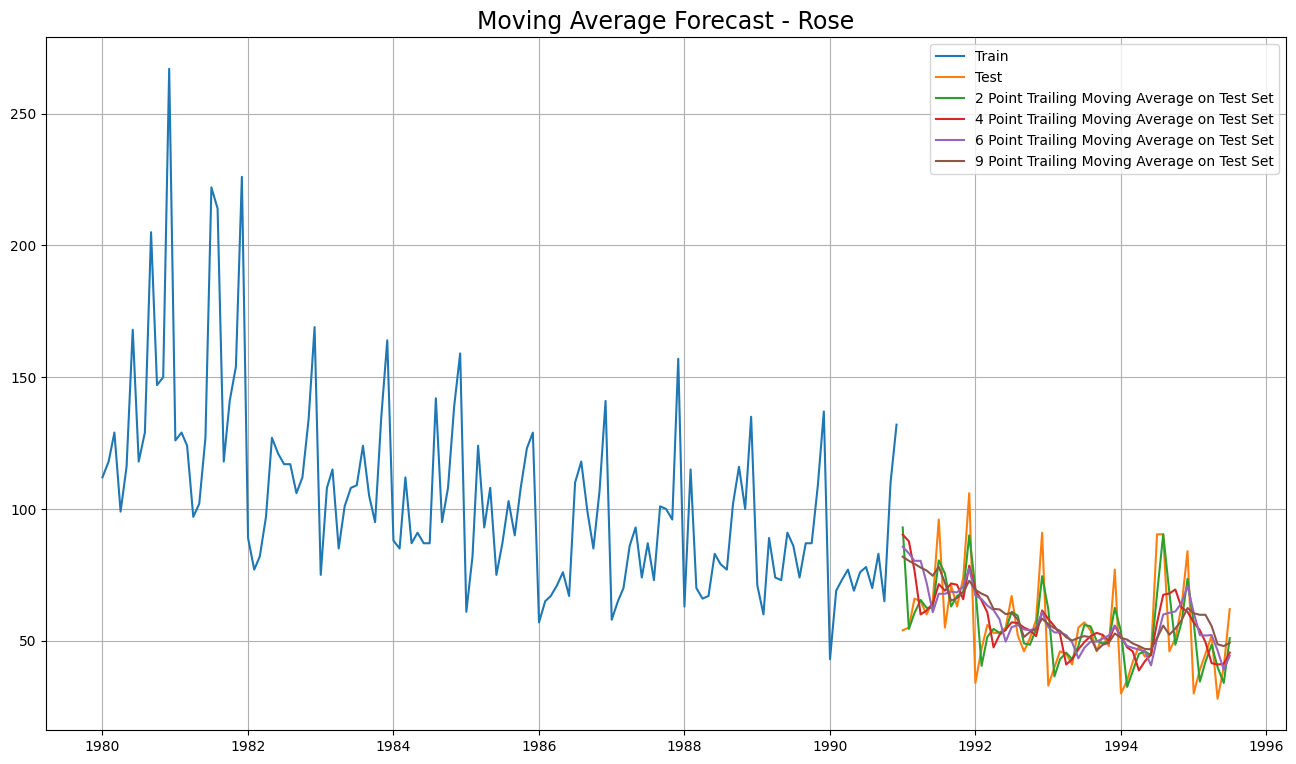

In [92]:
plt.figure(figsize=(16,9))
plt.plot(trailing_MovingAverage_train['Rose'], label='Train')
plt.plot(trailing_MovingAverage_test['Rose'], label='Test')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')

plt.legend(loc = 'best')
plt.grid();
plt.title('Moving Average Forecast - Rose', fontsize=17);
# generates a plot illustrating the training and test data for the 'Rose' wine series. It also includes various Trailing Moving Average forecasts with window sizes of 2, 4, 6, and 9 on the test data. The plot visually compares the actual data with the Trailing Moving Average forecasts, demonstrating how each forecast smoothens out the fluctuations in the time series.

Model Evaluation

In [93]:
rmse_model4_test_2 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on Rose Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))

rmse_model4_test_4 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on Rose Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))

rmse_model4_test_6 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on Rose Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

rmse_model4_test_9 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on Rose Training Data,  RMSE is %3.3f" %(rmse_model4_test_9))

# calculates and prints the Root Mean Squared Error (RMSE) for different Trailing Moving Average models (with window sizes of 2, 4, 6, and 9) on the 'Rose' wine test data. The RMSE values provide a measure of the accuracy of each model in forecasting.

For 2 point Moving Average Model forecast on Rose Training Data,  RMSE is 12.298
For 4 point Moving Average Model forecast on Rose Training Data,  RMSE is 15.846
For 6 point Moving Average Model forecast on Rose Training Data,  RMSE is 15.986
For 9 point Moving Average Model forecast on Rose Training Data,  RMSE is 16.501


In [94]:
resultsDf_41 = pd.DataFrame({'Test RMSE Rose': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf_41
# creates a dataframe, 'resultsDf_41', containing the Root Mean Squared Error (RMSE) values for different Trailing Moving Average models (with window sizes of 2, 4, 6, and 9) on the 'Rose' wine test data. The dataframe provides a summary of the model performance on the test set.

Test RMSE Rose
2pointTrailingMovingAverage       12.298291
4pointTrailingMovingAverage       15.845558
6pointTrailingMovingAverage       15.986163
9pointTrailingMovingAverage       16.500823

### MA Model for Sparkling

In [95]:
MovingAverage = data.copy()
MovingAverage.head()

Rose  Sparkling  Year     Month
YearMonth                                   
1980-01-01  112.0       1686  1980   January
1980-02-01  118.0       1591  1980  February
1980-03-01  129.0       2304  1980     March
1980-04-01   99.0       1712  1980     April
1980-05-01  116.0       1471  1980       May

In [96]:
MovingAverage['Trailing_2'] = MovingAverage['Sparkling'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Sparkling'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Sparkling'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Sparkling'].rolling(9).mean()

MovingAverage.head()
# calculates Trailing Moving Averages for the 'Sparkling' wine series with window sizes of 2, 4, 6, and 9, and stores the results in the 'MovingAverage' dataframe. The rolling mean is computed to smooth out fluctuations in the time series data.

Rose  Sparkling  Year     Month  Trailing_2  Trailing_4   
YearMonth                                                              
1980-01-01  112.0       1686  1980   January         NaN         NaN  \
1980-02-01  118.0       1591  1980  February      1638.5         NaN   
1980-03-01  129.0       2304  1980     March      1947.5         NaN   
1980-04-01   99.0       1712  1980     April      2008.0     1823.25   
1980-05-01  116.0       1471  1980       May      1591.5     1769.50   

            Trailing_6  Trailing_9  
YearMonth                           
1980-01-01         NaN         NaN  
1980-02-01         NaN         NaN  
1980-03-01         NaN         NaN  
1980-04-01         NaN         NaN  
1980-05-01         NaN         NaN

Text(0.5, 1.0, 'Moving Average - Sparkling')

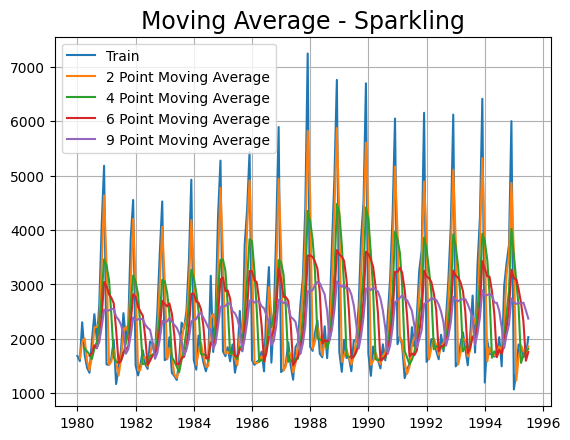

In [97]:
plt.plot(MovingAverage['Sparkling'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();
plt.title('Moving Average - Sparkling', fontsize=17)
# generates a plot comparing the original 'Sparkling' wine data with different Trailing Moving Average models (with window sizes of 2, 4, 6, and 9). The plot visually demonstrates how each moving average smooths out fluctuations in the time series data.

Text(0.5, 1.0, 'Moving Average Forecast - Sparkling')

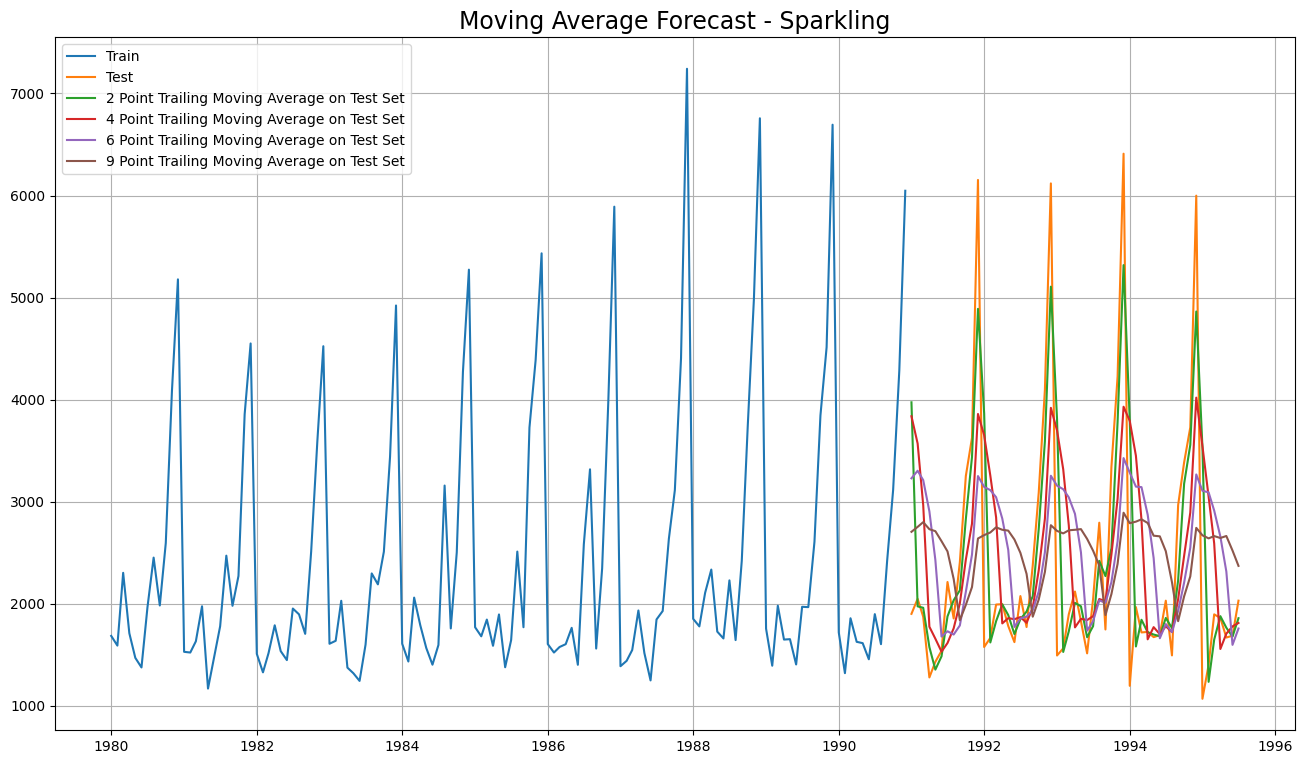

In [99]:
plt.figure(figsize=(16,9))
plt.plot(trailing_MovingAverage_train['Sparkling'], label='Train')
plt.plot(trailing_MovingAverage_test['Sparkling'], label='Test')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')

plt.legend(loc = 'best')
plt.grid();
plt.title('Moving Average Forecast - Sparkling', fontsize=17)
# generates a plot illustrating the training and test data for 'Sparkling' wine along with forecasts using different Trailing Moving Average models (with window sizes of 2, 4, 6, and 9). The plot visually depicts how these moving averages perform on the test set, highlighting their smoothing effects on the time series data.

Model Evaluation

In [100]:
rmse_model4_test_2 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on Sparkling Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))

rmse_model4_test_4 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on Sparkling Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))

rmse_model4_test_6 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on Sparkling Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

rmse_model4_test_9 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on Sparkling Training Data,  RMSE is %3.3f" %(rmse_model4_test_9))

For 2 point Moving Average Model forecast on Sparkling Training Data,  RMSE is 813.401
For 4 point Moving Average Model forecast on Sparkling Training Data,  RMSE is 1156.590
For 6 point Moving Average Model forecast on Sparkling Training Data,  RMSE is 1283.927
For 9 point Moving Average Model forecast on Sparkling Training Data,  RMSE is 1346.278


In [101]:
resultsDf_42 = pd.DataFrame({'Test RMSE Sparkling': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf_42

Test RMSE Sparkling
2pointTrailingMovingAverage           813.400684
4pointTrailingMovingAverage          1156.589694
6pointTrailingMovingAverage          1283.927428
9pointTrailingMovingAverage          1346.278315

In [102]:
resultsDf6 = resultsDf_41.join(resultsDf_42, how='outer')
resultsDf6

Test RMSE Rose  Test RMSE Sparkling
2pointTrailingMovingAverage       12.298291           813.400684
4pointTrailingMovingAverage       15.845558          1156.589694
6pointTrailingMovingAverage       15.986163          1283.927428
9pointTrailingMovingAverage       16.500823          1346.278315

In [103]:
resultsDf7 = pd.concat([resultsDf, resultsDf6], axis=0)
resultsDf7

Test RMSE Rose  Test RMSE Sparkling
RegressionOnTime                  16.979414          1389.135175
NaiveModel                        78.396083          3864.279352
SimpleAverageModel                52.318735          1275.081804
2pointTrailingMovingAverage       12.298291           813.400684
4pointTrailingMovingAverage       15.845558          1156.589694
6pointTrailingMovingAverage       15.986163          1283.927428
9pointTrailingMovingAverage       16.500823          1346.278315

In [104]:
resultsDf = resultsDf7.copy()
resultsDf

Test RMSE Rose  Test RMSE Sparkling
RegressionOnTime                  16.979414          1389.135175
NaiveModel                        78.396083          3864.279352
SimpleAverageModel                52.318735          1275.081804
2pointTrailingMovingAverage       12.298291           813.400684
4pointTrailingMovingAverage       15.845558          1156.589694
6pointTrailingMovingAverage       15.986163          1283.927428
9pointTrailingMovingAverage       16.500823          1346.278315

# Consolidated Plots for the All Rose Models

In [105]:
# LR on Rose
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()
LinearRegression_test['time'] = test_time
LinearRegression_train['time'] = train_time
lr = LinearRegression()
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Rose'])
test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

# NB on Rose
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()
NaiveModel_test['naive'] = np.asarray(train['Rose'])[len(np.asarray(train['Rose']))-1]

# SA on Rose
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()
SimpleAverage_test['mean_forecast'] = train['Rose'].mean()

# MA on Rose
MovingAverage = data.copy()
MovingAverage['Trailing_2'] = MovingAverage['Rose'].rolling(2).mean()
trailing_MovingAverage_test = MovingAverage[MovingAverage.index>='1991']

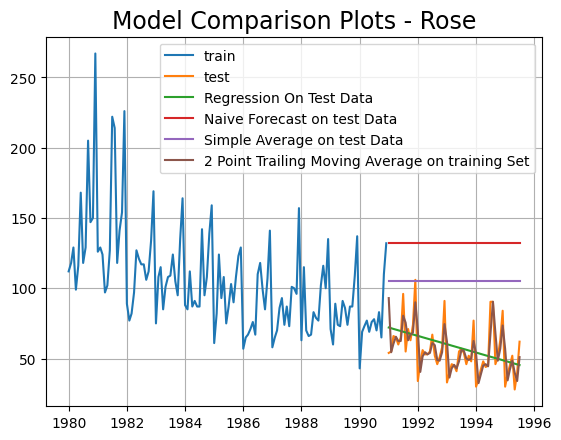

In [106]:
plt.plot(train['Rose'], label='train')
plt.plot(test['Rose'], label='test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Test Data')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on test Data')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on test Data')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on training Set')

plt.legend(loc='best')
plt.title("Model Comparison Plots - Rose", fontsize=17)
plt.grid();

# The plot compares various forecasting models for the 'Rose' data, including Linear Regression, Naive Model, Simple Average, and 2-point Trailing Moving Average, on both the training and test sets.

# Consolidated Plots for the All Sparkling Models

In [107]:
# LR on Sparkling
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()
LinearRegression_test['time'] = test_time
LinearRegression_train['time'] = train_time
lr = LinearRegression()
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Sparkling'])
test_predictions_model1 = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

# NB on Sparkling
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()
NaiveModel_test['naive'] = np.asarray(train['Sparkling'])[len(np.asarray(train['Sparkling']))-1]

# SA on Sparkling
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()
SimpleAverage_test['mean_forecast'] = train['Sparkling'].mean()

# MA on Sparkling
MovingAverage = data.copy()
MovingAverage['Trailing_2'] = MovingAverage['Sparkling'].rolling(2).mean()
trailing_MovingAverage_test = MovingAverage[MovingAverage.index>='1991']

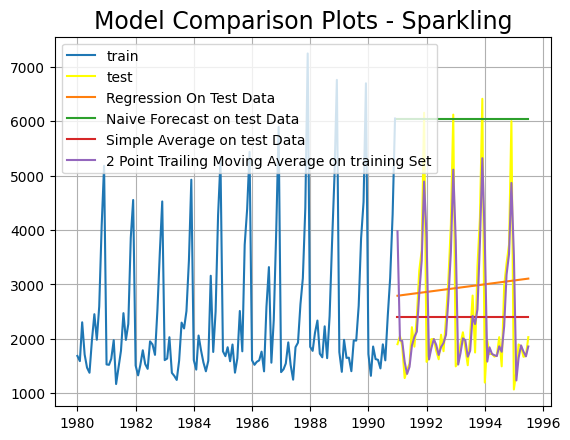

In [108]:
plt.plot(train['Sparkling'], label='train')
plt.plot(test['Sparkling'], label='test', c='yellow')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Test Data')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on test Data')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on test Data')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on training Set')

plt.legend(loc='best')
plt.title("Model Comparison Plots - Sparkling", fontsize=17)
plt.grid();
# The plot compares various forecasting models for the 'Sparkling' data, including Linear Regression, Naive Model, Simple Average, and 2-point Trailing Moving Average, on both the training and test sets.

# Simple, Double and Triple Exponential Smoothening


Simple Exponential Smoothing (SES), Double Exponential Smoothing (Holt's method), and Triple Exponential Smoothing (Holt-Winters method) are time series forecasting techniques:

1. **Simple Exponential Smoothing (SES):** SES uses a weighted average of past observations to forecast future points, assigning exponentially decreasing weights to older observations. It's suitable for data with a consistent level and no clear trend or seasonality.

2. **Double Exponential Smoothing (Holt's method):** Holt's method extends SES by incorporating a trend component in addition to the level. It is useful for data with a linear trend but no seasonality.

3. **Triple Exponential Smoothing (Holt-Winters method):** Holt-Winters method further extends Holt's method by including a seasonality component. It is effective for time series data with both a trend and seasonality, making it suitable for more complex patterns in the data.

These methods are part of the family of exponential smoothing techniques that aim to capture different aspects of time series behavior for improved forecasting accuracy.

In [109]:
import statsmodels.tools.eval_measures as em
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [110]:
train['Sparkling'] = pd.to_numeric(train['Sparkling'])
train['Rose'] = pd.to_numeric(train['Rose'])
# The 'Sparkling' and 'Rose' columns in the 'train' DataFrame have been converted to numeric data types.

C:\Users\RITU PRIYA SINGH\AppData\Local\Temp\ipykernel_17848\710749456.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Sparkling'] = pd.to_numeric(train['Sparkling'])
C:\Users\RITU PRIYA SINGH\AppData\Local\Temp\ipykernel_17848\710749456.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Rose'] = pd.to_numeric(train['Rose'])


In [111]:
model_SES = SimpleExpSmoothing(train['Rose'], initialization_method='estimated')
# The Simple Exponential Smoothing (SES) model has been initialized for the 'Rose' column in the training data using the estimated method.

C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [112]:
model_SES_autofit = model_SES.fit(optimized=True)
# The Simple Exponential Smoothing (SES) model has been auto-fitted to the training data with optimization enabled.

In [113]:
model_SES_autofit.params
# The optimized parameters for the Simple Exponential Smoothing (SES) model are not available in the provided text. If you have any specific questions or if there's anything else you would like to know, please let me know.

{'smoothing_level': 0.09874920899865502,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 134.3871074301239,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [114]:
SES_predict_rose = model_SES_autofit.forecast(steps=len(test))
SES_predict_rose
# The forecasted values for the Rose dataset using the Simple Exponential Smoothing (SES) model are not available in the provided text. If you have any specific questions or if there's anything else you would like to know, please let me know.

1991-01-01    87.10498
1991-02-01    87.10498
1991-03-01    87.10498
1991-04-01    87.10498
1991-05-01    87.10498
1991-06-01    87.10498
1991-07-01    87.10498
1991-08-01    87.10498
1991-09-01    87.10498
1991-10-01    87.10498
1991-11-01    87.10498
1991-12-01    87.10498
1992-01-01    87.10498
1992-02-01    87.10498
1992-03-01    87.10498
1992-04-01    87.10498
1992-05-01    87.10498
1992-06-01    87.10498
1992-07-01    87.10498
1992-08-01    87.10498
1992-09-01    87.10498
1992-10-01    87.10498
1992-11-01    87.10498
1992-12-01    87.10498
1993-01-01    87.10498
1993-02-01    87.10498
1993-03-01    87.10498
1993-04-01    87.10498
1993-05-01    87.10498
1993-06-01    87.10498
1993-07-01    87.10498
1993-08-01    87.10498
1993-09-01    87.10498
1993-10-01    87.10498
1993-11-01    87.10498
1993-12-01    87.10498
1994-01-01    87.10498
1994-02-01    87.10498
1994-03-01    87.10498
1994-04-01    87.10498
1994-05-01    87.10498
1994-06-01    87.10498
1994-07-01    87.10498
1994-08-01 

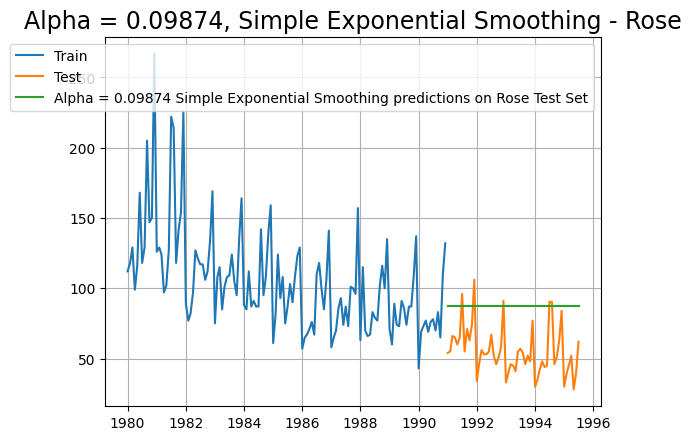

In [115]:
plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

plt.plot(SES_predict_rose, label='Alpha = 0.09874 Simple Exponential Smoothing predictions on Rose Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha = 0.09874, Simple Exponential Smoothing - Rose', fontsize=17)
# The provided code plots the training and test sets of the Rose dataset along with the predictions made by the Simple Exponential Smoothing (SES) model using an alpha value of 0.09874. The legend indicates the corresponding labels for each line.

In [116]:
def MAPE(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100
# function calculates the Mean Absolute Percentage Error (MAPE) between two arrays y_true and y_pred. This metric is commonly used to evaluate the accuracy of a forecasting method by measuring the percentage difference between the predicted and actual values.

In [117]:
print('SES RMSE:',mean_squared_error(test['Rose'].values, SES_predict_rose.values, squared=False))
# print('SES RMSE (calculated using statsmodels):',em.rmse(test['Rose'].values, SES_predict_rose.values)[0])

SES RMSE: 35.936195407593814


In [118]:
resultsDf_rses = pd.DataFrame({'Test RMSE Rose': [em.rmse(test['Rose'].values, SES_predict_rose.values)]}, index=['Simple Exponential Smoothing'])
resultsDf_rses

Test RMSE Rose
Simple Exponential Smoothing       35.936195

SES Model for Sparkling

In [119]:
model_SES = SimpleExpSmoothing(train['Sparkling'], initialization_method='estimated')
# Simple Exponential Smoothing (SES) model for the 'Sparkling' dataset using the SimpleExpSmoothing class, with the parameter initialization_method set to 'estimated'

C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [120]:
model_SES_autofit = model_SES.fit(optimized=True)

C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [121]:
model_SES_autofit.params

{'smoothing_level': 0.07028781460389563,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1763.9269926897732,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [122]:
SES_predict_spark = model_SES_autofit.forecast(steps=len(test))
SES_predict_spark
#  fitted Simple Exponential Smoothing (SES) model to forecast future values for the 'Sparkling' dataset. The forecast is generated for a number of steps equal to the length of the test set, and the results are stored in the variable SES_predict_spark.

1991-01-01    2804.662714
1991-02-01    2804.662714
1991-03-01    2804.662714
1991-04-01    2804.662714
1991-05-01    2804.662714
1991-06-01    2804.662714
1991-07-01    2804.662714
1991-08-01    2804.662714
1991-09-01    2804.662714
1991-10-01    2804.662714
1991-11-01    2804.662714
1991-12-01    2804.662714
1992-01-01    2804.662714
1992-02-01    2804.662714
1992-03-01    2804.662714
1992-04-01    2804.662714
1992-05-01    2804.662714
1992-06-01    2804.662714
1992-07-01    2804.662714
1992-08-01    2804.662714
1992-09-01    2804.662714
1992-10-01    2804.662714
1992-11-01    2804.662714
1992-12-01    2804.662714
1993-01-01    2804.662714
1993-02-01    2804.662714
1993-03-01    2804.662714
1993-04-01    2804.662714
1993-05-01    2804.662714
1993-06-01    2804.662714
1993-07-01    2804.662714
1993-08-01    2804.662714
1993-09-01    2804.662714
1993-10-01    2804.662714
1993-11-01    2804.662714
1993-12-01    2804.662714
1994-01-01    2804.662714
1994-02-01    2804.662714
1994-03-01  

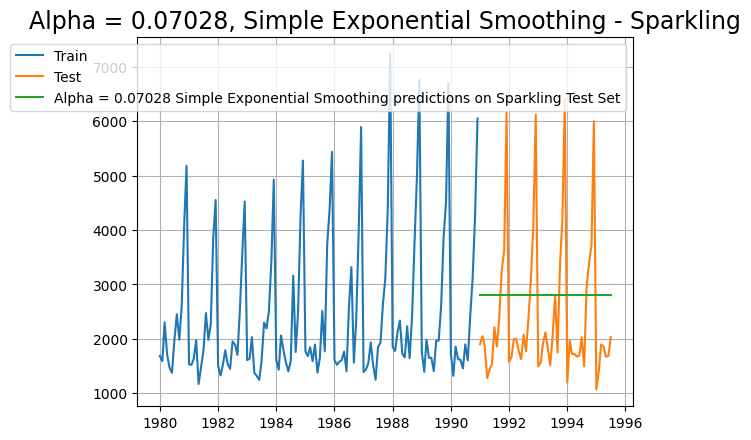

In [123]:
plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(SES_predict_spark, label='Alpha = 0.07028 Simple Exponential Smoothing predictions on Sparkling Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha = 0.07028, Simple Exponential Smoothing - Sparkling', fontsize=17)
# creates a plot comparing the actual training and test data for the 'Sparkling' dataset with the forecast generated by the Simple Exponential Smoothing (SES) model. The forecast is based on an alpha value of 0.07028. The plot includes legends and a title for clarity

In [124]:
## Mean Absolute Percentage Error (MAPE) - Function Definition

def MAPE(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

In [125]:
print('SES RMSE:',mean_squared_error(test['Sparkling'].values, SES_predict_spark.values, squared=False))
# print('SES RMSE (calculated using statsmodels):',em.rmse(test['Rose'].values, SES_predict_rose.values)[0])

SES RMSE: 1338.0046232563645


In [126]:
resultsDf_sses = pd.DataFrame({'Test RMSE Sparkling': [em.rmse(test['Sparkling'].values, SES_predict_spark.values)]}, index=['Simple Exponential Smoothing'])
resultsDf_sses

Test RMSE Sparkling
Simple Exponential Smoothing          1338.004623

In [127]:
resultsDf7 = resultsDf_rses.join(resultsDf_sses, how='outer')
resultsDf7

Test RMSE Rose  Test RMSE Sparkling
Simple Exponential Smoothing       35.936195          1338.004623

In [128]:
resultsDf8 = pd.concat([resultsDf, resultsDf7], axis=0)
resultsDf8

Test RMSE Rose  Test RMSE Sparkling
RegressionOnTime                   16.979414          1389.135175
NaiveModel                         78.396083          3864.279352
SimpleAverageModel                 52.318735          1275.081804
2pointTrailingMovingAverage        12.298291           813.400684
4pointTrailingMovingAverage        15.845558          1156.589694
6pointTrailingMovingAverage        15.986163          1283.927428
9pointTrailingMovingAverage        16.500823          1346.278315
Simple Exponential Smoothing       35.936195          1338.004623

In [129]:
resultsDf = resultsDf8.copy()

## Double Exponential Smoothening
Double Exponential Smoothing (Holt's method): Holt's method extends SES by incorporating a trend component in addition to the level. It is useful for data with a linear trend but no seasonality.

Holt-ETS on Rose

In [130]:
# Initializing the Double Exponential Smoothing Model
model_DES = Holt(train['Rose'], initialization_method='estimated')
# Fitting the model
model_DES = model_DES.fit()

print('')
print('Holt model Exponential Smoothing Estimated Parameters :')
print('')
print(model_DES.params)


Holt model Exponential Smoothing Estimated Parameters :

{'smoothing_level': 1.4901161193847656e-08, 'smoothing_trend': 5.448169774560283e-09, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 137.81762949544608, 'initial_trend': -0.4943507283995123, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [131]:
# Forecasting using this model for the duration of the test set
DES_predict_rose =  model_DES.forecast(len(test))
DES_predict_rose

1991-01-01    72.068983
1991-02-01    71.574632
1991-03-01    71.080281
1991-04-01    70.585930
1991-05-01    70.091580
1991-06-01    69.597229
1991-07-01    69.102878
1991-08-01    68.608528
1991-09-01    68.114177
1991-10-01    67.619826
1991-11-01    67.125475
1991-12-01    66.631125
1992-01-01    66.136774
1992-02-01    65.642423
1992-03-01    65.148072
1992-04-01    64.653722
1992-05-01    64.159371
1992-06-01    63.665020
1992-07-01    63.170669
1992-08-01    62.676319
1992-09-01    62.181968
1992-10-01    61.687617
1992-11-01    61.193267
1992-12-01    60.698916
1993-01-01    60.204565
1993-02-01    59.710214
1993-03-01    59.215864
1993-04-01    58.721513
1993-05-01    58.227162
1993-06-01    57.732811
1993-07-01    57.238461
1993-08-01    56.744110
1993-09-01    56.249759
1993-10-01    55.755409
1993-11-01    55.261058
1993-12-01    54.766707
1994-01-01    54.272356
1994-02-01    53.778006
1994-03-01    53.283655
1994-04-01    52.789304
1994-05-01    52.294953
1994-06-01    51

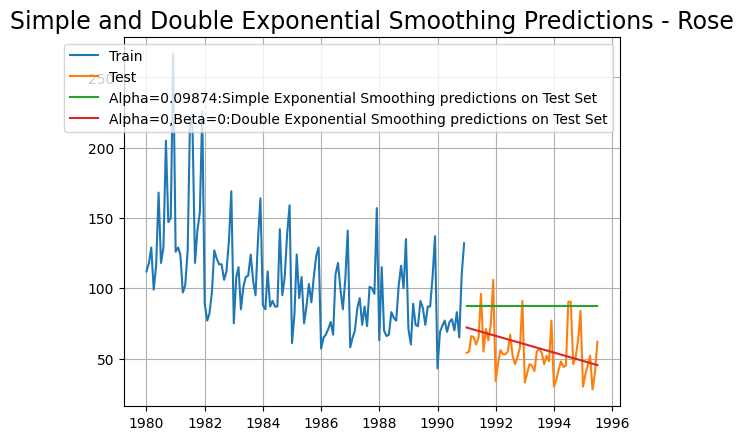

In [132]:
plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

plt.plot(SES_predict_rose, label='Alpha=0.09874:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict_rose, label='Alpha=0,Beta=0:Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple and Double Exponential Smoothing Predictions - Rose')
# generates a plot comparing the actual training and test data for the 'Rose' dataset with the forecasts generated by both Simple Exponential Smoothing (SES) and Double Exponential Smoothing (DES) models. The SES forecast is based on an alpha value of 0.09874, and the DES forecast has alpha and beta values set to 0. Legends and a title are included for clarity.

In [133]:
print('DES RMSE:',mean_squared_error(test['Rose'].values,DES_predict_rose.values,squared=False))
# calculates and prints the Root Mean Squared Error (RMSE) between the actual values of the 'Rose' dataset in the test set and the predicted values obtained from the Double Exponential Smoothing (DES) model. The RMSE is a measure of the model's accuracy in predicting the test set.

DES RMSE: 16.98056384535869


In [134]:
resultsDf_temp = pd.DataFrame({'Test RMSE Rose': [mean_squared_error(test['Rose'].values,DES_predict_rose.values,squared=False)]}
                           ,index=['Double Exponential Smoothing'])
resultsDf_temp

Test RMSE Rose
Double Exponential Smoothing       16.980564

Holt-ETS on Sparkling

In [135]:
# Initializing the Double Exponential Smoothing Model
model_DES = Holt(train['Sparkling'],initialization_method='estimated')
# Fitting the model
model_DES = model_DES.fit()

print('Holt model Exponential Smoothing Estimated Parameters :')
print(model_DES.params)


Holt model Exponential Smoothing Estimated Parameters :

{'smoothing_level': 0.6649999999999999, 'smoothing_trend': 0.0001, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1502.1999999999998, 'initial_trend': 74.87272727272733, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [136]:
DES_predict_spark =  model_DES.forecast(len(test))
DES_predict_spark

1991-01-01    5401.733026
1991-02-01    5476.005230
1991-03-01    5550.277433
1991-04-01    5624.549637
1991-05-01    5698.821840
1991-06-01    5773.094044
1991-07-01    5847.366248
1991-08-01    5921.638451
1991-09-01    5995.910655
1991-10-01    6070.182858
1991-11-01    6144.455062
1991-12-01    6218.727266
1992-01-01    6292.999469
1992-02-01    6367.271673
1992-03-01    6441.543876
1992-04-01    6515.816080
1992-05-01    6590.088284
1992-06-01    6664.360487
1992-07-01    6738.632691
1992-08-01    6812.904894
1992-09-01    6887.177098
1992-10-01    6961.449302
1992-11-01    7035.721505
1992-12-01    7109.993709
1993-01-01    7184.265912
1993-02-01    7258.538116
1993-03-01    7332.810320
1993-04-01    7407.082523
1993-05-01    7481.354727
1993-06-01    7555.626930
1993-07-01    7629.899134
1993-08-01    7704.171338
1993-09-01    7778.443541
1993-10-01    7852.715745
1993-11-01    7926.987948
1993-12-01    8001.260152
1994-01-01    8075.532356
1994-02-01    8149.804559
1994-03-01  

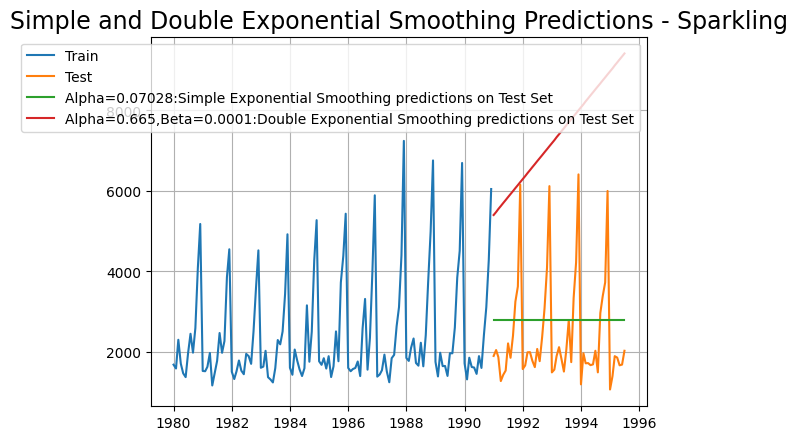

In [137]:
plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(SES_predict_spark, label='Alpha=0.07028:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict_spark, label='Alpha=0.665,Beta=0.0001:Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple and Double Exponential Smoothing Predictions - Sparkling')
# generates a plot depicting the training and test sets for the 'Sparkling' dataset. It overlays the predicted values obtained from both the Simple Exponential Smoothing (SES) model with an alpha value of 0.07028 and the Double Exponential Smoothing (DES) model with alpha=0.665 and beta=0.0001 on the test set. The plot aims to visually compare the performance of the two smoothing techniques in predicting the 'Sparkling' dataset.

In [138]:
print('DES RMSE:',mean_squared_error(test['Sparkling'].values,DES_predict_spark.values,squared=False))

DES RMSE: 5291.879833226911


In [139]:
resultsDf_temp1 = pd.DataFrame({'Test RMSE Sparkling': [mean_squared_error(test['Sparkling'].values,DES_predict_spark.values,squared=False)]}
                           ,index=['Double Exponential Smoothing'])

resultsDf_temp1

Test RMSE Sparkling
Double Exponential Smoothing          5291.879833

In [140]:
resultsDf9 = resultsDf_temp.join(resultsDf_temp1, how='outer')
resultsDf9

Test RMSE Rose  Test RMSE Sparkling
Double Exponential Smoothing       16.980564          5291.879833

In [141]:
resultsDf10 = pd.concat([resultsDf, resultsDf9], axis=0)
resultsDf10

Test RMSE Rose  Test RMSE Sparkling
RegressionOnTime                   16.979414          1389.135175
NaiveModel                         78.396083          3864.279352
SimpleAverageModel                 52.318735          1275.081804
2pointTrailingMovingAverage        12.298291           813.400684
4pointTrailingMovingAverage        15.845558          1156.589694
6pointTrailingMovingAverage        15.986163          1283.927428
9pointTrailingMovingAverage        16.500823          1346.278315
Simple Exponential Smoothing       35.936195          1338.004623
Double Exponential Smoothing       16.980564          5291.879833

In [142]:
resultsDf = resultsDf10.copy()
resultsDf

Test RMSE Rose  Test RMSE Sparkling
RegressionOnTime                   16.979414          1389.135175
NaiveModel                         78.396083          3864.279352
SimpleAverageModel                 52.318735          1275.081804
2pointTrailingMovingAverage        12.298291           813.400684
4pointTrailingMovingAverage        15.845558          1156.589694
6pointTrailingMovingAverage        15.986163          1283.927428
9pointTrailingMovingAverage        16.500823          1346.278315
Simple Exponential Smoothing       35.936195          1338.004623
Double Exponential Smoothing       16.980564          5291.879833

# Holt-Winters - ETS(A, A, A)- Holt Winter's Linear Method with Additive Errors

Model for Rose

In [143]:
# Initializing the Double Exponential Smoothing Model
model_TES = ExponentialSmoothing(train['Rose'], trend='additive',seasonal='additive',initialization_method='estimated')
# Fitting the model
model_TES = model_TES.fit()

print('')
print('== Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES.params)


== Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.08491574907842013, 'smoothing_trend': 5.5205494088745035e-06, 'smoothing_seasonal': 0.0005477182208247348, 'damping_trend': nan, 'initial_level': 147.05898703809248, 'initial_trend': -0.5496981430927392, 'initial_seasons': array([-31.16021285, -18.81317648, -10.81406896, -21.41413199,
       -12.6036696 ,  -7.23553106,   2.76744902,   8.85548059,
         4.83969803,   2.95125217,  21.07934859,  63.31472515]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [144]:
# Forecasting using this model for the duration of the test set
TES_predict_add_rose =  model_TES.forecast(len(test))
TES_predict_add_rose

1991-01-01     42.574560
1991-02-01     54.372099
1991-03-01     61.821511
1991-04-01     50.671639
1991-05-01     58.932400
1991-06-01     63.751320
1991-07-01     73.204015
1991-08-01     78.742349
1991-09-01     74.177124
1991-10-01     71.738917
1991-11-01     89.317129
1991-12-01    131.006255
1992-01-01     35.978169
1992-02-01     47.775707
1992-03-01     55.225119
1992-04-01     44.075248
1992-05-01     52.336008
1992-06-01     57.154928
1992-07-01     66.607623
1992-08-01     72.145958
1992-09-01     67.580733
1992-10-01     65.142526
1992-11-01     82.720737
1992-12-01    124.409864
1993-01-01     29.381777
1993-02-01     41.179316
1993-03-01     48.628728
1993-04-01     37.478856
1993-05-01     45.739616
1993-06-01     50.558536
1993-07-01     60.011232
1993-08-01     65.549566
1993-09-01     60.984341
1993-10-01     58.546134
1993-11-01     76.124346
1993-12-01    117.813472
1994-01-01     22.785386
1994-02-01     34.582924
1994-03-01     42.032336
1994-04-01     30.882464


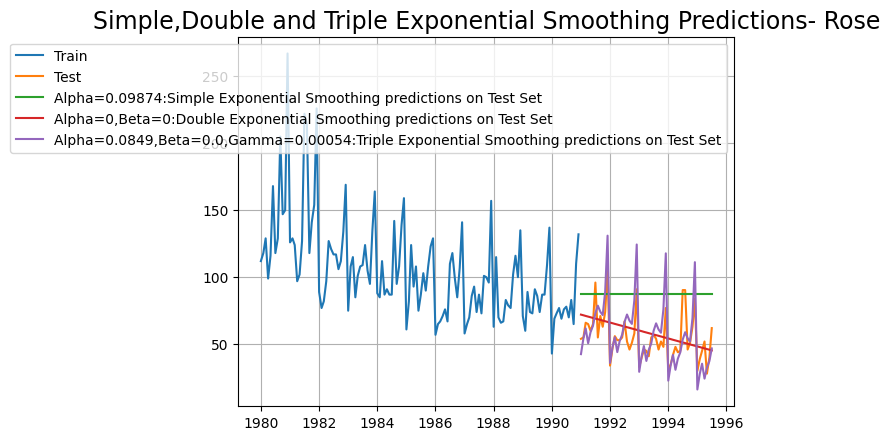

In [145]:
plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

plt.plot(SES_predict_rose, label='Alpha=0.09874:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict_rose, label='Alpha=0,Beta=0:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_add_rose, label='Alpha=0.0849,Beta=0.0,Gamma=0.00054:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions- Rose')
# generates a plot illustrating the training and test sets for the 'Rose' dataset. It overlays the predicted values obtained from three different exponential smoothing models: Simple Exponential Smoothing (SES) with an alpha value of 0.09874, Double Exponential Smoothing (DES) with alpha=0 and beta=0, and Triple Exponential Smoothing (TES) with alpha=0.0849, beta=0.0, and gamma=0.00054 on the test set. The plot provides a visual comparison of the performance of these smoothing techniques in predicting the 'Rose' dataset.

In [146]:
print('TES RMSE:',mean_squared_error(test['Rose'].values,TES_predict_add_rose.values,squared=False))
#  calculates the Root Mean Squared Error (RMSE) between the actual values of the 'Rose' dataset in the test set and the predicted values obtained from the Triple Exponential Smoothing (TES) model with alpha=0.0849, beta=0.0, and gamma=0.00054. The RMSE is a measure of the differences between the predicted and observed values, providing an indication of the model's accuracy.

TES RMSE: 15.534165302124192


In [147]:
resultsDf_temp = pd.DataFrame({'Test RMSE Rose': [mean_squared_error(test['Rose'].values, TES_predict_add_rose.values,squared=False)]}
                           ,index=['Triple Exponential Smoothing (Additive Season)'])

import textwrap
textwrap.TextWrapper(resultsDf_temp.index)

resultsDf_temp

Test RMSE Rose
Triple Exponential Smoothing (Additive Season)       15.534165

Model for Sparkling

In [148]:
# Initializing the Double Exponential Smoothing Model
model_TES = ExponentialSmoothing(train['Sparkling'], trend='additive',seasonal='additive',initialization_method='estimated')
# Fitting the model
model_TES = model_TES.fit()

print('')
print('== Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES.params)


== Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.11127217859992398, 'smoothing_trend': 0.01236078328796452, 'smoothing_seasonal': 0.4607177642170641, 'damping_trend': nan, 'initial_level': 2356.578308185137, 'initial_trend': -0.01853556812789492, 'initial_seasons': array([-636.23360535, -722.98363367, -398.6436108 , -473.43084469,
       -808.42525514, -815.35024951, -384.23066987,   72.99508063,
       -237.44272911,  272.32584554, 1541.3782103 , 2590.0775386 ]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [149]:
# Forecasting using this model for the duration of the test set
TES_predict_add_spark =  model_TES.forecast(len(test))
TES_predict_add_spark

1991-01-01    1490.574426
1991-02-01    1204.714325
1991-03-01    1688.941106
1991-04-01    1551.450810
1991-05-01    1461.440427
1991-06-01    1278.907163
1991-07-01    1805.164022
1991-08-01    1679.251392
1991-09-01    2315.687649
1991-10-01    3225.308906
1991-11-01    4299.652360
1991-12-01    6411.161332
1992-01-01    1483.296578
1992-02-01    1197.436477
1992-03-01    1681.663258
1992-04-01    1544.172962
1992-05-01    1454.162580
1992-06-01    1271.629315
1992-07-01    1797.886174
1992-08-01    1671.973544
1992-09-01    2308.409801
1992-10-01    3218.031058
1992-11-01    4292.374513
1992-12-01    6403.883484
1993-01-01    1476.018731
1993-02-01    1190.158629
1993-03-01    1674.385411
1993-04-01    1536.895114
1993-05-01    1446.884732
1993-06-01    1264.351467
1993-07-01    1790.608327
1993-08-01    1664.695696
1993-09-01    2301.131954
1993-10-01    3210.753211
1993-11-01    4285.096665
1993-12-01    6396.605637
1994-01-01    1468.740883
1994-02-01    1182.880782
1994-03-01  

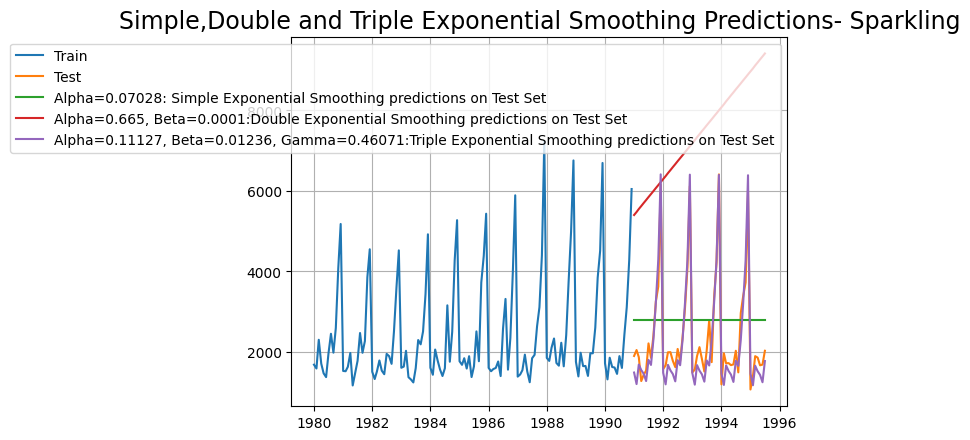

In [150]:
plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(SES_predict_spark, label='Alpha=0.07028: Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict_spark, label='Alpha=0.665, Beta=0.0001:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_add_spark, label='Alpha=0.11127, Beta=0.01236, Gamma=0.46071:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions- Sparkling');

In [151]:
print('TES RMSE:',mean_squared_error(test['Sparkling'].values, TES_predict_add_spark.values, squared=False))

TES RMSE: 378.6262408893861


In [152]:
resultsDf_temp1 = pd.DataFrame({'Test RMSE Sparkling': [mean_squared_error(test['Sparkling'].values,TES_predict_add_spark.values,squared=False)]}
                           ,index=['Triple Exponential Smoothing (Additive Season)'])

import textwrap
textwrap.TextWrapper(resultsDf_temp.index)

resultsDf_temp1

Test RMSE Sparkling
Triple Exponential Smoothing (Additive Season)           378.626241

In [153]:
resultsDf11 = resultsDf_temp.join(resultsDf_temp1, how='outer')
resultsDf11

Test RMSE Rose   
Triple Exponential Smoothing (Additive Season)       15.534165  \

                                                Test RMSE Sparkling  
Triple Exponential Smoothing (Additive Season)           378.626241

In [154]:
resultsDf12 = pd.concat([resultsDf, resultsDf11], axis=0)
resultsDf12

Test RMSE Rose   
RegressionOnTime                                     16.979414  \
NaiveModel                                           78.396083   
SimpleAverageModel                                   52.318735   
2pointTrailingMovingAverage                          12.298291   
4pointTrailingMovingAverage                          15.845558   
6pointTrailingMovingAverage                          15.986163   
9pointTrailingMovingAverage                          16.500823   
Simple Exponential Smoothing                         35.936195   
Double Exponential Smoothing                         16.980564   
Triple Exponential Smoothing (Additive Season)       15.534165   

                                                Test RMSE Sparkling  
RegressionOnTime                                        1389.135175  
NaiveModel                                              3864.279352  
SimpleAverageModel                                      1275.081804  
2pointTrailingMovingAverage                              813.400684  
4pointTrailingMovingAverage                             1156.589694  
6pointTrailingMovingAverage                             1283.927428  
9pointTrailingMovingAverage                             1346.278315  
Simple Exponential Smoothing                            1338.004623  
Double Exponential Smoothing                            5291.879833  
Triple Exponential Smoothing (Additive Season)           378.626241

In [155]:
resultsDf = resultsDf12.copy()

# Holt-Winters - ETS(A, A, M) - Holt Winter's linear method

ETS(A, A, M) model - Taking MULTIPLICATIVE SEASONALITY - ROSE

In [156]:
# Initializing the Double Exponential Smoothing Model
model_TES_am = ExponentialSmoothing(train['Rose'],trend='add',seasonal='multiplicative',initialization_method='estimated')
# Fitting the model
model_TES_am = model_TES_am.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES_am.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.07736040004765096, 'smoothing_trend': 0.03936496779735522, 'smoothing_seasonal': 0.0008375039104357999, 'damping_trend': nan, 'initial_level': 156.90674503596637, 'initial_trend': -0.9061396720042346, 'initial_seasons': array([0.7142168 , 0.80982439, 0.88543128, 0.77363782, 0.87046319,
       0.94699283, 1.04196135, 1.11012703, 1.04835489, 1.0276963 ,
       1.19783562, 1.6514144 ]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [157]:
# Forecasting using this model for the duration of the test set
TES_predict_am_rose =  model_TES_am.forecast(len(test))
TES_predict_am_rose

1991-01-01     55.942246
1991-02-01     63.240624
1991-03-01     68.899674
1991-04-01     60.007486
1991-05-01     67.257150
1991-06-01     72.880875
1991-07-01     79.913317
1991-08-01     84.831135
1991-09-01     79.856761
1991-10-01     78.009465
1991-11-01     90.608817
1991-12-01    124.421985
1992-01-01     53.620022
1992-02-01     60.606323
1992-03-01     66.019647
1992-04-01     57.490388
1992-05-01     64.426058
1992-06-01     69.802261
1992-07-01     76.525716
1992-08-01     81.222314
1992-09-01     76.447471
1992-10-01     74.667150
1992-11-01     86.712771
1992-12-01    119.052784
1993-01-01     51.297798
1993-02-01     57.972023
1993-03-01     63.139621
1993-04-01     54.973289
1993-05-01     61.594966
1993-06-01     66.723648
1993-07-01     73.138115
1993-08-01     77.613494
1993-09-01     73.038180
1993-10-01     71.324834
1993-11-01     82.816725
1993-12-01    113.683583
1994-01-01     48.975574
1994-02-01     55.337723
1994-03-01     60.259594
1994-04-01     52.456191


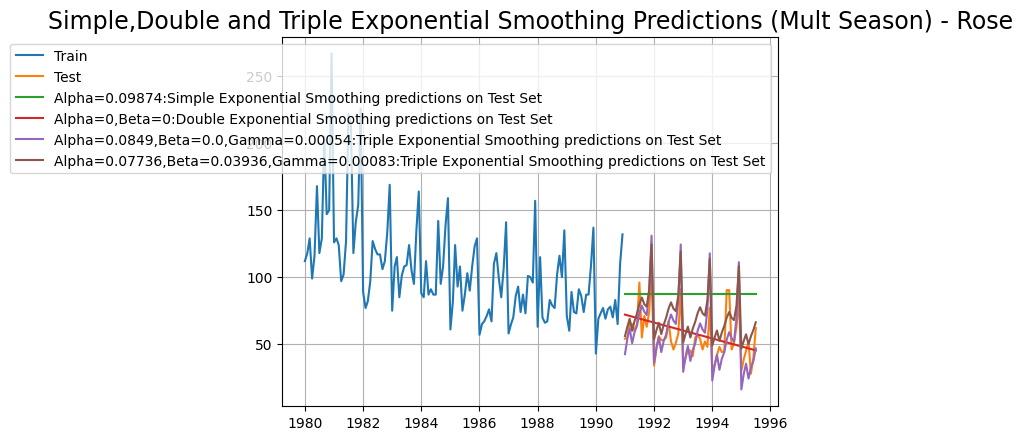

In [158]:
plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

plt.plot(SES_predict_rose, label='Alpha=0.09874:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict_rose, label='Alpha=0,Beta=0:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_add_rose, label='Alpha=0.0849,Beta=0.0,Gamma=0.00054:Triple Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_am_rose, label='Alpha=0.07736,Beta=0.03936,Gamma=0.00083:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions (Mult Season) - Rose', fontsize=17);

Report Model Accuracy

In [159]:
print('TES_am RMSE_rose:',mean_squared_error(test['Rose'].values,TES_predict_am_rose.values,squared=False))

TES_am RMSE_rose: 18.775065779794158


In [160]:
resultsDf_temp = pd.DataFrame({'Test RMSE Rose': [mean_squared_error(test['Rose'].values,TES_predict_am_rose.values,squared=False)]}
                           ,index=['Triple Exponential Smoothing (Multiplicative Season)'])

resultsDf_temp

Test RMSE Rose
Triple Exponential Smoothing (Multiplicative Se...       18.775066

ETS(A, A, M) model - Taking MULTIPLICATIVE SEASONALITY - Sparkling

In [161]:
# Initializing the Double Exponential Smoothing Model
model_TES_am = ExponentialSmoothing(train['Sparkling'],trend='add',seasonal='multiplicative',initialization_method='estimated')
# Fitting the model
model_TES_am = model_TES_am.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES_am.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.11119949831569428, 'smoothing_trend': 0.049430920023313805, 'smoothing_seasonal': 0.3620525701498937, 'damping_trend': nan, 'initial_level': 2356.5264391986907, 'initial_trend': -9.443690175376352, 'initial_seasons': array([0.71325627, 0.68332509, 0.90537798, 0.80561841, 0.65639659,
       0.65451508, 0.88690241, 1.13423953, 0.91927727, 1.21396745,
       1.86941738, 2.3734461 ]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [162]:
# Forecasting using this model for the duration of the test set
TES_predict_am_spark =  model_TES_am.forecast(len(test))
TES_predict_am_spark

1991-01-01    1587.685845
1991-02-01    1356.590237
1991-03-01    1763.121866
1991-04-01    1656.379813
1991-05-01    1542.186697
1991-06-01    1355.276292
1991-07-01    1854.460265
1991-08-01    1820.822870
1991-09-01    2277.203230
1991-10-01    3122.460625
1991-11-01    4129.148636
1991-12-01    5891.184787
1992-01-01    1538.578232
1992-02-01    1314.522051
1992-03-01    1708.305381
1992-04-01    1604.748228
1992-05-01    1493.989468
1992-06-01    1312.809887
1992-07-01    1796.200235
1992-08-01    1763.469447
1992-09-01    2205.285676
1992-10-01    3023.588340
1992-11-01    3998.053790
1992-12-01    5703.651532
1993-01-01    1489.470618
1993-02-01    1272.453864
1993-03-01    1653.488895
1993-04-01    1553.116644
1993-05-01    1445.792238
1993-06-01    1270.343481
1993-07-01    1737.940206
1993-08-01    1706.116024
1993-09-01    2133.368122
1993-10-01    2924.716056
1993-11-01    3866.958944
1993-12-01    5516.118277
1994-01-01    1440.363005
1994-02-01    1230.385677
1994-03-01  

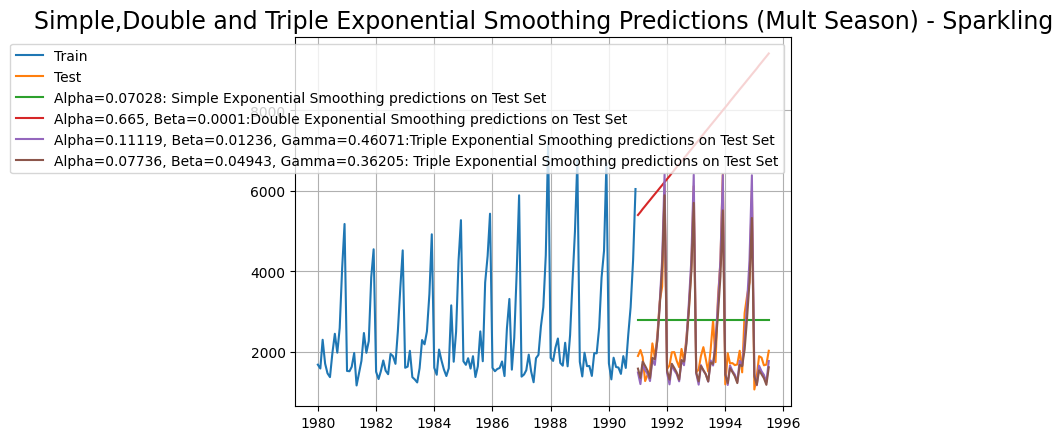

In [163]:
plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(SES_predict_spark, label='Alpha=0.07028: Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict_spark, label='Alpha=0.665, Beta=0.0001:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_add_spark, label='Alpha=0.11119, Beta=0.01236, Gamma=0.46071:Triple Exponential Smoothing predictions on Test Set')

plt.plot(TES_predict_am_spark, label='Alpha=0.07736, Beta=0.04943, Gamma=0.36205: Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions (Mult Season) - Sparkling', fontsize=17);

Report Model Accuracy

In [164]:
print('TES_am RMSE_spark:',mean_squared_error(test['Sparkling'].values,TES_predict_am_spark.values,squared=False))

TES_am RMSE_spark: 403.7062277856435


In [165]:
resultsDf_temp1 = pd.DataFrame({'Test RMSE Sparkling': [mean_squared_error(test['Sparkling'].values,TES_predict_am_spark.values,squared=False)]}
                           ,index=['Triple Exponential Smoothing (Multiplicative Season)'])



resultsDf_temp1

Test RMSE Sparkling
Triple Exponential Smoothing (Multiplicative Se...           403.706228

In [166]:
resultsDf13 = resultsDf_temp.join(resultsDf_temp1, how='outer')
resultsDf13

Test RMSE Rose   
Triple Exponential Smoothing (Multiplicative Se...       18.775066  \

                                                    Test RMSE Sparkling  
Triple Exponential Smoothing (Multiplicative Se...           403.706228

In [167]:
resultsDf14 = pd.concat([resultsDf, resultsDf13], axis=0)
resultsDf14

Test RMSE Rose   
RegressionOnTime                                         16.979414  \
NaiveModel                                               78.396083   
SimpleAverageModel                                       52.318735   
2pointTrailingMovingAverage                              12.298291   
4pointTrailingMovingAverage                              15.845558   
6pointTrailingMovingAverage                              15.986163   
9pointTrailingMovingAverage                              16.500823   
Simple Exponential Smoothing                             35.936195   
Double Exponential Smoothing                             16.980564   
Triple Exponential Smoothing (Additive Season)           15.534165   
Triple Exponential Smoothing (Multiplicative Se...       18.775066   

                                                    Test RMSE Sparkling  
RegressionOnTime                                            1389.135175  
NaiveModel                                                  3864.279352  
SimpleAverageModel                                          1275.081804  
2pointTrailingMovingAverage                                  813.400684  
4pointTrailingMovingAverage                                 1156.589694  
6pointTrailingMovingAverage                                 1283.927428  
9pointTrailingMovingAverage                                 1346.278315  
Simple Exponential Smoothing                                1338.004623  
Double Exponential Smoothing                                5291.879833  
Triple Exponential Smoothing (Additive Season)               378.626241  
Triple Exponential Smoothing (Multiplicative Se...           403.706228

In [168]:
resultsDf = resultsDf14.copy()
resultsDf

Test RMSE Rose   
RegressionOnTime                                         16.979414  \
NaiveModel                                               78.396083   
SimpleAverageModel                                       52.318735   
2pointTrailingMovingAverage                              12.298291   
4pointTrailingMovingAverage                              15.845558   
6pointTrailingMovingAverage                              15.986163   
9pointTrailingMovingAverage                              16.500823   
Simple Exponential Smoothing                             35.936195   
Double Exponential Smoothing                             16.980564   
Triple Exponential Smoothing (Additive Season)           15.534165   
Triple Exponential Smoothing (Multiplicative Se...       18.775066   

                                                    Test RMSE Sparkling  
RegressionOnTime                                            1389.135175  
NaiveModel                                                  3864.279352  
SimpleAverageModel                                          1275.081804  
2pointTrailingMovingAverage                                  813.400684  
4pointTrailingMovingAverage                                 1156.589694  
6pointTrailingMovingAverage                                 1283.927428  
9pointTrailingMovingAverage                                 1346.278315  
Simple Exponential Smoothing                                1338.004623  
Double Exponential Smoothing                                5291.879833  
Triple Exponential Smoothing (Additive Season)               378.626241  
Triple Exponential Smoothing (Multiplicative Se...           403.706228

# Holt-Winters - ETS(A, Ad, A) - Holt Winter's linear method with additive errors

### USING DAMPED TREND

Model for Rose

In [169]:
# Initializing the Double Exponential Smoothing Model
model_TES = ExponentialSmoothing(train['Rose'],trend='additive',seasonal='additive',initialization_method='estimated', damped_trend=True)
# Fitting the model
model_TES = model_TES.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.078427104063884, 'smoothing_trend': 0.01153866433417042, 'smoothing_seasonal': 0.07738829492070835, 'damping_trend': 0.9750377514944137, 'initial_level': 154.9897068813286, 'initial_trend': -1.5499014050433666, 'initial_seasons': array([-30.30786975, -18.40126802, -10.48833896, -22.28116478,
       -13.28355027,  -6.39129518,   3.09819437,  10.14129915,
         6.22649505,   3.88233102,  21.66685209,  65.85365321]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [170]:
# Forecasting using this model for the duration of the test set
TES_predict_add_damp_rose =  model_TES.forecast(len(test))
TES_predict_add_damp_rose

1991-01-01     48.231055
1991-02-01     61.045359
1991-03-01     68.342667
1991-04-01     58.197362
1991-05-01     65.575659
1991-06-01     70.640514
1991-07-01     79.851872
1991-08-01     85.224146
1991-09-01     83.117518
1991-10-01     81.244162
1991-11-01     99.227179
1991-12-01    140.741504
1992-01-01     47.004340
1992-02-01     59.849266
1992-03-01     67.176431
1992-04-01     57.060238
1992-05-01     64.466920
1992-06-01     69.559452
1992-07-01     78.797795
1992-08-01     84.196381
1992-09-01     82.115409
1992-10-01     80.267067
1992-11-01     98.274475
1992-12-01    139.812581
1993-01-01     46.098605
1993-02-01     58.966140
1993-03-01     66.315350
1993-04-01     56.220652
1993-05-01     63.648292
1993-06-01     68.761258
1993-07-01     78.019527
1993-08-01     83.437540
1993-09-01     81.375510
1993-10-01     79.545638
1993-11-01     97.571055
1993-12-01    139.126720
1994-01-01     45.429864
1994-02-01     58.314093
1994-03-01     65.679579
1994-04-01     55.600751


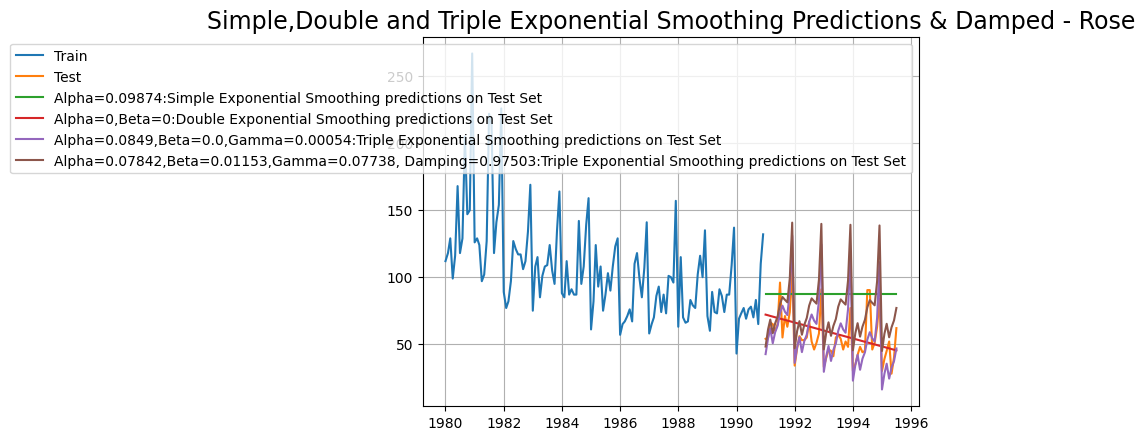

In [171]:
plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

plt.plot(SES_predict_rose, label='Alpha=0.09874:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict_rose, label='Alpha=0,Beta=0:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_add_rose, label='Alpha=0.0849,Beta=0.0,Gamma=0.00054:Triple Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_add_damp_rose, label='Alpha=0.07842,Beta=0.01153,Gamma=0.07738, Damping=0.97503:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions & Damped - Rose', fontsize=17);

In [172]:
print('TES RMSE DAMPED ROSE:',mean_squared_error(test['Rose'].values,TES_predict_add_damp_rose.values,squared=False))

TES RMSE DAMPED ROSE: 25.26325471383639


In [173]:
resultsDf_temp = pd.DataFrame({'Test RMSE Rose': [mean_squared_error(test['Rose'].values,TES_predict_add_damp_rose.values,squared=False)]}
                           ,index=['Triple Exponential Smoothing (Additive Season, Damped Trend)'])

import textwrap
textwrap.TextWrapper(resultsDf_temp.index)

resultsDf_temp

Test RMSE Rose
Triple Exponential Smoothing (Additive Season, ...       25.263255

Model for Sparkling

In [174]:
# Initializing the Double Exponential Smoothing Model
model_TES = ExponentialSmoothing(train['Sparkling'],trend='additive',seasonal='additive',initialization_method='estimated', damped_trend=True)
# Fitting the model
model_TES = model_TES.fit()

print('')
print('== Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES.params)


== Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.10062169418748235, 'smoothing_trend': 0.00018168671586953612, 'smoothing_seasonal': 0.511514820377231, 'damping_trend': 0.9702575091215162, 'initial_level': 2373.3349726249144, 'initial_trend': -5.20485555345566, 'initial_seasons': array([-668.12738741, -747.86212595, -344.25940902, -491.85127947,
       -840.22799617, -846.63257158, -387.82092411,  107.25493156,
       -279.9252947 ,  260.26683938, 1611.56995208, 2643.41954878]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [175]:
# Forecasting using this model for the duration of the test set
TES_predict_add_damp_spark =  model_TES.forecast(len(test))
TES_predict_add_damp_spark

1991-01-01    1502.750406
1991-02-01    1198.527164
1991-03-01    1697.164113
1991-04-01    1543.572592
1991-05-01    1464.154046
1991-06-01    1284.212633
1991-07-01    1801.409196
1991-08-01    1643.249695
1991-09-01    2325.526486
1991-10-01    3227.302621
1991-11-01    4302.234703
1991-12-01    6456.727997
1992-01-01    1501.617527
1992-02-01    1197.427979
1992-03-01    1696.097621
1992-04-01    1542.537820
1992-05-01    1463.150051
1992-06-01    1283.238499
1992-07-01    1800.464035
1992-08-01    1642.332646
1992-09-01    2324.636712
1992-10-01    3226.439311
1992-11-01    4301.397070
1992-12-01    6455.915278
1993-01-01    1500.828980
1993-02-01    1196.662885
1993-03-01    1695.355283
1993-04-01    1541.817561
1993-05-01    1462.451214
1993-06-01    1282.560448
1993-07-01    1799.806150
1993-08-01    1641.694328
1993-09-01    2324.017379
1993-10-01    3225.838400
1993-11-01    4300.814031
1993-12-01    6455.349579
1994-01-01    1500.280107
1994-02-01    1196.130337
1994-03-01  

Text(0.5, 1.0, 'Simple,Double and Triple Exponential Smoothing Predictions (DAMPED TREND)- Sparkling')

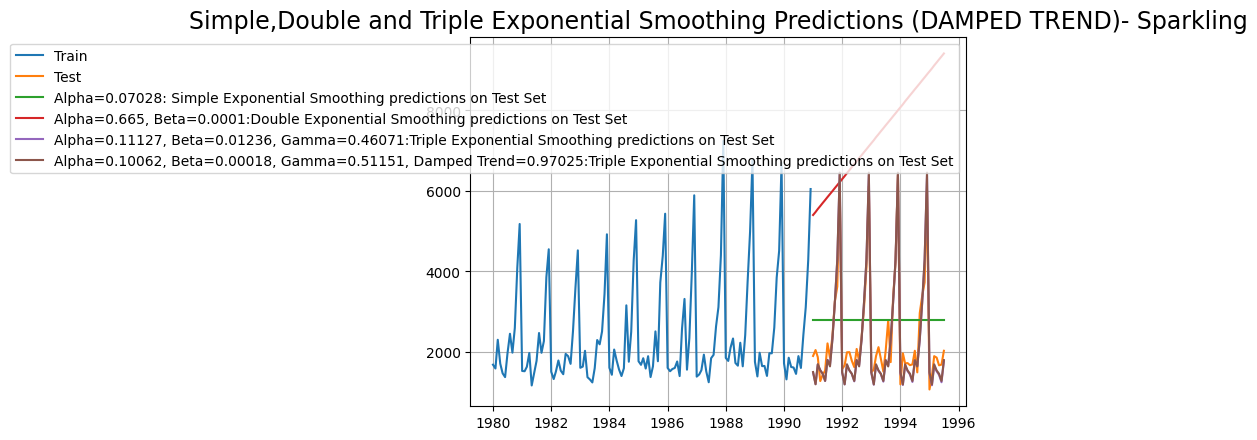

In [176]:
plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(SES_predict_spark, label='Alpha=0.07028: Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict_spark, label='Alpha=0.665, Beta=0.0001:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_add_spark, label='Alpha=0.11127, Beta=0.01236, Gamma=0.46071:Triple Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_add_damp_spark, label='Alpha=0.10062, Beta=0.00018, Gamma=0.51151, Damped Trend=0.97025:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions (DAMPED TREND)- Sparkling', fontsize=17)


In [177]:
print('TES RMSE SPARK DAMPED:',mean_squared_error(test['Sparkling'].values,TES_predict_add_damp_spark.values,squared=False))

TES RMSE SPARK DAMPED: 378.9069424872413


In [178]:
resultsDf_temp1 = pd.DataFrame({'Test RMSE Sparkling': [mean_squared_error(test['Sparkling'].values,TES_predict_add_spark.values,squared=False)]}
                           ,index=['Triple Exponential Smoothing (Additive Season, Damped Trend)'])

import textwrap
textwrap.TextWrapper(resultsDf_temp.index)

resultsDf_temp1

Test RMSE Sparkling
Triple Exponential Smoothing (Additive Season, ...           378.626241

In [179]:
resultsDf11 = resultsDf_temp.join(resultsDf_temp1, how='outer')
resultsDf11

Test RMSE Rose   
Triple Exponential Smoothing (Additive Season, ...       25.263255  \

                                                    Test RMSE Sparkling  
Triple Exponential Smoothing (Additive Season, ...           378.626241

In [180]:
resultsDf12 = pd.concat([resultsDf, resultsDf11], axis=0)
resultsDf12

Test RMSE Rose   
RegressionOnTime                                         16.979414  \
NaiveModel                                               78.396083   
SimpleAverageModel                                       52.318735   
2pointTrailingMovingAverage                              12.298291   
4pointTrailingMovingAverage                              15.845558   
6pointTrailingMovingAverage                              15.986163   
9pointTrailingMovingAverage                              16.500823   
Simple Exponential Smoothing                             35.936195   
Double Exponential Smoothing                             16.980564   
Triple Exponential Smoothing (Additive Season)           15.534165   
Triple Exponential Smoothing (Multiplicative Se...       18.775066   
Triple Exponential Smoothing (Additive Season, ...       25.263255   

                                                    Test RMSE Sparkling  
RegressionOnTime                                            1389.135175  
NaiveModel                                                  3864.279352  
SimpleAverageModel                                          1275.081804  
2pointTrailingMovingAverage                                  813.400684  
4pointTrailingMovingAverage                                 1156.589694  
6pointTrailingMovingAverage                                 1283.927428  
9pointTrailingMovingAverage                                 1346.278315  
Simple Exponential Smoothing                                1338.004623  
Double Exponential Smoothing                                5291.879833  
Triple Exponential Smoothing (Additive Season)               378.626241  
Triple Exponential Smoothing (Multiplicative Se...           403.706228  
Triple Exponential Smoothing (Additive Season, ...           378.626241

In [181]:
resultsDf = resultsDf12.copy()

# Holt-Winters - ETS(A, A, M) - Holt Winter's linear method

# Using Damped Trend

# ETS(A, Ad, M) model - Taking MULTIPLICATIVE SEASONALITY

Model for Rose

In [182]:
# Initializing the Double Exponential Smoothing Model
model_TES_am = ExponentialSmoothing(train['Rose'],trend='add',seasonal='multiplicative',initialization_method='estimated', damped_trend=True)
# Fitting the model
model_TES_am = model_TES_am.fit()

print('')
print('== Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES_am.params)


== Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.05921476076079892, 'smoothing_trend': 0.020252774684074056, 'smoothing_seasonal': 0.004055776297607447, 'damping_trend': 0.9772370319747687, 'initial_level': 136.25811502851224, 'initial_trend': -1.4905747496073531, 'initial_seasons': array([0.87608681, 0.99240523, 1.08107113, 0.95302591, 1.0668395 ,
       1.15077788, 1.25932385, 1.34732797, 1.2768569 , 1.25150631,
       1.45495275, 1.98687924]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [183]:
# Forecasting using this model for the duration of the test set
TES_predict_am_damp_rose =  model_TES_am.forecast(len(test))
TES_predict_am_damp_rose

1991-01-01     57.798263
1991-02-01     65.505362
1991-03-01     71.234453
1991-04-01     62.758312
1991-05-01     70.050683
1991-06-01     75.329037
1991-07-01     82.357168
1991-08-01     87.915176
1991-09-01     83.325352
1991-10-01     81.585835
1991-11-01     94.777358
1991-12-01    129.083606
1992-01-01     56.797501
1992-02-01     64.395159
1992-03-01     70.052745
1992-04-01     61.739320
1992-05-01     68.937473
1992-06-01     74.157439
1992-07-01     81.103580
1992-08-01     86.605569
1992-09-01     82.110665
1992-10-01     80.421979
1992-11-01     93.454316
1992-12-01    127.320364
1993-01-01     56.038348
1993-02-01     63.552986
1993-03-01     69.156331
1993-04-01     60.966337
1993-05-01     68.093018
1993-06-01     73.268694
1993-07-01     80.152639
1993-08-01     85.612134
1993-09-01     81.189233
1993-10-01     79.539106
1993-11-01     92.450689
1993-12-01    125.982812
1994-01-01     55.462472
1994-02-01     62.914134
1994-03-01     68.476332
1994-04-01     60.379971


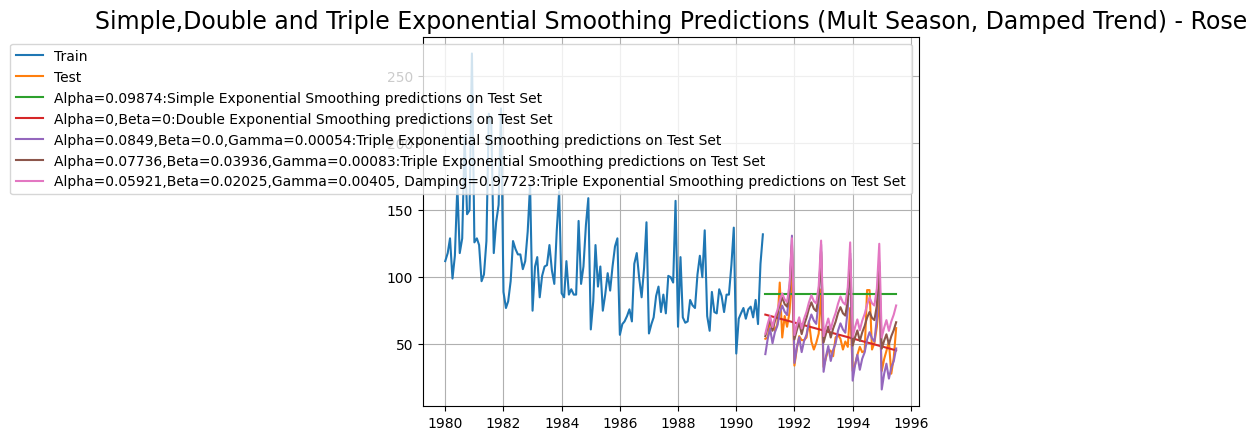

In [184]:
plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

plt.plot(SES_predict_rose, label='Alpha=0.09874:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict_rose, label='Alpha=0,Beta=0:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_add_rose, label='Alpha=0.0849,Beta=0.0,Gamma=0.00054:Triple Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_am_rose, label='Alpha=0.07736,Beta=0.03936,Gamma=0.00083:Triple Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_am_damp_rose, label='Alpha=0.05921,Beta=0.02025,Gamma=0.00405, Damping=0.97723:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions (Mult Season, Damped Trend) - Rose', fontsize=17);

Report Model Accuracy

In [185]:
print('TES_am RMSE_rose DAMPED:',mean_squared_error(test['Rose'].values,TES_predict_am_damp_rose.values,squared=False))

TES_am RMSE_rose DAMPED: 25.088023147701495


In [186]:
resultsDf_temp = pd.DataFrame({'Test RMSE Rose': [mean_squared_error(test['Rose'].values,TES_predict_am_damp_rose.values,squared=False)]}
                           ,index=['Triple Exponential Smoothing (Multiplicative Season, Damped Trend)'])



resultsDf_temp

Test RMSE Rose
Triple Exponential Smoothing (Multiplicative Se...       25.088023

Model for Sparkling

In [187]:
# Initializing the Double Exponential Smoothing Model
model_TES_am = ExponentialSmoothing(train['Sparkling'],trend='add',seasonal='multiplicative',initialization_method='estimated', damped_trend=True)
# Fitting the model
model_TES_am = model_TES_am.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES_am.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.11107167193609957, 'smoothing_trend': 0.03702389980900021, 'smoothing_seasonal': 0.39507932654880007, 'damping_trend': 0.9899999404869427, 'initial_level': 2356.5417871804284, 'initial_trend': -9.180203948562786, 'initial_seasons': array([0.71435356, 0.69069064, 0.89984145, 0.80656905, 0.65538317,
       0.65588695, 0.88269091, 1.12243518, 0.91850081, 1.19454491,
       1.85207394, 2.34037914]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [188]:
# Forecasting using this model for the duration of the test set
TES_predict_am_damp_spark =  model_TES_am.forecast(len(test))
TES_predict_am_damp_spark

1991-01-01    1591.400712
1991-02-01    1348.109039
1991-03-01    1768.331811
1991-04-01    1654.048544
1991-05-01    1548.113612
1991-06-01    1363.568481
1991-07-01    1862.870528
1991-08-01    1797.339996
1991-09-01    2310.534562
1991-10-01    3163.672919
1991-11-01    4176.949302
1991-12-01    5994.180382
1992-01-01    1558.894787
1992-02-01    1320.798853
1992-03-01    1732.803577
1992-04-01    1621.090460
1992-05-01    1517.521178
1992-06-01    1336.845841
1992-07-01    1826.665407
1992-08-01    1762.698529
1992-09-01    2266.372327
1992-10-01    3103.708097
1992-11-01    4098.439393
1992-12-01    5882.455650
1993-01-01    1530.082048
1993-02-01    1296.591536
1993-03-01    1701.311911
1993-04-01    1591.876934
1993-05-01    1490.404527
1993-06-01    1313.159315
1993-07-01    1794.573759
1993-08-01    1731.992878
1993-09-01    2227.227618
1993-10-01    3050.556224
1993-11-01    4028.849447
1993-12-01    5783.424610
1994-01-01    1504.542891
1994-02-01    1275.134551
1994-03-01  

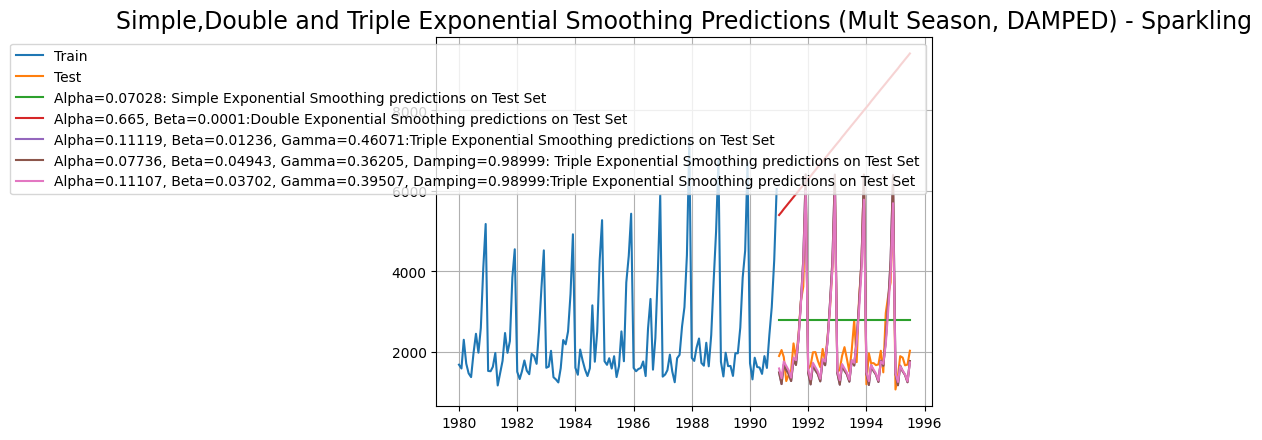

In [189]:
plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(SES_predict_spark, label='Alpha=0.07028: Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict_spark, label='Alpha=0.665, Beta=0.0001:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_add_spark, label='Alpha=0.11119, Beta=0.01236, Gamma=0.46071:Triple Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_add_spark, label='Alpha=0.07736, Beta=0.04943, Gamma=0.36205, Damping=0.98999: Triple Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_am_damp_spark, label='Alpha=0.11107, Beta=0.03702, Gamma=0.39507, Damping=0.98999:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions (Mult Season, DAMPED) - Sparkling', fontsize=17);

Report Model Accuracy

In [190]:
print('TES_am DAMPED RMSE_spark:',mean_squared_error(test['Sparkling'].values,TES_predict_am_damp_spark.values,squared=False))

TES_am DAMPED RMSE_spark: 352.45096645100705


In [191]:
resultsDf_temp1 = pd.DataFrame({'Test RMSE Sparkling': [mean_squared_error(test['Sparkling'].values,TES_predict_am_damp_spark.values,squared=False)]}
                           ,index=['Triple Exponential Smoothing (Multiplicative Season, Damped Trend)'])



resultsDf_temp1

Test RMSE Sparkling
Triple Exponential Smoothing (Multiplicative Se...           352.450966

In [192]:
resultsDf13 = resultsDf_temp.join(resultsDf_temp1, how='outer')
resultsDf13

Test RMSE Rose   
Triple Exponential Smoothing (Multiplicative Se...       25.088023  \

                                                    Test RMSE Sparkling  
Triple Exponential Smoothing (Multiplicative Se...           352.450966

In [193]:
resultsDf14 = pd.concat([resultsDf, resultsDf13], axis=0)
resultsDf14

Test RMSE Rose   
RegressionOnTime                                         16.979414  \
NaiveModel                                               78.396083   
SimpleAverageModel                                       52.318735   
2pointTrailingMovingAverage                              12.298291   
4pointTrailingMovingAverage                              15.845558   
6pointTrailingMovingAverage                              15.986163   
9pointTrailingMovingAverage                              16.500823   
Simple Exponential Smoothing                             35.936195   
Double Exponential Smoothing                             16.980564   
Triple Exponential Smoothing (Additive Season)           15.534165   
Triple Exponential Smoothing (Multiplicative Se...       18.775066   
Triple Exponential Smoothing (Additive Season, ...       25.263255   
Triple Exponential Smoothing (Multiplicative Se...       25.088023   

                                                    Test RMSE Sparkling  
RegressionOnTime                                            1389.135175  
NaiveModel                                                  3864.279352  
SimpleAverageModel                                          1275.081804  
2pointTrailingMovingAverage                                  813.400684  
4pointTrailingMovingAverage                                 1156.589694  
6pointTrailingMovingAverage                                 1283.927428  
9pointTrailingMovingAverage                                 1346.278315  
Simple Exponential Smoothing                                1338.004623  
Double Exponential Smoothing                                5291.879833  
Triple Exponential Smoothing (Additive Season)               378.626241  
Triple Exponential Smoothing (Multiplicative Se...           403.706228  
Triple Exponential Smoothing (Additive Season, ...           378.626241  
Triple Exponential Smoothing (Multiplicative Se...           352.450966

In [194]:
resultsDf = resultsDf14.copy()
resultsDf

Test RMSE Rose   
RegressionOnTime                                         16.979414  \
NaiveModel                                               78.396083   
SimpleAverageModel                                       52.318735   
2pointTrailingMovingAverage                              12.298291   
4pointTrailingMovingAverage                              15.845558   
6pointTrailingMovingAverage                              15.986163   
9pointTrailingMovingAverage                              16.500823   
Simple Exponential Smoothing                             35.936195   
Double Exponential Smoothing                             16.980564   
Triple Exponential Smoothing (Additive Season)           15.534165   
Triple Exponential Smoothing (Multiplicative Se...       18.775066   
Triple Exponential Smoothing (Additive Season, ...       25.263255   
Triple Exponential Smoothing (Multiplicative Se...       25.088023   

                                                    Test RMSE Sparkling  
RegressionOnTime                                            1389.135175  
NaiveModel                                                  3864.279352  
SimpleAverageModel                                          1275.081804  
2pointTrailingMovingAverage                                  813.400684  
4pointTrailingMovingAverage                                 1156.589694  
6pointTrailingMovingAverage                                 1283.927428  
9pointTrailingMovingAverage                                 1346.278315  
Simple Exponential Smoothing                                1338.004623  
Double Exponential Smoothing                                5291.879833  
Triple Exponential Smoothing (Additive Season)               378.626241  
Triple Exponential Smoothing (Multiplicative Se...           403.706228  
Triple Exponential Smoothing (Additive Season, ...           378.626241  
Triple Exponential Smoothing (Multiplicative Se...           352.450966

# Check Stationarity of the Data

Stationarity in time series refers to a statistical property where the underlying statistical properties of a time series do not change over time. A stationary time series is one whose statistical properties, such as mean, variance, and autocorrelation, remain constant over time.

In more formal terms, a time series is considered stationary if it satisfies the following conditions:

1. **Constant Mean:** The mean of the series remains constant over time.
2. **Constant Variance:** The variance (or standard deviation) of the series remains constant over time.
3. **Constant Autocorrelation:** The autocorrelation between the observations at different time points remains constant.

Stationarity is a crucial assumption in many time series models and analyses. When a time series is non-stationary, it may exhibit trends, seasonality, or other patterns that can make it challenging to model and predict accurately. Preprocessing steps, such as differencing or transformations, are often applied to make a time series stationary before applying certain forecasting models.

For Rose

In [195]:
from statsmodels.tsa.stattools import adfuller

In [196]:
dfrs = adfuller(data['Rose'],regression='ct')
print('DF test statistic is %3.3f' %dfrs[0])
print('DF test p-value is' ,dfrs[1])
print('Number of lags used' ,dfrs[2])

DF test statistic is -2.443
DF test p-value is 0.3571250448455857
Number of lags used 12


The Augmented Dickey-Fuller (ADF) test is used to check the stationarity of a time series. In this case, the 'Rose' data is tested, providing a test statistic, p-value, and the number of lags used in the regression; a lower p-value suggests stronger evidence against stationarity.

In [197]:
dfrs = adfuller(data['Rose'].diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dfrs[0])
print('DF test p-value is' ,dfrs[1])
print('Number of lags used' ,dfrs[2])

DF test statistic is -7.988
DF test p-value is 7.599609649113482e-11
Number of lags used 12


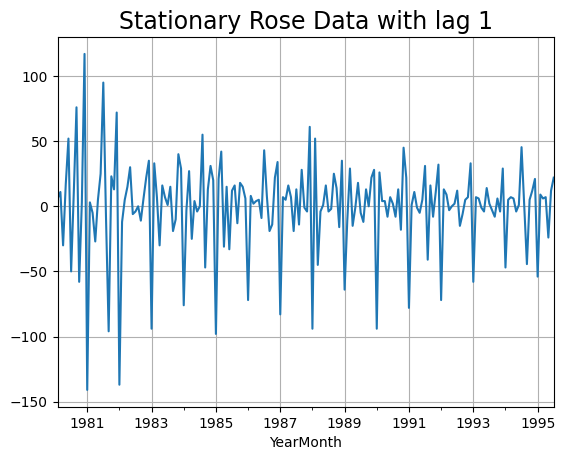

In [198]:
data['Rose'].diff().dropna().plot(grid=True);
plt.title('Stationary Rose Data with lag 1', fontsize=17);

For Sparkling

In [199]:
dfss = adfuller(data['Sparkling'],regression='ct')
print('DF test statistic is %3.3f' %dfss[0])
print('DF test p-value is' ,dfss[1])
print('Number of lags used' ,dfss[2])

DF test statistic is -1.798
DF test p-value is 0.7055958459932058
Number of lags used 12


In [200]:
dfss = adfuller(data['Sparkling'].diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dfss[0])
print('DF test p-value is' ,dfss[1])
print('Number of lags used' ,dfss[2])

DF test statistic is -44.912
DF test p-value is 0.0
Number of lags used 10


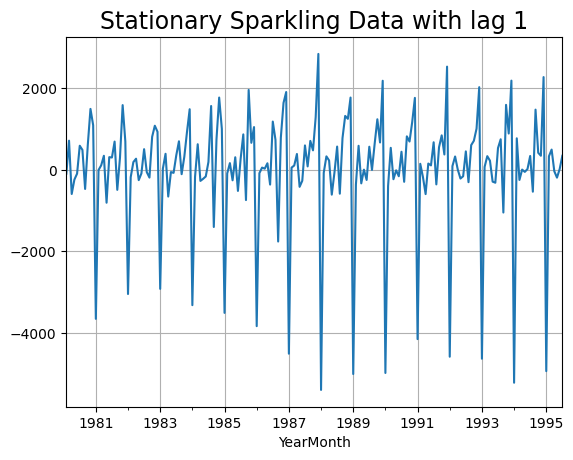

In [201]:
data['Sparkling'].diff().dropna().plot(grid=True);
plt.title('Stationary Sparkling Data with lag 1', fontsize=17);

# ARIMA and SARIMA Model

ARIMA (AutoRegressive Integrated Moving Average) is a time series forecasting model that combines autoregression, differencing, and moving average components. It is widely used for capturing different patterns in time series data.

SARIMA (Seasonal AutoRegressive Integrated Moving Average) extends ARIMA by incorporating seasonality components, making it suitable for time series data with seasonal patterns. SARIMA includes additional parameters to model seasonality and can provide more accurate forecasts for data with repeating patterns over time.

#### Checking the Stationarity for Rose Training Data
Model on Rose

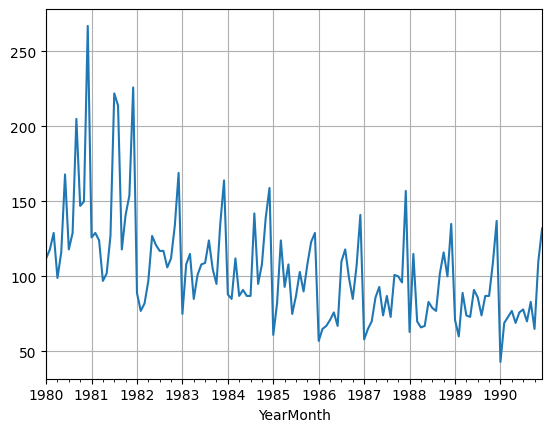

In [202]:
train['Rose'].plot(grid=True);

In [203]:
dftest = adfuller(train['Rose'],regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -1.686
DF test p-value is 0.7569093051046977
Number of lags used 13


In [204]:
dftest = adfuller(train['Rose'].diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -6.804
DF test p-value is 3.8948313567832276e-08
Number of lags used 12


Text(0.5, 1.0, 'Stationary Train Rose Time Series')

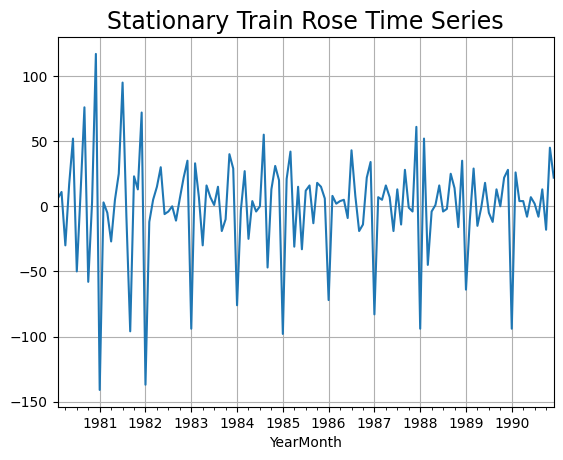

In [205]:
train['Rose'].diff().dropna().plot(grid=True);
plt.title('Stationary Train Rose Time Series', fontsize=17)

In [206]:
train['Rose'].info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 132 entries, 1980-01-01 to 1990-12-01
Series name: Rose
Non-Null Count  Dtype  
--------------  -----  
132 non-null    float64
dtypes: float64(1)
memory usage: 2.1 KB


## Build ARIMA Model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC)

In [207]:
import itertools

p = q = range(0, 4)
d= range(1,2)
pdq = list(itertools.product(p, d, q))

print('Examples of the parameter combinations for the Model')

for i in range(0,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Examples of the parameter combinations for the Model
Model: (0, 1, 0)
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


The code generates and prints examples of parameter combinations (p, d, q) for the ARIMA model, where p and q range from 0 to 3, and d is set to 1. It uses itertools.product to create a list of all possible combinations.

In [208]:
ROSE_ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ROSE_ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [209]:
from statsmodels.tsa.arima.model import ARIMA

# Creating an empty DataFrame with column names only
ROSE_ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])

# Loop through the parameter combinations
for param in pdq:
    try:
        # Fit ARIMA model
        ARIMA_model = ARIMA(train['Rose'].values, order=param).fit()

        # Print AIC values
        print('ARIMA{} - AIC:{}'.format(param, ARIMA_model.aic))

        # Append results to the DataFrame
        ROSE_ARIMA_AIC = ROSE_ARIMA_AIC.append({'param': param, 'AIC': ARIMA_model.aic}, ignore_index=True)

    except Exception as e:
        continue

# Convert 'AIC' column to numeric
ROSE_ARIMA_AIC['AIC'] = pd.to_numeric(ROSE_ARIMA_AIC['AIC'], errors='coerce')

# Check if the DataFrame is not empty
if not ROSE_ARIMA_AIC.empty:
    # Find the parameters with the lowest AIC
    best_params = ROSE_ARIMA_AIC.loc[ROSE_ARIMA_AIC['AIC'].idxmin()]

    # Display the best parameters
    print("Best Parameters (p, d, q):", best_params['param'])
    print("Best AIC:", best_params['AIC'])
else:
    print("DataFrame is empty. Check if AIC values are calculated correctly.")


ARIMA(0, 1, 0) - AIC:1333.1546729124348
ARIMA(0, 1, 1) - AIC:1282.3098319748306
ARIMA(0, 1, 2) - AIC:1279.67152885358
ARIMA(0, 1, 3) - AIC:1280.5453761734657
ARIMA(1, 1, 0) - AIC:1317.350310538146
ARIMA(1, 1, 1) - AIC:1280.5742295380073
ARIMA(1, 1, 2) - AIC:1279.8707234231917
ARIMA(1, 1, 3) - AIC:1281.8707223309964
ARIMA(2, 1, 0) - AIC:1298.6110341604885
ARIMA(2, 1, 1) - AIC:1281.5078621868502
ARIMA(2, 1, 2) - AIC:1281.8707222264452


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(2, 1, 3) - AIC:1274.6954388327786
ARIMA(3, 1, 0) - AIC:1297.4810917271734
ARIMA(3, 1, 1) - AIC:1282.419277627198
ARIMA(3, 1, 2) - AIC:1283.720740597714
ARIMA(3, 1, 3) - AIC:1278.6552163060173
DataFrame is empty. Check if AIC values are calculated correctly.


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [210]:
ROSE_ARIMA_AIC.sort_values(by='AIC',ascending=True).head()

Empty DataFrame
Columns: [param, AIC]
Index: []

In [211]:
auto_ARIMA = ARIMA(train['Rose'], order=(2,1,3))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization faile

                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(2, 1, 3)   Log Likelihood                -631.348
Date:                Sun, 14 Jan 2024   AIC                           1274.695
Time:                        17:06:06   BIC                           1291.947
Sample:                    01-01-1980   HQIC                          1281.705
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6781      0.084    -19.987      0.000      -1.843      -1.514
ar.L2         -0.7289      0.084     -8.682      0.000      -0.893      -0.564
ma.L1          1.0446      0.627      1.665      0.0

Rose Train Diagostics Plot

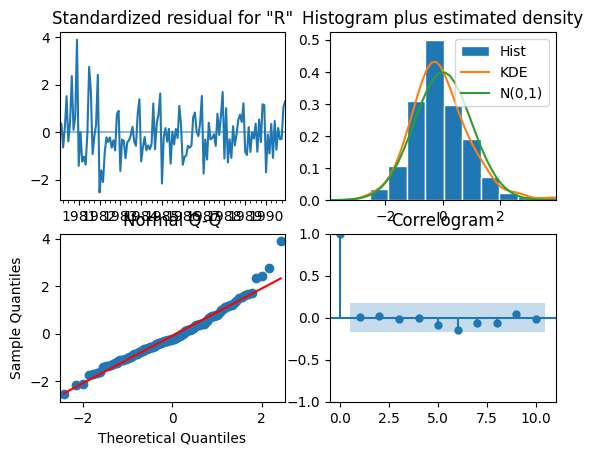

In [212]:
results_auto_ARIMA.plot_diagnostics();

### Prediction on Rose Test Set using this Model and Evaluate the Model

In [213]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))
predicted_auto_ARIMA

1991-01-01    85.607929
1991-02-01    90.529363
1991-03-01    81.969804
1991-04-01    92.746232
1991-05-01    80.901445
1991-06-01    92.923216
1991-07-01    81.383139
1991-08-01    91.985908
1991-09-01    82.604911
1991-10-01    90.618865
1991-11-01    84.008392
1991-12-01    89.260121
1992-01-01    85.265507
1992-02-01    88.140939
1992-03-01    86.227302
1992-04-01    87.342716
1992-05-01    86.865757
1992-06-01    86.853143
1992-07-01    87.221946
1992-08-01    86.612265
1992-09-01    87.366541
1992-10-01    86.545192
1992-11-01    87.373704
1992-12-01    86.582058
1993-01-01    87.306619
1993-02-01    86.667761
1993-03-01    87.211701
1993-04-01    86.764574
1993-05-01    87.118425
1993-06-01    86.850535
1993-07-01    87.042163
1993-08-01    86.915854
1993-09-01    86.988138
1993-10-01    86.958902
1993-11-01    86.955277
1993-12-01    86.982669
1994-01-01    86.939345
1994-02-01    86.992080
1994-03-01    86.935165
1994-04-01    86.992236
1994-05-01    86.937951
1994-06-01    86

In [214]:
# Mean Absolute Percentage Error (MAPE) - Function Definition

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100
from sklearn.metrics import mean_squared_error

In [215]:
rmse = mean_squared_error(test['Rose'],predicted_auto_ARIMA,squared=False)
mape = mean_absolute_percentage_error(test['Rose'],predicted_auto_ARIMA)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 35.95988767421301 
MAPE: 72.66343300563568


In [216]:
resultsR0 = pd.DataFrame({'Test RMSE Rose': rmse,'Test MAPE Rose':mape}
                           ,index=['ARIMA(2,1,3)'])
resultsR0

Test RMSE Rose  Test MAPE Rose
ARIMA(2,1,3)       35.959888       72.663433

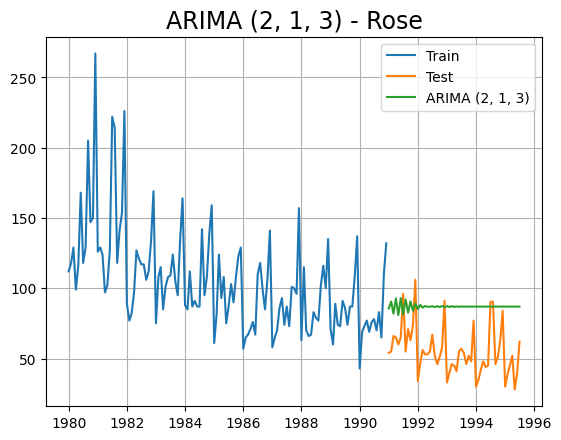

In [217]:
plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(predicted_auto_ARIMA,label='ARIMA (2, 1, 3)')


plt.legend(loc='best')
plt.grid()
plt.title('ARIMA (2, 1, 3) - Rose', fontsize=17);

## Build a version of ARIMA Model for the best parameters which are selected by looking at the ACF and th PACF plots 


Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) are statistical tools used in time series analysis to identify and understand the correlation structure within a sequence of observations.

1. ACF (Autocorrelation Function): It measures the correlation between a time series and its lagged values. ACF helps identify the presence of patterns or repeating cycles in the data, indicating the degree of correlation between observations at different time lags.

2. PACF (Partial Autocorrelation Function): PACF measures the correlation between a time series and its lagged values while adjusting for the effects of intermediate lags. It provides insights into the direct relationship between observations at different lags, helping to determine the optimal lag order for autoregressive models.

In summary, ACF and PACF are tools used to analyze the temporal dependencies within time series data, aiding in the selection of appropriate models for forecasting and understanding the underlying patterns in the data.

For Rose

In [218]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

Text(0.5, 1.0, 'Rose Training Data Autocorrelation')

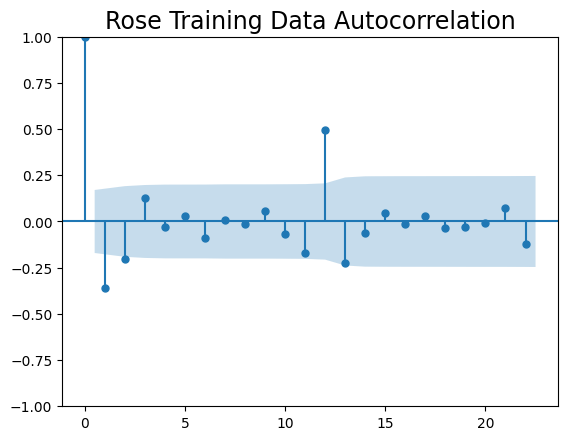

In [219]:
plot_acf(train['Rose'].diff(), missing='drop', alpha=0.05)
plt.title('Rose Training Data Autocorrelation',fontsize=17)

Text(0.5, 1.0, 'Rose Training Data Partial Autocorrelation')

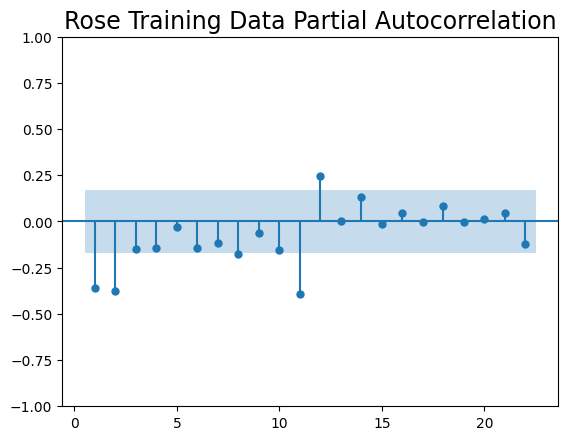

In [220]:
plot_pacf(train['Rose'].diff().dropna(), zero=False, alpha=0.05, method='ywmle')
plt.title('Rose Training Data Partial Autocorrelation',fontsize=17)

In [221]:
manual_ARIMA = ARIMA(train['Rose'], order=(2,1,2))

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -635.935
Date:                Sun, 14 Jan 2024   AIC                           1281.871
Time:                        17:06:16   BIC                           1296.247
Sample:                    01-01-1980   HQIC                          1287.712
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4540      0.469     -0.969      0.333      -1.372       0.464
ar.L2          0.0001      0.170      0.001      0.999      -0.334       0.334
ma.L1         -0.2541      0.459     -0.554      0.5

C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


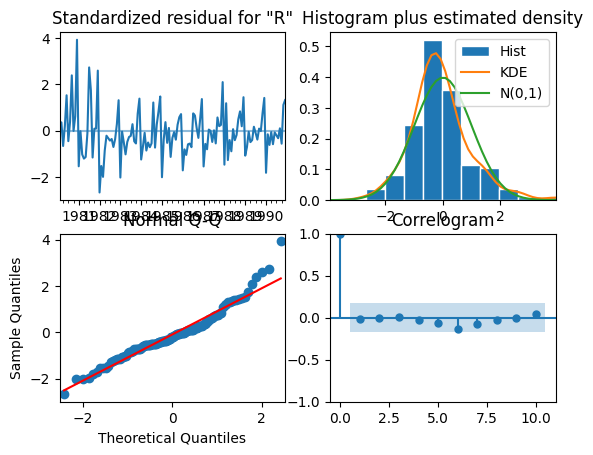

In [222]:
results_manual_ARIMA.plot_diagnostics();

#### Predict on the Test set using this model and evaluate the model

In [223]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [224]:
rmse = mean_squared_error(test['Rose'],predicted_manual_ARIMA,squared=False)
mape = mean_absolute_percentage_error(test['Rose'],predicted_manual_ARIMA)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 36.01158184725829 
MAPE: 72.85973307765629


In [225]:
temp_resultsR2 = pd.DataFrame({'Test RMSE Rose': rmse,'Test MAPE Rose':mape}
                           ,index=['ARIMA(2,1,2)'])


resultsR2 = pd.concat([resultsR0,temp_resultsR2])

resultsR2

Test RMSE Rose  Test MAPE Rose
ARIMA(2,1,3)       35.959888       72.663433
ARIMA(2,1,2)       36.011582       72.859733

In [226]:
resultsR0 = resultsR2.copy()
resultsR0

Test RMSE Rose  Test MAPE Rose
ARIMA(2,1,3)       35.959888       72.663433
ARIMA(2,1,2)       36.011582       72.859733

Text(0.5, 1.0, 'ARIMA (2, 1, 2) Forecast - Rose')

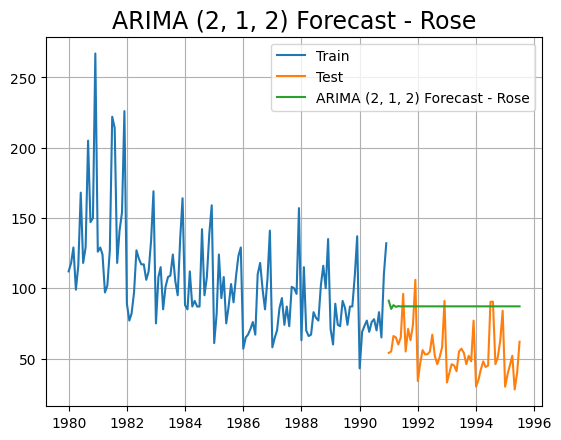

In [227]:
plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

plt.plot(predicted_manual_ARIMA, label = 'ARIMA (2, 1, 2) Forecast - Rose')
plt.grid()
plt.legend(loc='best')
plt.title('ARIMA (2, 1, 2) Forecast - Rose', fontsize=17)

### ARIMA Model for Sparkling

Text(0.5, 1.0, 'Sparkling Training Data Autocorrelation')

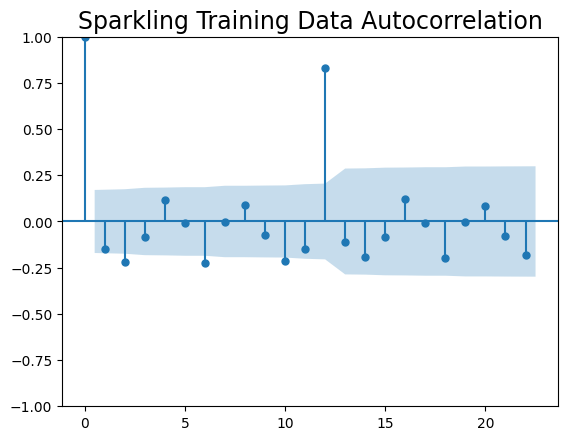

In [228]:
plot_acf(train['Sparkling'].diff(), missing='drop', alpha=0.05)
plt.title('Sparkling Training Data Autocorrelation',fontsize=17)

Text(0.5, 1.0, 'Sparkling Training Data Partial Autocorrelation')

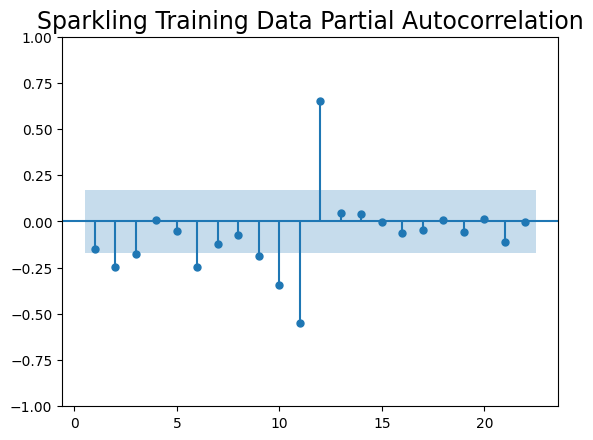

In [229]:
plot_pacf(train['Sparkling'].diff().dropna(), zero=False, alpha=0.05, method='ywmle')
plt.title('Sparkling Training Data Partial Autocorrelation',fontsize=17)

In [230]:
manual_ARIMA_S = ARIMA(train['Sparkling'], order=(2,1,2))

results_manual_ARIMA_S = manual_ARIMA_S.fit()

print(results_manual_ARIMA_S.summary())

                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1101.755
Date:                Sun, 14 Jan 2024   AIC                           2213.509
Time:                        17:06:26   BIC                           2227.885
Sample:                    01-01-1980   HQIC                          2219.351
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3121      0.046     28.781      0.000       1.223       1.401
ar.L2         -0.5593      0.072     -7.740      0.000      -0.701      -0.418
ma.L1         -1.9917      0.109    -18.217      0.0

C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


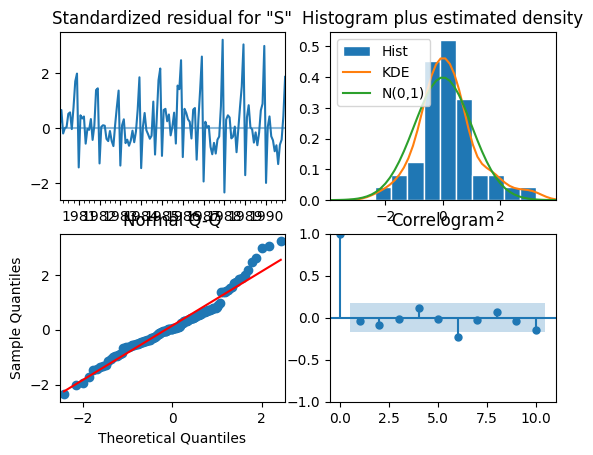

In [231]:
results_manual_ARIMA_S.plot_diagnostics();

In [232]:
predicted_manual_ARIMA_S = results_manual_ARIMA_S.forecast(steps=len(test))

In [233]:
rmse = mean_squared_error(test['Sparkling'],predicted_manual_ARIMA_S,squared=False)
mape = mean_absolute_percentage_error(test['Sparkling'],predicted_manual_ARIMA_S)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 1299.980107147282 
MAPE: 47.100014181763235


In [234]:
temp_resultsR2S = pd.DataFrame({'Test RMSE Sparkling': rmse,'Test MAPE Sparkling':mape}
                           ,index=['ARIMA(2,1,2)'])


# resultsR2 = pd.concat([resultsR2,temp_resultsR2S])

# resultsR2
temp_resultsR2S

Test RMSE Sparkling  Test MAPE Sparkling
ARIMA(2,1,2)          1299.980107            47.100014

Text(0.5, 1.0, 'ARIMA (2, 1, 2) Forecast - Sparkling')

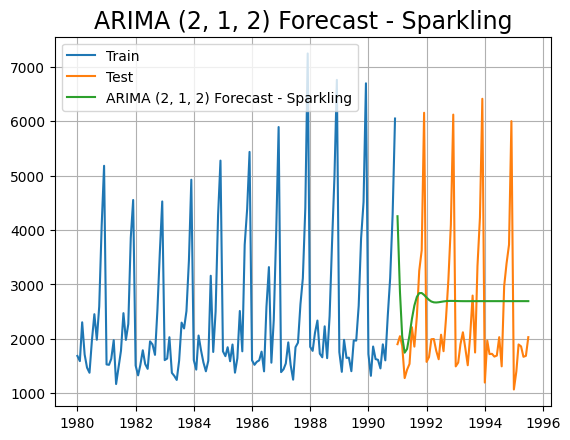

In [235]:
plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(predicted_manual_ARIMA_S, label = 'ARIMA (2, 1, 2) Forecast - Sparkling')
plt.grid()
plt.legend(loc='best')
plt.title('ARIMA (2, 1, 2) Forecast - Sparkling', fontsize=17)

# Build SARIMA Model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC)

For Rose

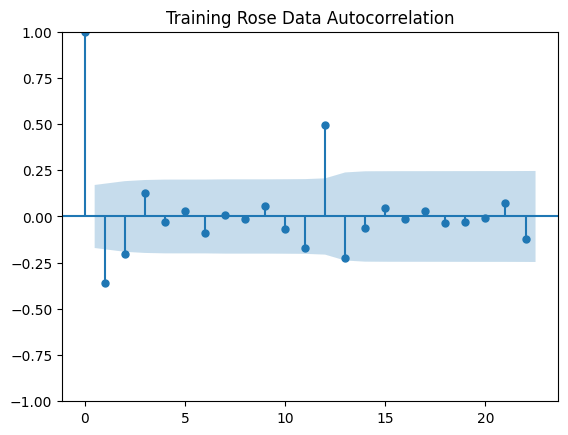

In [236]:
plot_acf(train['Rose'].diff(),title='Training Rose Data Autocorrelation',missing='drop');

In [237]:
import itertools
p = q = range(0, 4)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
PDQ = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of the parameter combinations for the Model are')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], PDQ[i]))

Examples of the parameter combinations for the Model are
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (0, 1, 3)(0, 0, 3, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (1, 1, 3)(1, 0, 3, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)
Model: (2, 1, 3)(2, 0, 3, 12)
Model: (3, 1, 0)(3, 0, 0, 12)
Model: (3, 1, 1)(3, 0, 1, 12)
Model: (3, 1, 2)(3, 0, 2, 12)
Model: (3, 1, 3)(3, 0, 3, 12)


In [238]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])

In [239]:
# Creating an empty list to store results
SARIMA_AIC_results = []

for param in pdq:
    for param_seasonal in PDQ:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                                order=param,
                                                seasonal_order=param_seasonal,
                                                enforce_stationarity=False,
                                                enforce_invertibility=False)

        results_SARIMA = SARIMA_model.fit(maxiter=10)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))

        # Append to the list
        SARIMA_AIC_results.append({'param': param, 'seasonal': param_seasonal, 'AIC': results_SARIMA.aic})

# Convert the list to a DataFrame
SARIMA_AIC = pd.DataFrame(SARIMA_AIC_results)


SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:1323.9657875279158
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1145.42364998391
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:976.511146285333


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retva

SARIMA(0, 1, 0)x(0, 0, 3, 12) - AIC:3421.1844824423642
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1139.921738995602
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1116.5440098509814
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:969.6914413893428


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(1, 0, 3, 12) - AIC:2888.8759424455857
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:960.8812220353041
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:962.9103982699407


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:955.5993703009495


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(2, 0, 3, 12) - AIC:3564.9062790337803
SARIMA(0, 1, 0)x(3, 0, 0, 12) - AIC:850.7535403931095


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(3, 0, 1, 12) - AIC:851.9721174175811


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(3, 0, 2, 12) - AIC:851.6515137010828
SARIMA(0, 1, 0)x(3, 0, 3, 12) - AIC:3659.7178523519015
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:1264.2152835699849
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1111.3052369386392


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:939.4156898459498


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(0, 0, 3, 12) - AIC:4019.369675869586
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1113.3717394903792
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1096.0020439024129


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:971.1514781882842


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(1, 0, 3, 12) - AIC:3939.6841945221254
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:923.0925032463105


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:981.2266898603423
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:956.5781130070486


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(2, 0, 3, 12) - AIC:3761.709217667818


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(3, 0, 0, 12) - AIC:820.023274699083


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(3, 0, 1, 12) - AIC:834.3369436135979


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(3, 0, 2, 12) - AIC:861.4046852442625


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(3, 0, 3, 12) - AIC:3652.2669540981806
SARIMA(0, 1, 2)x(0, 0, 0, 12) - AIC:1252.2393612731762
SARIMA(0, 1, 2)x(0, 0, 1, 12) - AIC:1096.250207981707
SARIMA(0, 1, 2)x(0, 0, 2, 12) - AIC:961.0509478403087


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retva

SARIMA(0, 1, 2)x(0, 0, 3, 12) - AIC:2854.60709539507
SARIMA(0, 1, 2)x(1, 0, 0, 12) - AIC:1109.6129241826848
SARIMA(0, 1, 2)x(1, 0, 1, 12) - AIC:1080.2901744813335


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(1, 0, 2, 12) - AIC:959.1894068643521


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(1, 0, 3, 12) - AIC:2882.4616807201596
SARIMA(0, 1, 2)x(2, 0, 0, 12) - AIC:928.4743953154734


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(2, 0, 1, 12) - AIC:970.3063209991059
SARIMA(0, 1, 2)x(2, 0, 2, 12) - AIC:953.2344378782373


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(2, 0, 3, 12) - AIC:2543.03574409639


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(3, 0, 0, 12) - AIC:845.1740718800812


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(3, 0, 1, 12) - AIC:838.7232591295051


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(3, 0, 2, 12) - AIC:869.8875270243093


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(3, 0, 3, 12) - AIC:2216.6448056848553
SARIMA(0, 1, 3)x(0, 0, 0, 12) - AIC:1244.238272905999
SARIMA(0, 1, 3)x(0, 0, 1, 12) - AIC:1085.5140069848064


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(0, 0, 2, 12) - AIC:944.665141758184


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(0, 0, 3, 12) - AIC:3971.0654118581124
SARIMA(0, 1, 3)x(1, 0, 0, 12) - AIC:1102.2502191998135
SARIMA(0, 1, 3)x(1, 0, 1, 12) - AIC:1064.825300522074


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(1, 0, 2, 12) - AIC:939.9485610593633


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(1, 0, 3, 12) - AIC:3871.214803178632
SARIMA(0, 1, 3)x(2, 0, 0, 12) - AIC:956.1630800112705


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(2, 0, 1, 12) - AIC:945.666557943057
SARIMA(0, 1, 3)x(2, 0, 2, 12) - AIC:918.0278754023149


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(2, 0, 3, 12) - AIC:3563.2206123082774


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(3, 0, 0, 12) - AIC:858.4725548498334


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(3, 0, 1, 12) - AIC:860.7368088461805


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(3, 0, 2, 12) - AIC:862.2950462506842


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(3, 0, 3, 12) - AIC:3351.42342138829
SARIMA(1, 1, 0)x(0, 0, 0, 12) - AIC:1308.161871082466
SARIMA(1, 1, 0)x(0, 0, 1, 12) - AIC:1135.295546201406
SARIMA(1, 1, 0)x(0, 0, 2, 12) - AIC:966.2876148992045


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retva

SARIMA(1, 1, 0)x(0, 0, 3, 12) - AIC:3854.8942733104645
SARIMA(1, 1, 0)x(1, 0, 0, 12) - AIC:1124.8864085791024
SARIMA(1, 1, 0)x(1, 0, 1, 12) - AIC:1122.471406466468


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(1, 0, 2, 12) - AIC:982.7762330638989


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(1, 0, 3, 12) - AIC:3766.6210305804398
SARIMA(1, 1, 0)x(2, 0, 0, 12) - AIC:939.6754167018985
SARIMA(1, 1, 0)x(2, 0, 1, 12) - AIC:948.8617731367825


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(2, 0, 2, 12) - AIC:982.9711501243552


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(2, 0, 3, 12) - AIC:3593.7535677266524
SARIMA(1, 1, 0)x(3, 0, 0, 12) - AIC:829.6793837366104


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(3, 0, 1, 12) - AIC:833.9885986941568


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(3, 0, 2, 12) - AIC:871.8581776721219


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(3, 0, 3, 12) - AIC:3474.2740221046092
SARIMA(1, 1, 1)x(0, 0, 0, 12) - AIC:1264.1251767488557
SARIMA(1, 1, 1)x(0, 0, 1, 12) - AIC:1106.6113929756946


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)x(0, 0, 2, 12) - AIC:973.5122690761144
SARIMA(1, 1, 1)x(0, 0, 3, 12) - AIC:4124.939253107014
SARIMA(1, 1, 1)x(1, 0, 0, 12) - AIC:1112.70230777017
SARIMA(1, 1, 1)x(1, 0, 1, 12) - AIC:1094.3484812184386


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)x(1, 0, 2, 12) - AIC:958.5684807862822
SARIMA(1, 1, 1)x(1, 0, 3, 12) - AIC:4045.3225299256096
SARIMA(1, 1, 1)x(2, 0, 0, 12) - AIC:917.5723246552324


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)x(2, 0, 1, 12) - AIC:941.0043470702936
SARIMA(1, 1, 1)x(2, 0, 2, 12) - AIC:969.2058801225962


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)x(2, 0, 3, 12) - AIC:3867.3120615633957


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)x(3, 0, 0, 12) - AIC:817.6554046716769


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)x(3, 0, 1, 12) - AIC:811.7780180293717


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)x(3, 0, 2, 12) - AIC:852.2894049422068
SARIMA(1, 1, 1)x(3, 0, 3, 12) - AIC:3757.9039425796454
SARIMA(1, 1, 2)x(0, 0, 0, 12) - AIC:1252.3653535984133
SARIMA(1, 1, 2)x(0, 0, 1, 12) - AIC:1098.2731970061834


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(0, 0, 2, 12) - AIC:941.4326704049932
SARIMA(1, 1, 2)x(0, 0, 3, 12) - AIC:4082.7140998477953
SARIMA(1, 1, 2)x(1, 0, 0, 12) - AIC:1102.6217737689233
SARIMA(1, 1, 2)x(1, 0, 1, 12) - AIC:1075.2863079288124


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(1, 0, 2, 12) - AIC:945.3984064584355


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(1, 0, 3, 12) - AIC:3931.1048521502184
SARIMA(1, 1, 2)x(2, 0, 0, 12) - AIC:950.4051827539382


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(2, 0, 1, 12) - AIC:958.8673411719687
SARIMA(1, 1, 2)x(2, 0, 2, 12) - AIC:937.3698576688421


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(2, 0, 3, 12) - AIC:3827.9001039111727


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(3, 0, 0, 12) - AIC:843.7385859553954


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(3, 0, 1, 12) - AIC:845.9942957443534


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(3, 0, 2, 12) - AIC:847.1720060765417


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(3, 0, 3, 12) - AIC:3646.426336413158
SARIMA(1, 1, 3)x(0, 0, 0, 12) - AIC:1245.9157381488153
SARIMA(1, 1, 3)x(0, 0, 1, 12) - AIC:1085.6752785821923


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(0, 0, 2, 12) - AIC:937.4763151830037


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(0, 0, 3, 12) - AIC:3083.4489271599546
SARIMA(1, 1, 3)x(1, 0, 0, 12) - AIC:1092.9294056930582
SARIMA(1, 1, 3)x(1, 0, 1, 12) - AIC:1062.8848896219602


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(1, 0, 2, 12) - AIC:927.2326690504203


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(1, 0, 3, 12) - AIC:3078.097074610767
SARIMA(1, 1, 3)x(2, 0, 0, 12) - AIC:929.5992026596539


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(2, 0, 1, 12) - AIC:947.7348131918162


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(2, 0, 2, 12) - AIC:928.4530553304836


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(2, 0, 3, 12) - AIC:3655.182410203513


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(3, 0, 0, 12) - AIC:836.9195250229959


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(3, 0, 1, 12) - AIC:842.3323364831848


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(3, 0, 2, 12) - AIC:844.4554790626469


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(3, 0, 3, 12) - AIC:2623.2345513279024
SARIMA(2, 1, 0)x(0, 0, 0, 12) - AIC:1280.2537561535767
SARIMA(2, 1, 0)x(0, 0, 1, 12) - AIC:1128.887563031184
SARIMA(2, 1, 0)x(0, 0, 2, 12) - AIC:959.3374357092141


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)x(0, 0, 3, 12) - AIC:4169.164406366273
SARIMA(2, 1, 0)x(1, 0, 0, 12) - AIC:1099.724547210046
SARIMA(2, 1, 0)x(1, 0, 1, 12) - AIC:1085.382942556263


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)x(1, 0, 2, 12) - AIC:966.3898561433248


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)x(1, 0, 3, 12) - AIC:4085.3570537534642
SARIMA(2, 1, 0)x(2, 0, 0, 12) - AIC:931.2306115247377


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)x(2, 0, 1, 12) - AIC:936.4149446526161
SARIMA(2, 1, 0)x(2, 0, 2, 12) - AIC:955.5744594203198
SARIMA(2, 1, 0)x(2, 0, 3, 12) - AIC:3905.3343306408296
SARIMA(2, 1, 0)x(3, 0, 0, 12) - AIC:806.1551218843782


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)x(3, 0, 1, 12) - AIC:809.0533163762655


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)x(3, 0, 2, 12) - AIC:851.4358188406144


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)x(3, 0, 3, 12) - AIC:4020.1923682829542
SARIMA(2, 1, 1)x(0, 0, 0, 12) - AIC:1264.516277105332
SARIMA(2, 1, 1)x(0, 0, 1, 12) - AIC:1112.4792067648161


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(0, 0, 2, 12) - AIC:976.2055083395154


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(0, 0, 3, 12) - AIC:3911.584658093806
SARIMA(2, 1, 1)x(1, 0, 0, 12) - AIC:1098.11431585918
SARIMA(2, 1, 1)x(1, 0, 1, 12) - AIC:1095.3398491024495


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(1, 0, 2, 12) - AIC:973.5341132075181


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(1, 0, 3, 12) - AIC:3904.2245114872235
SARIMA(2, 1, 1)x(2, 0, 0, 12) - AIC:961.0488834179345


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(2, 0, 1, 12) - AIC:952.6053097422705


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(2, 0, 2, 12) - AIC:969.9590543823288


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(2, 0, 3, 12) - AIC:3604.7918873381673


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(3, 0, 0, 12) - AIC:854.637605016486


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(3, 0, 1, 12) - AIC:856.5682604097041


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(3, 0, 2, 12) - AIC:859.0446412032153
SARIMA(2, 1, 1)x(3, 0, 3, 12) - AIC:3507.4980414885094
SARIMA(2, 1, 2)x(0, 0, 0, 12) - AIC:1254.3720178034814
SARIMA(2, 1, 2)x(0, 0, 1, 12) - AIC:1101.813041823271


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(0, 0, 2, 12) - AIC:956.8710872023516


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(0, 0, 3, 12) - AIC:3804.3513669691183
SARIMA(2, 1, 2)x(1, 0, 0, 12) - AIC:1098.1792926279377
SARIMA(2, 1, 2)x(1, 0, 1, 12) - AIC:1078.0505090111556


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(1, 0, 2, 12) - AIC:958.9402159558534


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(1, 0, 3, 12) - AIC:3509.7651000763926
SARIMA(2, 1, 2)x(2, 0, 0, 12) - AIC:918.6425276297879


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(2, 0, 1, 12) - AIC:945.8128910259186
SARIMA(2, 1, 2)x(2, 0, 2, 12) - AIC:939.6571376594745


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(2, 0, 3, 12) - AIC:2951.216915847403


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(3, 0, 0, 12) - AIC:829.2483095047198


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(3, 0, 1, 12) - AIC:843.6298848417732


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(3, 0, 2, 12) - AIC:838.2254986654373


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(3, 0, 3, 12) - AIC:3263.4014512757817
SARIMA(2, 1, 3)x(0, 0, 0, 12) - AIC:1247.8835790089784
SARIMA(2, 1, 3)x(0, 0, 1, 12) - AIC:1086.5660743747353


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(0, 0, 2, 12) - AIC:938.202597133891


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(0, 0, 3, 12) - AIC:4034.535679491445
SARIMA(2, 1, 3)x(1, 0, 0, 12) - AIC:1087.0567589913937
SARIMA(2, 1, 3)x(1, 0, 1, 12) - AIC:1064.8984842184939


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(1, 0, 2, 12) - AIC:937.2337141092169


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(1, 0, 3, 12) - AIC:3954.532676337632
SARIMA(2, 1, 3)x(2, 0, 0, 12) - AIC:920.7154005193976


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(2, 0, 1, 12) - AIC:946.427425613591


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(2, 0, 2, 12) - AIC:921.3564005078232


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(2, 0, 3, 12) - AIC:3776.110317020895


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(3, 0, 0, 12) - AIC:824.7333132406598


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(3, 0, 1, 12) - AIC:828.0451051196685


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(3, 0, 2, 12) - AIC:838.4159689514913


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(3, 0, 3, 12) - AIC:3660.30988006317
SARIMA(3, 1, 0)x(0, 0, 0, 12) - AIC:1269.8130062641508
SARIMA(3, 1, 0)x(0, 0, 1, 12) - AIC:1119.446312094206
SARIMA(3, 1, 0)x(0, 0, 2, 12) - AIC:954.5918841391684


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 0)x(0, 0, 3, 12) - AIC:4171.164406366223
SARIMA(3, 1, 0)x(1, 0, 0, 12) - AIC:1080.5499318006691
SARIMA(3, 1, 0)x(1, 0, 1, 12) - AIC:1073.3541385613137


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 0)x(1, 0, 2, 12) - AIC:969.0771972354886
SARIMA(3, 1, 0)x(1, 0, 3, 12) - AIC:4090.67008401082
SARIMA(3, 1, 0)x(2, 0, 0, 12) - AIC:910.2559386879559


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 0)x(2, 0, 1, 12) - AIC:919.7149941395219
SARIMA(3, 1, 0)x(2, 0, 2, 12) - AIC:946.6248631158829


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 0)x(2, 0, 3, 12) - AIC:3910.724019212614
SARIMA(3, 1, 0)x(3, 0, 0, 12) - AIC:818.1542281319512


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 0)x(3, 0, 1, 12) - AIC:801.6705505487668


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 0)x(3, 0, 2, 12) - AIC:831.8130660726173


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 0)x(3, 0, 3, 12) - AIC:3649.641036639344
SARIMA(3, 1, 1)x(0, 0, 0, 12) - AIC:1256.3365800385445
SARIMA(3, 1, 1)x(0, 0, 1, 12) - AIC:1109.779755862575


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(0, 0, 2, 12) - AIC:975.6396453523056


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(0, 0, 3, 12) - AIC:3913.584658093915
SARIMA(3, 1, 1)x(1, 0, 0, 12) - AIC:1091.6760332118515
SARIMA(3, 1, 1)x(1, 0, 1, 12) - AIC:1088.7516713753648


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(1, 0, 2, 12) - AIC:969.6604426109411


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(1, 0, 3, 12) - AIC:3906.224511487223
SARIMA(3, 1, 1)x(2, 0, 0, 12) - AIC:954.9862346121704


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(2, 0, 1, 12) - AIC:956.8398389984131


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(2, 0, 2, 12) - AIC:960.0586121892563
SARIMA(3, 1, 1)x(2, 0, 3, 12) - AIC:3824.7617022132868


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(3, 0, 0, 12) - AIC:838.7741373851102


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(3, 0, 1, 12) - AIC:840.5402573922408


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(3, 0, 2, 12) - AIC:851.0722287499802


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(3, 0, 3, 12) - AIC:3872.1628890492407
SARIMA(3, 1, 2)x(0, 0, 0, 12) - AIC:1265.3287457336014
SARIMA(3, 1, 2)x(0, 0, 1, 12) - AIC:1108.574324492949


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(0, 0, 2, 12) - AIC:966.7207696316331
SARIMA(3, 1, 2)x(0, 0, 3, 12) - AIC:3945.825337305584
SARIMA(3, 1, 2)x(1, 0, 0, 12) - AIC:1089.9598119193427
SARIMA(3, 1, 2)x(1, 0, 1, 12) - AIC:1085.607236404874


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(1, 0, 2, 12) - AIC:962.2440108584183


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(1, 0, 3, 12) - AIC:4052.175249318664
SARIMA(3, 1, 2)x(2, 0, 0, 12) - AIC:953.6544217072943


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(2, 0, 1, 12) - AIC:956.8498974175089
SARIMA(3, 1, 2)x(2, 0, 2, 12) - AIC:956.4420635314473


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(2, 0, 3, 12) - AIC:3804.6835798580114


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(3, 0, 0, 12) - AIC:844.5595769649234


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(3, 0, 1, 12) - AIC:847.3808332835765


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(3, 0, 2, 12) - AIC:849.5731310515561


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(3, 0, 3, 12) - AIC:3744.426729596348
SARIMA(3, 1, 3)x(0, 0, 0, 12) - AIC:1249.7469463630441
SARIMA(3, 1, 3)x(0, 0, 1, 12) - AIC:1087.5321522230372


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(0, 0, 2, 12) - AIC:945.432255744171


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(0, 0, 3, 12) - AIC:3726.63333429008
SARIMA(3, 1, 3)x(1, 0, 0, 12) - AIC:1080.9605513348558


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(1, 0, 1, 12) - AIC:1065.9446875558128


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(1, 0, 2, 12) - AIC:939.6357462931679


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(1, 0, 3, 12) - AIC:3917.2182555251156
SARIMA(3, 1, 3)x(2, 0, 0, 12) - AIC:922.9429064876307


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(2, 0, 1, 12) - AIC:934.8348817139633


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(2, 0, 2, 12) - AIC:925.6882752106443
SARIMA(3, 1, 3)x(2, 0, 3, 12) - AIC:3743.5576729168897


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(3, 0, 0, 12) - AIC:809.22698655267


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(3, 0, 1, 12) - AIC:811.047961983027


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(3, 0, 2, 12) - AIC:826.2032988745577
SARIMA(3, 1, 3)x(3, 0, 3, 12) - AIC:2882.6011746611825


In [240]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param       seasonal         AIC
205  (3, 1, 0)  (3, 0, 1, 12)  801.670551
140  (2, 1, 0)  (3, 0, 0, 12)  806.155122
141  (2, 1, 0)  (3, 0, 1, 12)  809.053316
252  (3, 1, 3)  (3, 0, 0, 12)  809.226987
253  (3, 1, 3)  (3, 0, 1, 12)  811.047962

In [241]:
import statsmodels.api as sm

auto_SARIMA = sm.tsa.statespace.SARIMAX(train['Rose'],
                                order=(3, 1, 1),
                                seasonal_order=(3, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA.summary())

C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                        SARIMAX Results                                        
Dep. Variable:                                    Rose   No. Observations:                  132
Model:             SARIMAX(3, 1, 1)x(3, 0, [1, 2], 12)   Log Likelihood                -377.200
Date:                                 Sun, 14 Jan 2024   AIC                            774.400
Time:                                         17:09:49   BIC                            799.618
Sample:                                     01-01-1980   HQIC                           784.578
                                          - 12-01-1990                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0464      0.126      0.367      0.714      -0.201       0

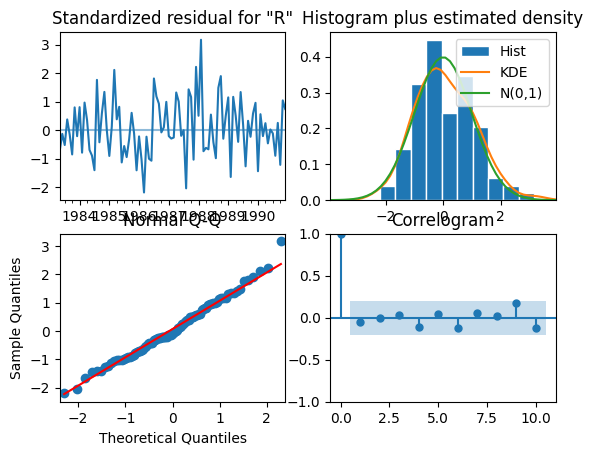

In [242]:
results_auto_SARIMA.plot_diagnostics();

# Predict on the Test Set using this model and evaluate the model

In [243]:
data.head()

Rose  Sparkling  Year     Month
YearMonth                                   
1980-01-01  112.0       1686  1980   January
1980-02-01  118.0       1591  1980  February
1980-03-01  129.0       2304  1980     March
1980-04-01   99.0       1712  1980     April
1980-05-01  116.0       1471  1980       May

In [244]:
predicted_auto_SARIMA = results_auto_SARIMA.get_forecast(steps=len(test))
predicted_auto_SARIMA1= results_auto_SARIMA.get_forecast(steps=len(test))

In [245]:
print(data.index)

DatetimeIndex(['1980-01-01', '1980-02-01', '1980-03-01', '1980-04-01',
               '1980-05-01', '1980-06-01', '1980-07-01', '1980-08-01',
               '1980-09-01', '1980-10-01',
               ...
               '1994-10-01', '1994-11-01', '1994-12-01', '1995-01-01',
               '1995-02-01', '1995-03-01', '1995-04-01', '1995-05-01',
               '1995-06-01', '1995-07-01'],
              dtype='datetime64[ns]', name='YearMonth', length=187, freq=None)


In [246]:
predicted_auto_SARIMA.summary_frame(alpha=0.05).head()

Rose             mean    mean_se  mean_ci_lower  mean_ci_upper
1991-01-01  55.237772  13.907011      27.980531      82.495013
1991-02-01  68.121912  13.990478      40.701080      95.542745
1991-03-01  67.909504  14.011530      40.447410      95.371599
1991-04-01  66.786231  14.098833      39.153026      94.419435
1991-05-01  69.761774  14.108191      42.110227      97.413321

In [247]:
predicted_auto_SARIMA1

In [248]:
rmse = mean_squared_error(test['Rose'], predicted_auto_SARIMA.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(test['Rose'], predicted_auto_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 18.930628404918025 
MAPE: 35.552917098330724


In [249]:
temp_resultsDf = pd.DataFrame({'Test RMSE Rose': rmse,'Test MAPE Rose':mape}
                           ,index=['SARIMA(3, 1, 1)(3, 0, 2, 12)'])


resultsDf = pd.concat([resultsR0,temp_resultsDf])

resultsDf

Test RMSE Rose  Test MAPE Rose
ARIMA(2,1,3)                       35.959888       72.663433
ARIMA(2,1,2)                       36.011582       72.859733
SARIMA(3, 1, 1)(3, 0, 2, 12)       18.930628       35.552917

In [250]:
resultsR0 = resultsDf.copy()
resultsR0

Test RMSE Rose  Test MAPE Rose
ARIMA(2,1,3)                       35.959888       72.663433
ARIMA(2,1,2)                       36.011582       72.859733
SARIMA(3, 1, 1)(3, 0, 2, 12)       18.930628       35.552917

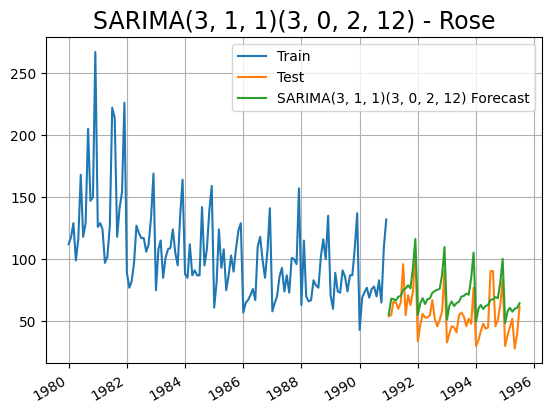

In [251]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
# plt.plot(predicted_auto_SARIMA,label='SARIMA(3, 1, 1)(3, 0, 2, 12)')
# predicted_auto_SARIMA.plot(label='SARIMA(3, 1, 1)(3, 0, 2, 12)')
predicted_auto_SARIMA.predicted_mean.plot(label='SARIMA(3, 1, 1)(3, 0, 2, 12) Forecast')


plt.legend(loc='best')
plt.grid()
plt.title('SARIMA(3, 1, 1)(3, 0, 2, 12) - Rose', fontsize=17);

# Build a version of the SARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots. - Seasonality at 12

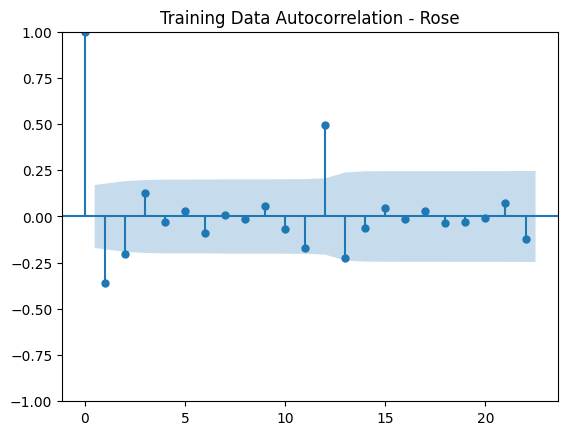

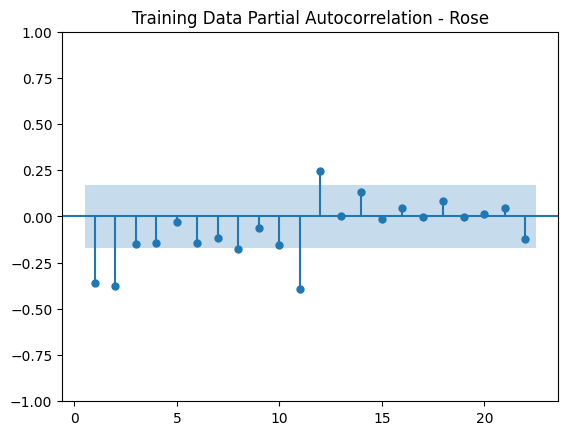

In [252]:
plot_acf(train['Rose'].diff(),title='Training Data Autocorrelation - Rose',missing='drop')
plot_pacf(train['Rose'].diff().dropna(),title='Training Data Partial Autocorrelation - Rose',zero=False,method='ywmle');


In [253]:
import statsmodels.api as sm

manual_SARIMA = sm.tsa.statespace.SARIMAX(train['Rose'],
                                order=(2,1,2),
                                seasonal_order=(2, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA.summary())

C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                               Rose   No. Observations:                  132
Model:             SARIMAX(2, 1, 2)x(2, 1, 2, 12)   Log Likelihood                -379.498
Date:                            Sun, 14 Jan 2024   AIC                            776.996
Time:                                    17:10:01   BIC                            799.692
Sample:                                01-01-1980   HQIC                           786.156
                                     - 12-01-1990                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8549      0.146     -5.838      0.000      -1.142      -0.568
ar.L2         -0.0020      0.125   

In [254]:
import statsmodels.api as sm

manual_SARIMA = sm.tsa.statespace.SARIMAX(train['Rose'],
                                order=(2,1,2),
                                seasonal_order=(3, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA1 = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA1.summary())

C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                               Rose   No. Observations:                  132
Model:             SARIMAX(2, 1, 2)x(3, 1, 2, 12)   Log Likelihood                -334.893
Date:                            Sun, 14 Jan 2024   AIC                            689.786
Time:                                    17:10:09   BIC                            713.730
Sample:                                01-01-1980   HQIC                           699.392
                                     - 12-01-1990                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7083      0.404      1.755      0.079      -0.083       1.499
ar.L2         -0.1502      0.176   

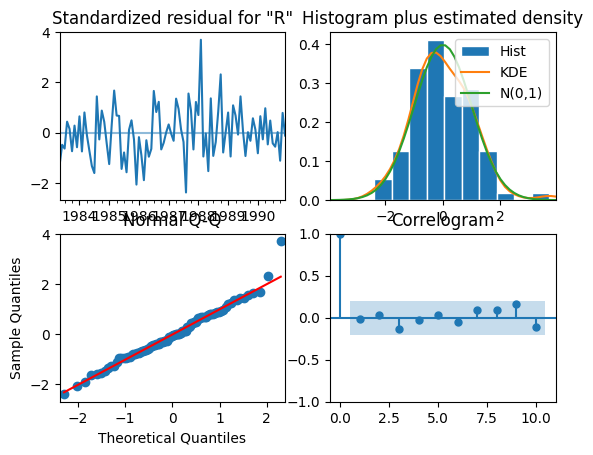

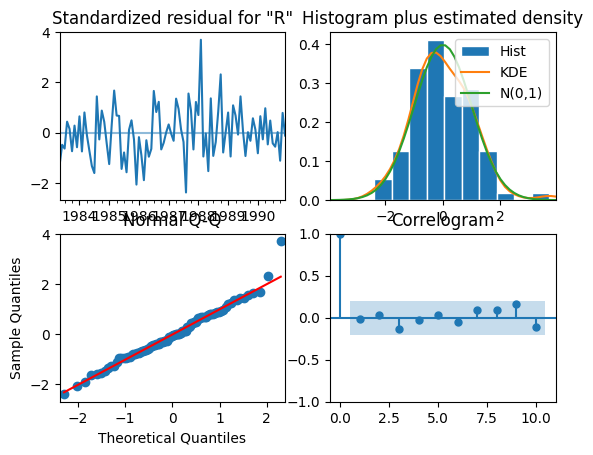

In [255]:
results_manual_SARIMA.plot_diagnostics()

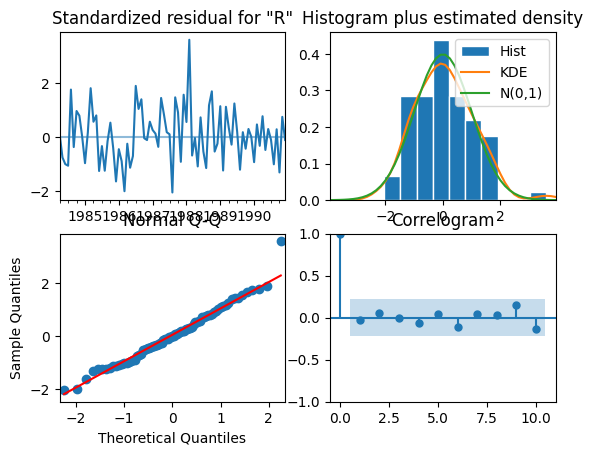

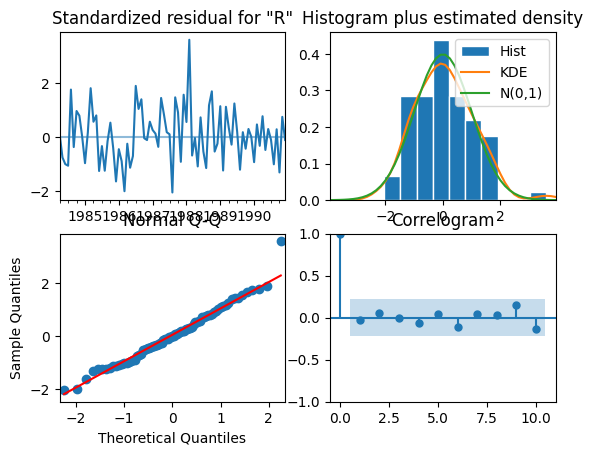

In [256]:
results_manual_SARIMA1.plot_diagnostics()

### Predict on the Test Set using this model and evaluate the model

In [257]:
predicted_manual_SARIMA = results_manual_SARIMA.get_forecast(steps=len(test['Rose']))
                                                             
predicted_manual_SARIMA1 = results_manual_SARIMA1.get_forecast(steps=len(test['Rose']))

In [258]:
rmse = mean_squared_error(test['Rose'],predicted_manual_SARIMA.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(test['Rose'],predicted_manual_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 17.13188686514224 
MAPE: 25.305475960918844


In [259]:
rmse = mean_squared_error(test['Rose'],predicted_manual_SARIMA1.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(test['Rose'],predicted_manual_SARIMA1.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 16.122737552030227 
MAPE: 22.954052187708605


In [260]:
temp_resultsDf = pd.DataFrame({'Test RMSE Rose': [rmse],'Test MAPE Rose':mape}
                           ,index=['SARIMA(2,1,2)(2,1,2,12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf
# temp_resultsDf

Test RMSE Rose  Test MAPE Rose
ARIMA(2,1,3)                       35.959888       72.663433
ARIMA(2,1,2)                       36.011582       72.859733
SARIMA(3, 1, 1)(3, 0, 2, 12)       18.930628       35.552917
SARIMA(2,1,2)(2,1,2,12)            16.122738       22.954052

In [261]:
resultsR0 = resultsDf.copy()

Text(0.5, 1.0, 'SARIMA (2, 1, 2) (2, 1, 2, 12) Forecast - ROSE')

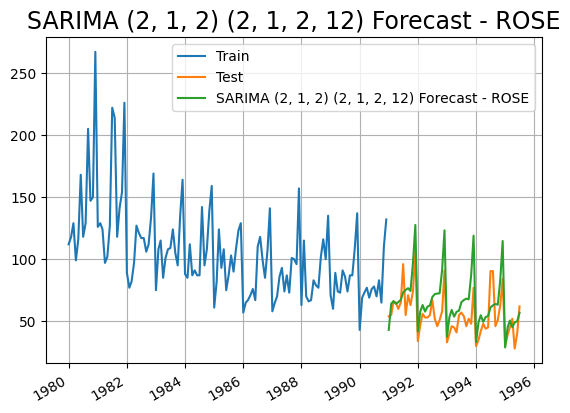

In [262]:
plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label ='Test')

predicted_manual_SARIMA.predicted_mean.plot(label = 'SARIMA (2, 1, 2) (2, 1, 2, 12) Forecast - ROSE')
plt.grid()
plt.legend(loc='best')
plt.title('SARIMA (2, 1, 2) (2, 1, 2, 12) Forecast - ROSE', fontsize=17)

Text(0.5, 1.0, 'SARIMA (2, 1, 2) (3, 1, 2, 12) Forecast - ROSE')

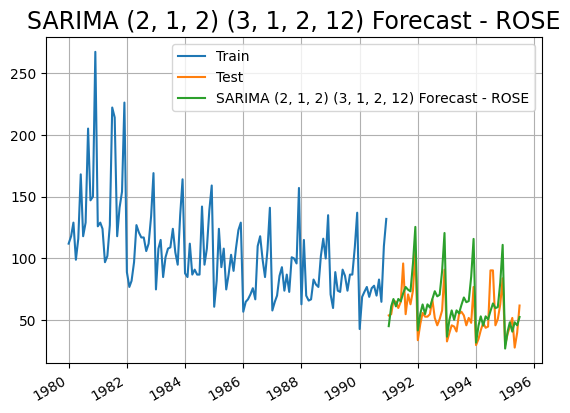

In [263]:
plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label ='Test')

predicted_manual_SARIMA1.predicted_mean.plot(label = 'SARIMA (2, 1, 2) (3, 1, 2, 12) Forecast - ROSE')
plt.grid()
plt.legend(loc='best')
plt.title('SARIMA (2, 1, 2) (3, 1, 2, 12) Forecast - ROSE', fontsize=17)

# Building the most optimum model on the Full Data

In [264]:
full_data_model = sm.tsa.statespace.SARIMAX(data['Rose'],
                                order=(2,1,2),
                                seasonal_order=(2,1,2,12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                               Rose   No. Observations:                  187
Model:             SARIMAX(2, 1, 2)x(2, 1, 2, 12)   Log Likelihood                -594.946
Date:                            Sun, 14 Jan 2024   AIC                           1207.893
Time:                                    17:10:21   BIC                           1234.807
Sample:                                01-01-1980   HQIC                          1218.828
                                     - 07-01-1995                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8156      0.102     -8.012      0.000      -1.015      -0.616
ar.L2          0.0765      0.089   

# Evaluate the model on the whole data and predict 12 months into the future

In [265]:
predicted_manual_SARIMA_full_data = results_full_data_model.get_forecast(steps=12)

In [266]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_full_data.summary_frame(alpha=0.05)
pred_full_manual_SARIMA_date.head()

Rose             mean    mean_se  mean_ci_lower  mean_ci_upper
1995-08-01  59.169937  13.307246      33.088214      85.251661
1995-09-01  45.583748  13.722550      18.688044      72.479451
1995-10-01  45.561411  13.726926      18.657131      72.465692
1995-11-01  59.929724  13.877263      32.730789      87.128659
1995-12-01  85.530213  13.884090      58.317898     112.742529

In [267]:
rmse = mean_squared_error(data['Rose'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 36.061644097291705


Text(0.5, 1.0, 'SARIMA(2,1,2)(2,1,2,12) Forecast Next 12 Months - Rose')

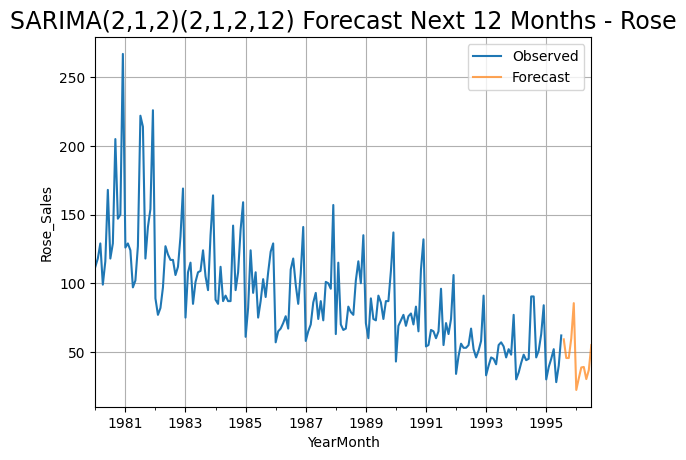

In [268]:
axis = data['Rose'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)

axis.set_xlabel('YearMonth')
axis.set_ylabel('Rose_Sales')
plt.legend(loc='best')
plt.grid();
plt.title('SARIMA(2,1,2)(2,1,2,12) Forecast Next 12 Months - Rose', fontsize=17)

In [269]:
resultsDf

Test RMSE Rose  Test MAPE Rose
ARIMA(2,1,3)                       35.959888       72.663433
ARIMA(2,1,2)                       36.011582       72.859733
SARIMA(3, 1, 1)(3, 0, 2, 12)       18.930628       35.552917
SARIMA(2,1,2)(2,1,2,12)            16.122738       22.954052

In [270]:
resultsR0 = resultsDf.copy()

In [271]:
results_rose = pd.concat([resultsDf14, resultsR0], axis=0)
results_rose

Test RMSE Rose   
RegressionOnTime                                         16.979414  \
NaiveModel                                               78.396083   
SimpleAverageModel                                       52.318735   
2pointTrailingMovingAverage                              12.298291   
4pointTrailingMovingAverage                              15.845558   
6pointTrailingMovingAverage                              15.986163   
9pointTrailingMovingAverage                              16.500823   
Simple Exponential Smoothing                             35.936195   
Double Exponential Smoothing                             16.980564   
Triple Exponential Smoothing (Additive Season)           15.534165   
Triple Exponential Smoothing (Multiplicative Se...       18.775066   
Triple Exponential Smoothing (Additive Season, ...       25.263255   
Triple Exponential Smoothing (Multiplicative Se...       25.088023   
ARIMA(2,1,3)                                             35.959888   
ARIMA(2,1,2)                                             36.011582   
SARIMA(3, 1, 1)(3, 0, 2, 12)                             18.930628   
SARIMA(2,1,2)(2,1,2,12)                                  16.122738   

                                                    Test RMSE Sparkling   
RegressionOnTime                                            1389.135175  \
NaiveModel                                                  3864.279352   
SimpleAverageModel                                          1275.081804   
2pointTrailingMovingAverage                                  813.400684   
4pointTrailingMovingAverage                                 1156.589694   
6pointTrailingMovingAverage                                 1283.927428   
9pointTrailingMovingAverage                                 1346.278315   
Simple Exponential Smoothing                                1338.004623   
Double Exponential Smoothing                                5291.879833   
Triple Exponential Smoothing (Additive Season)               378.626241   
Triple Exponential Smoothing (Multiplicative Se...           403.706228   
Triple Exponential Smoothing (Additive Season, ...           378.626241   
Triple Exponential Smoothing (Multiplicative Se...           352.450966   
ARIMA(2,1,3)                                                        NaN   
ARIMA(2,1,2)                                                        NaN   
SARIMA(3, 1, 1)(3, 0, 2, 12)                                        NaN   
SARIMA(2,1,2)(2,1,2,12)                                             NaN   

                                                    Test MAPE Rose  
RegressionOnTime                                               NaN  
NaiveModel                                                     NaN  
SimpleAverageModel                                             NaN  
2pointTrailingMovingAverage                                    NaN  
4pointTrailingMovingAverage                                    NaN  
6pointTrailingMovingAverage                                    NaN  
9pointTrailingMovingAverage                                    NaN  
Simple Exponential Smoothing                                   NaN  
Double Exponential Smoothing                                   NaN  
Triple Exponential Smoothing (Additive Season)                 NaN  
Triple Exponential Smoothing (Multiplicative Se...             NaN  
Triple Exponential Smoothing (Additive Season, ...             NaN  
Triple Exponential Smoothing (Multiplicative Se...             NaN  
ARIMA(2,1,3)                                             72.663433  
ARIMA(2,1,2)                                             72.859733  
SARIMA(3, 1, 1)(3, 0, 2, 12)                             35.552917  
SARIMA(2,1,2)(2,1,2,12)                                  22.954052

# ARIMA and SARIMA Modelling 

#### Check for stationarity of the Training Data - Sparkling 

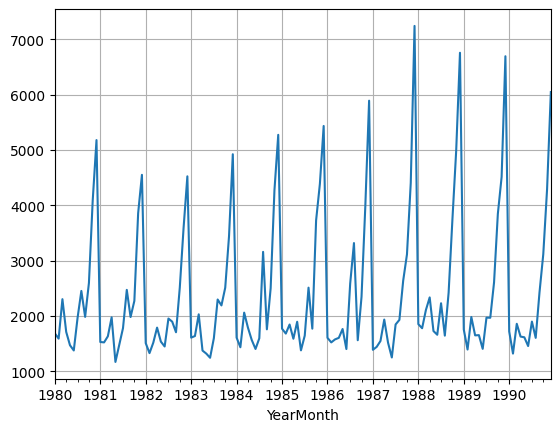

In [272]:
train['Sparkling'].plot(grid=True);

In [273]:
dftest = adfuller(train['Sparkling'],regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -2.062
DF test p-value is 0.5674110388593717
Number of lags used 12


In [274]:
dftest = adfuller(train['Sparkling'].diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -7.968
DF test p-value is 8.479210655514579e-11
Number of lags used 11


Text(0.5, 1.0, 'Sparkling Train Stationary Time Series with lag 1')

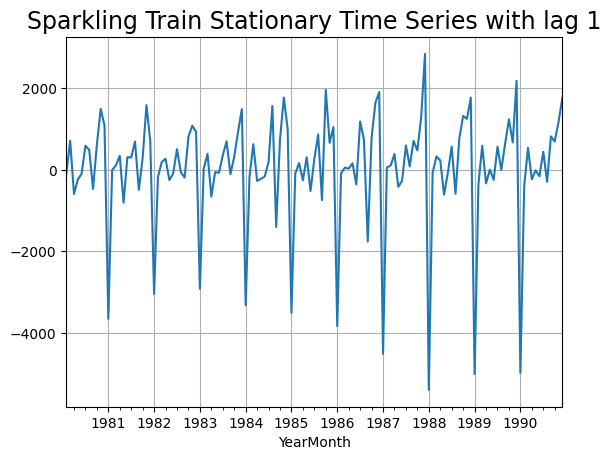

In [275]:
train['Sparkling'].diff().dropna().plot(grid=True);
plt.title('Sparkling Train Stationary Time Series with lag 1', fontsize=17)

In [276]:
train['Sparkling'].info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 132 entries, 1980-01-01 to 1990-12-01
Series name: Sparkling
Non-Null Count  Dtype
--------------  -----
132 non-null    int64
dtypes: int64(1)
memory usage: 2.1 KB


Build an Automated version of an ARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC) - SPARKLING

In [277]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 4)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Examples of the parameter combinations for the Model')
for i in range(0,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Examples of the parameter combinations for the Model
Model: (0, 1, 0)
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [278]:
SPARK_ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
SPARK_ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [279]:
from statsmodels.tsa.arima.model import ARIMA

# Creating an empty DataFrame with column names only
SPARK_ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])

# Loop through the parameter combinations
for param in pdq:
    try:
        # Fit ARIMA model
        ARIMA_model = ARIMA(train['Sparkling'].values, order=param).fit()

        # Print AIC values
        print('ARIMA{} - AIC:{}'.format(param, ARIMA_model.aic))

        # Append results to the DataFrame
        SPARK_ARIMA_AIC = SPARK_ARIMA_AIC.append({'param': param, 'AIC': ARIMA_model.aic}, ignore_index=True)

    except Exception as e:
        continue

# Convert 'AIC' column to numeric
SPARK_ARIMA_AIC['AIC'] = pd.to_numeric(SPARK_ARIMA_AIC['AIC'], errors='coerce')

# Check if the DataFrame is not empty
if not SPARK_ARIMA_AIC.empty:
    # Find the parameters with the lowest AIC
    best_params = SPARK_ARIMA_AIC.loc[SPARK_ARIMA_AIC['AIC'].idxmin()]

    # Display the best parameters
    print("Best Parameters (p, d, q):", best_params['param'])
    print("Best AIC:", best_params['AIC'])
else:
    print("DataFrame is empty. Check if AIC values are calculated correctly.")


ARIMA(0, 1, 0) - AIC:2267.6630357855465
ARIMA(0, 1, 1) - AIC:2263.0600155919765
ARIMA(0, 1, 2) - AIC:2234.408323125097
ARIMA(0, 1, 3) - AIC:2233.9948577544765
ARIMA(1, 1, 0) - AIC:2266.6085393190097
ARIMA(1, 1, 1) - AIC:2235.7550946605334


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(1, 1, 2) - AIC:2234.5272004520675
ARIMA(1, 1, 3) - AIC:2235.607812285269
ARIMA(2, 1, 0) - AIC:2260.36574396809
ARIMA(2, 1, 1) - AIC:2233.7776262639018
ARIMA(2, 1, 2) - AIC:2213.509212375905


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 3) - AIC:2232.943689424644
ARIMA(3, 1, 0) - AIC:2257.72337899794
ARIMA(3, 1, 1) - AIC:2235.4989288389197
ARIMA(3, 1, 2) - AIC:2230.802737810126
ARIMA(3, 1, 3) - AIC:2221.452961378608
DataFrame is empty. Check if AIC values are calculated correctly.


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [280]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

SPARK_ARIMA_AIC.sort_values(by='AIC',ascending=True).head()

Empty DataFrame
Columns: [param, AIC]
Index: []

In [281]:
auto_ARIMA = ARIMA(train['Sparkling'], order=(2,1,2))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1101.755
Date:                Sun, 14 Jan 2024   AIC                           2213.509
Time:                        17:10:32   BIC                           2227.885
Sample:                    01-01-1980   HQIC                          2219.351
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3121      0.046     28.781      0.000       1.223       1.401
ar.L2         -0.5593      0.072     -7.740      0.000      -0.701      -0.418
ma.L1         -1.9917      0.109    -18.217      0.0

C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Diagnostics Plot- Sparkling

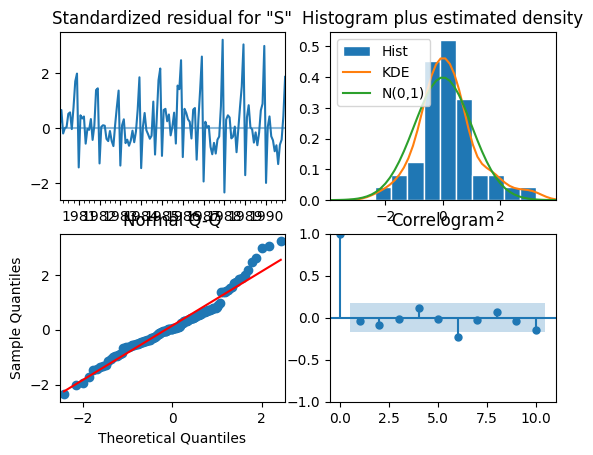

In [282]:
results_auto_ARIMA.plot_diagnostics();

### Predict on the Test Set using this model and evaluate the model

In [283]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [284]:
## Mean Absolute Percentage Error (MAPE) - Function Definition

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100
from sklearn.metrics import mean_squared_error

In [285]:
rmse = mean_squared_error(test['Sparkling'],predicted_auto_ARIMA,squared=False)
mape = mean_absolute_percentage_error(test['Sparkling'],predicted_auto_ARIMA)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 1299.980107147282 
MAPE: 47.100014181763235


In [286]:
resultsDf = pd.DataFrame({'RMSE': rmse,'MAPE':mape}
                           ,index=['ARIMA(2,1,2)'])
resultsDf

RMSE       MAPE
ARIMA(2,1,2)  1299.980107  47.100014

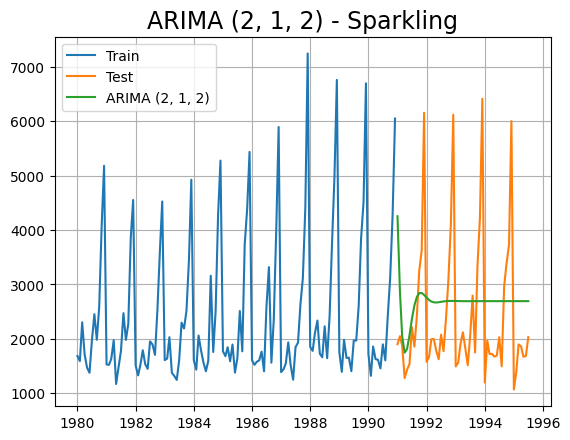

In [287]:
plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(predicted_auto_ARIMA, label='ARIMA (2, 1, 2)')

plt.title('ARIMA (2, 1, 2) - Sparkling', fontsize=17)
plt.grid()
plt.legend(loc='best')

ACF and PACF plot for Sparkling

Text(0.5, 1.0, 'Sparkling Training Data Autocorrelation')

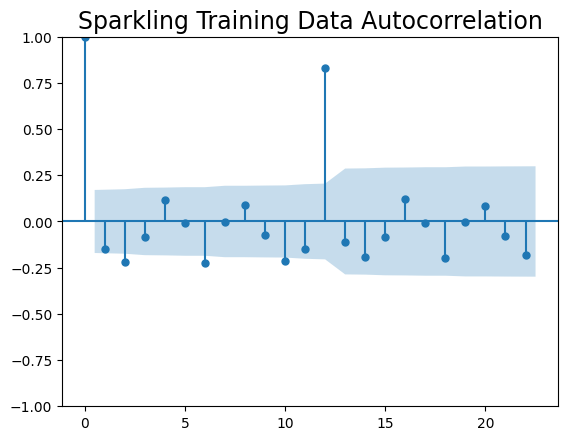

In [288]:
plot_acf(train['Sparkling'].diff(),missing='drop')
plt.title('Sparkling Training Data Autocorrelation', fontsize=17)

Text(0.5, 1.0, 'Sparkling Training Data Partial Autocorrelation')

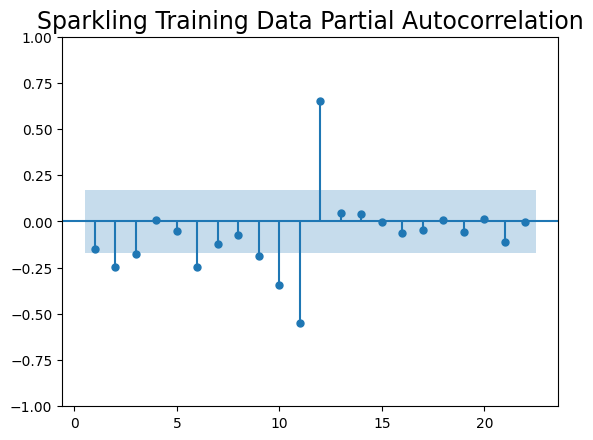

In [289]:
plot_pacf(train['Sparkling'].diff().dropna(),title='Training Data Partial Autocorrelation',zero=False,method='ywmle')
plt.title('Sparkling Training Data Partial Autocorrelation', fontsize=17)

In [290]:
manual_ARIMA = ARIMA(train['Sparkling'], order=(0,1,0))

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -1132.832
Date:                Sun, 14 Jan 2024   AIC                           2267.663
Time:                        17:10:40   BIC                           2270.538
Sample:                    01-01-1980   HQIC                          2268.831
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.885e+06   1.29e+05     14.658      0.000    1.63e+06    2.14e+06
Ljung-Box (L1) (Q):                   3.07   Jarque-Bera (JB):               198.83
Prob(Q):                              0.08   Pr

C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


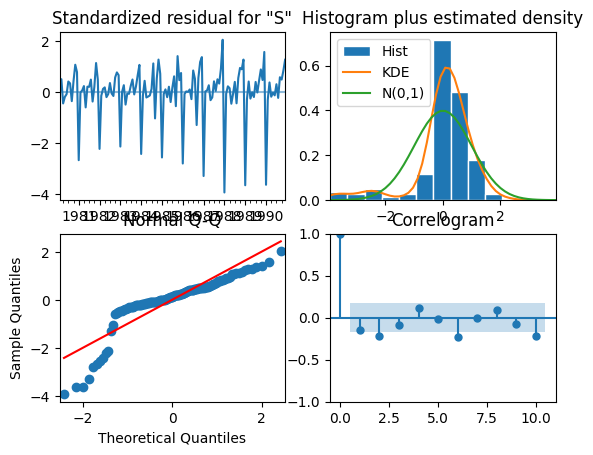

In [291]:
results_manual_ARIMA.plot_diagnostics();

### Predict on the Test Set using this model and evaluate the model

In [292]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [293]:
rmse = mean_squared_error(test['Sparkling'],predicted_manual_ARIMA,squared=False)
mape = mean_absolute_percentage_error(test['Sparkling'],predicted_manual_ARIMA)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 3864.2793518443914 
MAPE: 201.3276495035274


In [294]:
temp_resultsDf = pd.DataFrame({'RMSE': rmse,'MAPE':mape}
                           ,index=['ARIMA(0,1,0)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

RMSE        MAPE
ARIMA(2,1,2)  1299.980107   47.100014
ARIMA(0,1,0)  3864.279352  201.327650

Text(0.5, 1.0, 'ARIMA (0, 1, 0) Forecast- Sparkling')

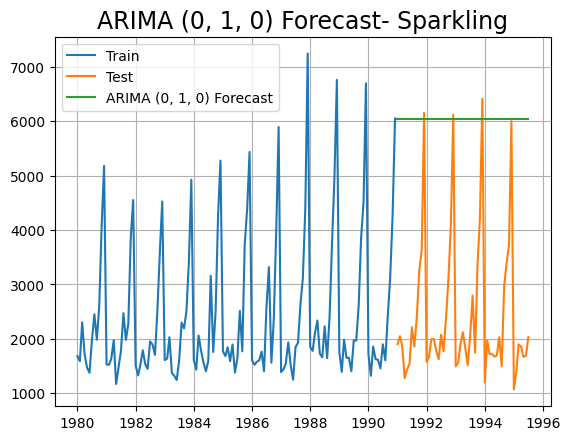

In [295]:
plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(predicted_manual_ARIMA, label='ARIMA (0, 1, 0) Forecast')

plt.grid()
plt.legend(loc='best')
plt.title('ARIMA (0, 1, 0) Forecast- Sparkling', fontsize=17)

Build an Automated version of a SARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC) - SPARKLING

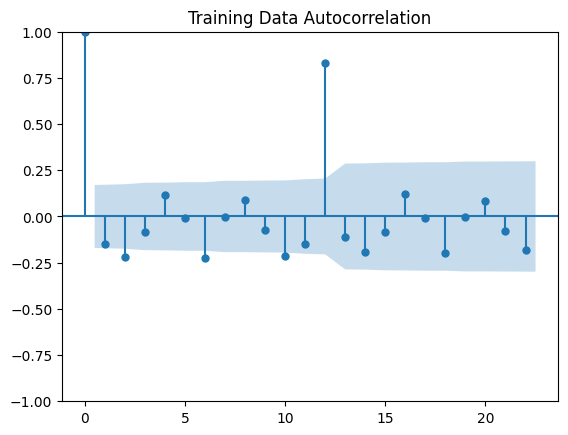

In [296]:
plot_acf(train['Sparkling'].diff(),title='Training Data Autocorrelation',missing='drop');

In [297]:
import itertools
p = q = range(0, 4)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
PDQ = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of the parameter combinations for the Model are')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], PDQ[i]))

Examples of the parameter combinations for the Model are
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (0, 1, 3)(0, 0, 3, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (1, 1, 3)(1, 0, 3, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)
Model: (2, 1, 3)(2, 0, 3, 12)
Model: (3, 1, 0)(3, 0, 0, 12)
Model: (3, 1, 1)(3, 0, 1, 12)
Model: (3, 1, 2)(3, 0, 2, 12)
Model: (3, 1, 3)(3, 0, 3, 12)


In [298]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [299]:
# Creating an empty list to store results
SARIMA_AIC_results = []

for param in pdq:
    for param_seasonal in PDQ:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                                order=param,
                                                seasonal_order=param_seasonal,
                                                enforce_stationarity=False,
                                                enforce_invertibility=False)

        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))

        # Append to the list
        SARIMA_AIC_results.append({'param': param, 'seasonal': param_seasonal, 'AIC': results_SARIMA.aic})

# Convert the list to a DataFrame
SARIMA_AIC = pd.DataFrame(SARIMA_AIC_results)


SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1956.2614616844185
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:1723.1533640236946


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(0, 0, 3, 12) - AIC:3865.888476700508
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1837.4366022456677
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1806.9905301389604
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:1633.2108735791494


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(1, 0, 3, 12) - AIC:4224.331582719342
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:1648.3776153470858
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:1647.2054158613735
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:1630.9898053920767


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(2, 0, 3, 12) - AIC:3307.2201749315814
SARIMA(0, 1, 0)x(3, 0, 0, 12) - AIC:1467.4574095308406
SARIMA(0, 1, 0)x(3, 0, 1, 12) - AIC:1469.1871052625515
SARIMA(0, 1, 0)x(3, 0, 2, 12) - AIC:1471.0594530064645


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(3, 0, 3, 12) - AIC:3323.183460977532
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:2230.162907850583
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1923.7688649566373
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:1692.708957313088


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(0, 0, 3, 12) - AIC:3352.7884342715615
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1797.179588183827
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1738.0903193765641
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:1570.1509144533936


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(1, 0, 3, 12) - AIC:3258.8168979498423
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:1605.6751954175425
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:1599.2245085158108
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:1570.40188247047


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(2, 0, 3, 12) - AIC:3043.1275406289665
SARIMA(0, 1, 1)x(3, 0, 0, 12) - AIC:1428.4607679617193
SARIMA(0, 1, 1)x(3, 0, 1, 12) - AIC:1428.8727989692775
SARIMA(0, 1, 1)x(3, 0, 2, 12) - AIC:1429.5889286988381


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(3, 0, 3, 12) - AIC:3003.379331612552
SARIMA(0, 1, 2)x(0, 0, 0, 12) - AIC:2187.441010168705
SARIMA(0, 1, 2)x(0, 0, 1, 12) - AIC:1887.9128007201687
SARIMA(0, 1, 2)x(0, 0, 2, 12) - AIC:1659.8789890499363


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(0, 0, 3, 12) - AIC:3973.348004632486
SARIMA(0, 1, 2)x(1, 0, 0, 12) - AIC:1790.032633221214
SARIMA(0, 1, 2)x(1, 0, 1, 12) - AIC:1724.1675072296712
SARIMA(0, 1, 2)x(1, 0, 2, 12) - AIC:1557.1605068039194


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(1, 0, 3, 12) - AIC:3879.5916356890434
SARIMA(0, 1, 2)x(2, 0, 0, 12) - AIC:1603.9654774359617
SARIMA(0, 1, 2)x(2, 0, 1, 12) - AIC:1600.543515497304
SARIMA(0, 1, 2)x(2, 0, 2, 12) - AIC:1557.1215680776236


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(2, 0, 3, 12) - AIC:3657.700125284646
SARIMA(0, 1, 2)x(3, 0, 0, 12) - AIC:1428.5993407973947
SARIMA(0, 1, 2)x(3, 0, 1, 12) - AIC:1429.7448375095446
SARIMA(0, 1, 2)x(3, 0, 2, 12) - AIC:1430.6883884728638


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(3, 0, 3, 12) - AIC:3618.7572536707053
SARIMA(0, 1, 3)x(0, 0, 0, 12) - AIC:2168.0925408444946
SARIMA(0, 1, 3)x(0, 0, 1, 12) - AIC:1873.977069914547
SARIMA(0, 1, 3)x(0, 0, 2, 12) - AIC:1643.2973662452637


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(0, 0, 3, 12) - AIC:4260.701215520285
SARIMA(0, 1, 3)x(1, 0, 0, 12) - AIC:1792.0306078312449
SARIMA(0, 1, 3)x(1, 0, 1, 12) - AIC:1710.640407803388
SARIMA(0, 1, 3)x(1, 0, 2, 12) - AIC:1542.741897735574


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(1, 0, 3, 12) - AIC:2735.2160711562465
SARIMA(0, 1, 3)x(2, 0, 0, 12) - AIC:1604.571580819291
SARIMA(0, 1, 3)x(2, 0, 1, 12) - AIC:1601.067480899801
SARIMA(0, 1, 3)x(2, 0, 2, 12) - AIC:1543.048894704605


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(2, 0, 3, 12) - AIC:2703.3449174339025
SARIMA(0, 1, 3)x(3, 0, 0, 12) - AIC:1429.6529450652424
SARIMA(0, 1, 3)x(3, 0, 1, 12) - AIC:1441.1435176504342
SARIMA(0, 1, 3)x(3, 0, 2, 12) - AIC:1431.154476134043


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(3, 0, 3, 12) - AIC:2541.9640125242004
SARIMA(1, 1, 0)x(0, 0, 0, 12) - AIC:2250.3181267386713
SARIMA(1, 1, 0)x(0, 0, 1, 12) - AIC:1954.3938339904007
SARIMA(1, 1, 0)x(0, 0, 2, 12) - AIC:1721.2688476356016


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(0, 0, 3, 12) - AIC:3583.299648887619
SARIMA(1, 1, 0)x(1, 0, 0, 12) - AIC:1811.2440279330658
SARIMA(1, 1, 0)x(1, 0, 1, 12) - AIC:1788.534359477559
SARIMA(1, 1, 0)x(1, 0, 2, 12) - AIC:1616.4894402561654


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(1, 0, 3, 12) - AIC:3471.1708585478914
SARIMA(1, 1, 0)x(2, 0, 0, 12) - AIC:1621.6355080128674
SARIMA(1, 1, 0)x(2, 0, 1, 12) - AIC:1617.1356132036362
SARIMA(1, 1, 0)x(2, 0, 2, 12) - AIC:1616.5412067494303


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(2, 0, 3, 12) - AIC:3223.560070149324
SARIMA(1, 1, 0)x(3, 0, 0, 12) - AIC:1440.5134640390056
SARIMA(1, 1, 0)x(3, 0, 1, 12) - AIC:1442.1719780317428
SARIMA(1, 1, 0)x(3, 0, 2, 12) - AIC:1443.7660393037734


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(3, 0, 3, 12) - AIC:3207.6123539836917
SARIMA(1, 1, 1)x(0, 0, 0, 12) - AIC:2204.9340491545654
SARIMA(1, 1, 1)x(0, 0, 1, 12) - AIC:1907.3558974125563
SARIMA(1, 1, 1)x(0, 0, 2, 12) - AIC:1678.0981352643491


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)x(0, 0, 3, 12) - AIC:3682.6585067981564
SARIMA(1, 1, 1)x(1, 0, 0, 12) - AIC:1775.1424466615126
SARIMA(1, 1, 1)x(1, 0, 1, 12) - AIC:1739.7167468196396
SARIMA(1, 1, 1)x(1, 0, 2, 12) - AIC:1571.324886353403
SARIMA(1, 1, 1)x(1, 0, 3, 12) - AIC:3316.9061625776358
SARIMA(1, 1, 1)x(2, 0, 0, 12) - AIC:1590.6161606816456
SARIMA(1, 1, 1)x(2, 0, 1, 12) - AIC:1586.314225872012
SARIMA(1, 1, 1)x(2, 0, 2, 12) - AIC:1571.8069968277105


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)x(2, 0, 3, 12) - AIC:3112.018065928011
SARIMA(1, 1, 1)x(3, 0, 0, 12) - AIC:1414.9112073897677
SARIMA(1, 1, 1)x(3, 0, 1, 12) - AIC:1415.950249023108
SARIMA(1, 1, 1)x(3, 0, 2, 12) - AIC:1416.7323624931173


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)x(3, 0, 3, 12) - AIC:3059.4877986299107
SARIMA(1, 1, 2)x(0, 0, 0, 12) - AIC:2188.4633450504953
SARIMA(1, 1, 2)x(0, 0, 1, 12) - AIC:1889.7708307498895
SARIMA(1, 1, 2)x(0, 0, 2, 12) - AIC:1659.629142143998


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(0, 0, 3, 12) - AIC:4214.465076560581
SARIMA(1, 1, 2)x(1, 0, 0, 12) - AIC:1771.8259799151888
SARIMA(1, 1, 2)x(1, 0, 1, 12) - AIC:1723.9952183208427
SARIMA(1, 1, 2)x(1, 0, 2, 12) - AIC:1555.5842468602796


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(1, 0, 3, 12) - AIC:4122.436460613963
SARIMA(1, 1, 2)x(2, 0, 0, 12) - AIC:1588.4227862792002
SARIMA(1, 1, 2)x(2, 0, 1, 12) - AIC:1585.52508216436
SARIMA(1, 1, 2)x(2, 0, 2, 12) - AIC:1555.9345638336113


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(2, 0, 3, 12) - AIC:3908.3857428644515
SARIMA(1, 1, 2)x(3, 0, 0, 12) - AIC:1413.8102397927528
SARIMA(1, 1, 2)x(3, 0, 1, 12) - AIC:1414.9146991762793
SARIMA(1, 1, 2)x(3, 0, 2, 12) - AIC:1415.9662813525583


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(3, 0, 3, 12) - AIC:3862.3724076254716
SARIMA(1, 1, 3)x(0, 0, 0, 12) - AIC:2171.026403977483
SARIMA(1, 1, 3)x(0, 0, 1, 12) - AIC:1869.9381452501802
SARIMA(1, 1, 3)x(0, 0, 2, 12) - AIC:1646.5176705275055


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(0, 0, 3, 12) - AIC:3229.922481190835
SARIMA(1, 1, 3)x(1, 0, 0, 12) - AIC:1772.392160229241
SARIMA(1, 1, 3)x(1, 0, 1, 12) - AIC:1711.9554888707635
SARIMA(1, 1, 3)x(1, 0, 2, 12) - AIC:1542.5053480593829


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(1, 0, 3, 12) - AIC:3269.286315182822
SARIMA(1, 1, 3)x(2, 0, 0, 12) - AIC:1590.4161825737783
SARIMA(1, 1, 3)x(2, 0, 1, 12) - AIC:1587.3668997599964
SARIMA(1, 1, 3)x(2, 0, 2, 12) - AIC:1543.244922876534


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(2, 0, 3, 12) - AIC:2957.6723797159125
SARIMA(1, 1, 3)x(3, 0, 0, 12) - AIC:1415.772333128356
SARIMA(1, 1, 3)x(3, 0, 1, 12) - AIC:1416.750968757606
SARIMA(1, 1, 3)x(3, 0, 2, 12) - AIC:1417.7649191988157


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(3, 0, 3, 12) - AIC:2996.171445704777
SARIMA(2, 1, 0)x(0, 0, 0, 12) - AIC:2227.302761872421
SARIMA(2, 1, 0)x(0, 0, 1, 12) - AIC:1946.43834354069
SARIMA(2, 1, 0)x(0, 0, 2, 12) - AIC:1711.4123039836445


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)x(0, 0, 3, 12) - AIC:3746.980855060492
SARIMA(2, 1, 0)x(1, 0, 0, 12) - AIC:1780.7646066055527
SARIMA(2, 1, 0)x(1, 0, 1, 12) - AIC:1756.935734746905
SARIMA(2, 1, 0)x(1, 0, 2, 12) - AIC:1600.9702203750046


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)x(1, 0, 3, 12) - AIC:4025.1119079095624
SARIMA(2, 1, 0)x(2, 0, 0, 12) - AIC:1592.2403464878537
SARIMA(2, 1, 0)x(2, 0, 1, 12) - AIC:1587.6344987011234
SARIMA(2, 1, 0)x(2, 0, 2, 12) - AIC:1585.9191732979777


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)x(2, 0, 3, 12) - AIC:3957.1268643460985
SARIMA(2, 1, 0)x(3, 0, 0, 12) - AIC:1411.9449728031473
SARIMA(2, 1, 0)x(3, 0, 1, 12) - AIC:1413.1017620249202
SARIMA(2, 1, 0)x(3, 0, 2, 12) - AIC:1414.19756440053


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)x(3, 0, 3, 12) - AIC:2654.69126669051
SARIMA(2, 1, 1)x(0, 0, 0, 12) - AIC:2199.8586131456104
SARIMA(2, 1, 1)x(0, 0, 1, 12) - AIC:1905.020949595253
SARIMA(2, 1, 1)x(0, 0, 2, 12) - AIC:1675.423408033378


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(0, 0, 3, 12) - AIC:3457.636350760472
SARIMA(2, 1, 1)x(1, 0, 0, 12) - AIC:1792.8234294726487
SARIMA(2, 1, 1)x(1, 0, 1, 12) - AIC:1740.091126397228
SARIMA(2, 1, 1)x(1, 0, 2, 12) - AIC:1571.9888300771954


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(1, 0, 3, 12) - AIC:3399.248771921436
SARIMA(2, 1, 1)x(2, 0, 0, 12) - AIC:1577.1235061142581
SARIMA(2, 1, 1)x(2, 0, 1, 12) - AIC:1573.1595850565134
SARIMA(2, 1, 1)x(2, 0, 2, 12) - AIC:1572.3428776291653


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(2, 0, 3, 12) - AIC:3402.1045323979183
SARIMA(2, 1, 1)x(3, 0, 0, 12) - AIC:1402.4673329786006
SARIMA(2, 1, 1)x(3, 0, 1, 12) - AIC:1403.122130618866
SARIMA(2, 1, 1)x(3, 0, 2, 12) - AIC:1403.5824472865725
SARIMA(2, 1, 1)x(3, 0, 3, 12) - AIC:3369.0414612739755
SARIMA(2, 1, 2)x(0, 0, 0, 12) - AIC:2176.868114649798
SARIMA(2, 1, 2)x(0, 0, 1, 12) - AIC:1892.2372628149456
SARIMA(2, 1, 2)x(0, 0, 2, 12) - AIC:1661.5523440135817


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(0, 0, 3, 12) - AIC:3516.387231263527
SARIMA(2, 1, 2)x(1, 0, 0, 12) - AIC:1757.214093129099
SARIMA(2, 1, 2)x(1, 0, 1, 12) - AIC:1725.3955638456819
SARIMA(2, 1, 2)x(1, 0, 2, 12) - AIC:1557.3404019160616


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(1, 0, 3, 12) - AIC:3399.3020291691205
SARIMA(2, 1, 2)x(2, 0, 0, 12) - AIC:1625.2273617386304
SARIMA(2, 1, 2)x(2, 0, 1, 12) - AIC:1573.547601411035
SARIMA(2, 1, 2)x(2, 0, 2, 12) - AIC:1560.4773273627475


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(2, 0, 3, 12) - AIC:3175.058777435266
SARIMA(2, 1, 2)x(3, 0, 0, 12) - AIC:1401.437614135593
SARIMA(2, 1, 2)x(3, 0, 1, 12) - AIC:1402.5040266165693
SARIMA(2, 1, 2)x(3, 0, 2, 12) - AIC:1403.4358963963962


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(3, 0, 3, 12) - AIC:3213.2531434197235
SARIMA(2, 1, 3)x(0, 0, 0, 12) - AIC:2171.039588798818
SARIMA(2, 1, 3)x(0, 0, 1, 12) - AIC:1865.0573513678362
SARIMA(2, 1, 3)x(0, 0, 2, 12) - AIC:1646.7072788564562
SARIMA(2, 1, 3)x(0, 0, 3, 12) - AIC:3649.2108904142433
SARIMA(2, 1, 3)x(1, 0, 0, 12) - AIC:1757.835136497249
SARIMA(2, 1, 3)x(1, 0, 1, 12) - AIC:1710.8433069494313
SARIMA(2, 1, 3)x(1, 0, 2, 12) - AIC:1541.0097390630074


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(1, 0, 3, 12) - AIC:3526.7993823165957
SARIMA(2, 1, 3)x(2, 0, 0, 12) - AIC:1577.6922400097974
SARIMA(2, 1, 3)x(2, 0, 1, 12) - AIC:1574.4512215073423
SARIMA(2, 1, 3)x(2, 0, 2, 12) - AIC:1544.0185697937268


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(2, 0, 3, 12) - AIC:3317.291301643946
SARIMA(2, 1, 3)x(3, 0, 0, 12) - AIC:1399.7898946601606
SARIMA(2, 1, 3)x(3, 0, 1, 12) - AIC:1400.1292759777095
SARIMA(2, 1, 3)x(3, 0, 2, 12) - AIC:1409.6222659255939
SARIMA(2, 1, 3)x(3, 0, 3, 12) - AIC:3301.0190641626928
SARIMA(3, 1, 0)x(0, 0, 0, 12) - AIC:2208.40250139061
SARIMA(3, 1, 0)x(0, 0, 1, 12) - AIC:1946.3686291419422
SARIMA(3, 1, 0)x(0, 0, 2, 12) - AIC:1709.5089923162177
SARIMA(3, 1, 0)x(0, 0, 3, 12) - AIC:3451.191384031682
SARIMA(3, 1, 0)x(1, 0, 0, 12) - AIC:1762.7961104703338
SARIMA(3, 1, 0)x(1, 0, 1, 12) - AIC:1740.3783835294557
SARIMA(3, 1, 0)x(1, 0, 2, 12) - AIC:1600.0471980105299


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 0)x(1, 0, 3, 12) - AIC:3027.7317398980845
SARIMA(3, 1, 0)x(2, 0, 0, 12) - AIC:1578.274802540514
SARIMA(3, 1, 0)x(2, 0, 1, 12) - AIC:1572.9330812608173
SARIMA(3, 1, 0)x(2, 0, 2, 12) - AIC:1571.680820254878
SARIMA(3, 1, 0)x(2, 0, 3, 12) - AIC:3452.127983211993
SARIMA(3, 1, 0)x(3, 0, 0, 12) - AIC:1396.8678620488686
SARIMA(3, 1, 0)x(3, 0, 1, 12) - AIC:1397.677470960259
SARIMA(3, 1, 0)x(3, 0, 2, 12) - AIC:1398.2798192216608


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 0)x(3, 0, 3, 12) - AIC:3226.749198621035
SARIMA(3, 1, 1)x(0, 0, 0, 12) - AIC:2188.222098338153
SARIMA(3, 1, 1)x(0, 0, 1, 12) - AIC:1906.9733080377919
SARIMA(3, 1, 1)x(0, 0, 2, 12) - AIC:1677.4234050701368
SARIMA(3, 1, 1)x(0, 0, 3, 12) - AIC:3723.8921497944157
SARIMA(3, 1, 1)x(1, 0, 0, 12) - AIC:1746.222252107585
SARIMA(3, 1, 1)x(1, 0, 1, 12) - AIC:1727.1009186707297
SARIMA(3, 1, 1)x(1, 0, 2, 12) - AIC:1573.684497774362


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(1, 0, 3, 12) - AIC:3401.2487482721253
SARIMA(3, 1, 1)x(2, 0, 0, 12) - AIC:1564.9377505379598
SARIMA(3, 1, 1)x(2, 0, 1, 12) - AIC:1576.2956636419071
SARIMA(3, 1, 1)x(2, 0, 2, 12) - AIC:1576.349814115044


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(2, 0, 3, 12) - AIC:3404.1034086394725
SARIMA(3, 1, 1)x(3, 0, 0, 12) - AIC:1387.7883313117627
SARIMA(3, 1, 1)x(3, 0, 1, 12) - AIC:1388.6814838501537
SARIMA(3, 1, 1)x(3, 0, 2, 12) - AIC:1389.1959572630258


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(3, 0, 3, 12) - AIC:2562.6181471535624
SARIMA(3, 1, 2)x(0, 0, 0, 12) - AIC:2187.3147271708795
SARIMA(3, 1, 2)x(0, 0, 1, 12) - AIC:1887.780427834462
SARIMA(3, 1, 2)x(0, 0, 2, 12) - AIC:1659.6255009923766
SARIMA(3, 1, 2)x(0, 0, 3, 12) - AIC:3680.1624336048912
SARIMA(3, 1, 2)x(1, 0, 0, 12) - AIC:1744.9635864954505
SARIMA(3, 1, 2)x(1, 0, 1, 12) - AIC:1727.5716110456194
SARIMA(3, 1, 2)x(1, 0, 2, 12) - AIC:1559.3373850072562


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(1, 0, 3, 12) - AIC:3104.052340295562
SARIMA(3, 1, 2)x(2, 0, 0, 12) - AIC:1566.9709256719043
SARIMA(3, 1, 2)x(2, 0, 1, 12) - AIC:1560.7894245154905
SARIMA(3, 1, 2)x(2, 0, 2, 12) - AIC:1559.8091499056773


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(2, 0, 3, 12) - AIC:3196.0388403626835
SARIMA(3, 1, 2)x(3, 0, 0, 12) - AIC:1410.5740741530274
SARIMA(3, 1, 2)x(3, 0, 1, 12) - AIC:1388.6026180514502
SARIMA(3, 1, 2)x(3, 0, 2, 12) - AIC:1389.701991985968


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(3, 0, 3, 12) - AIC:3321.536449371342
SARIMA(3, 1, 3)x(0, 0, 0, 12) - AIC:2155.774954204548
SARIMA(3, 1, 3)x(0, 0, 1, 12) - AIC:1863.9964794870857
SARIMA(3, 1, 3)x(0, 0, 2, 12) - AIC:1643.7830024410155


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(0, 0, 3, 12) - AIC:2111.8845799850983
SARIMA(3, 1, 3)x(1, 0, 0, 12) - AIC:1747.7106832460604
SARIMA(3, 1, 3)x(1, 0, 1, 12) - AIC:1709.2985518487953
SARIMA(3, 1, 3)x(1, 0, 2, 12) - AIC:1544.3935660831478


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(1, 0, 3, 12) - AIC:3525.839149456471
SARIMA(3, 1, 3)x(2, 0, 0, 12) - AIC:1565.9762861910756
SARIMA(3, 1, 3)x(2, 0, 1, 12) - AIC:1557.87340719766
SARIMA(3, 1, 3)x(2, 0, 2, 12) - AIC:1547.2415422166725
SARIMA(3, 1, 3)x(2, 0, 3, 12) - AIC:3100.1982809266756
SARIMA(3, 1, 3)x(3, 0, 0, 12) - AIC:1389.1421398322057
SARIMA(3, 1, 3)x(3, 0, 1, 12) - AIC:1393.1698541796302
SARIMA(3, 1, 3)x(3, 0, 2, 12) - AIC:1391.69260418258


C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(3, 0, 3, 12) - AIC:2711.881922158777


In [300]:
SARIMA_AIC.sort_values(by=['AIC']).head(40)

param       seasonal          AIC
220  (3, 1, 1)  (3, 0, 0, 12)  1387.788331
237  (3, 1, 2)  (3, 0, 1, 12)  1388.602618
221  (3, 1, 1)  (3, 0, 1, 12)  1388.681484
252  (3, 1, 3)  (3, 0, 0, 12)  1389.142140
222  (3, 1, 1)  (3, 0, 2, 12)  1389.195957
238  (3, 1, 2)  (3, 0, 2, 12)  1389.701992
254  (3, 1, 3)  (3, 0, 2, 12)  1391.692604
253  (3, 1, 3)  (3, 0, 1, 12)  1393.169854
204  (3, 1, 0)  (3, 0, 0, 12)  1396.867862
205  (3, 1, 0)  (3, 0, 1, 12)  1397.677471
206  (3, 1, 0)  (3, 0, 2, 12)  1398.279819
188  (2, 1, 3)  (3, 0, 0, 12)  1399.789895
189  (2, 1, 3)  (3, 0, 1, 12)  1400.129276
172  (2, 1, 2)  (3, 0, 0, 12)  1401.437614
156  (2, 1, 1)  (3, 0, 0, 12)  1402.467333
173  (2, 1, 2)  (3, 0, 1, 12)  1402.504027
157  (2, 1, 1)  (3, 0, 1, 12)  1403.122131
174  (2, 1, 2)  (3, 0, 2, 12)  1403.435896
158  (2, 1, 1)  (3, 0, 2, 12)  1403.582447
190  (2, 1, 3)  (3, 0, 2, 12)  1409.622266
236  (3, 1, 2)  (3, 0, 0, 12)  1410.574074
140  (2, 1, 0)  (3, 0, 0, 12)  1411.944973
141  (2, 1, 0)  (3, 0, 1, 12)  1413.101762
108  (1, 1, 2)  (3, 0, 0, 12)  1413.810240
142  (2, 1, 0)  (3, 0, 2, 12)  1414.197564
92   (1, 1, 1)  (3, 0, 0, 12)  1414.911207
109  (1, 1, 2)  (3, 0, 1, 12)  1414.914699
124  (1, 1, 3)  (3, 0, 0, 12)  1415.772333
93   (1, 1, 1)  (3, 0, 1, 12)  1415.950249
110  (1, 1, 2)  (3, 0, 2, 12)  1415.966281
94   (1, 1, 1)  (3, 0, 2, 12)  1416.732362
125  (1, 1, 3)  (3, 0, 1, 12)  1416.750969
126  (1, 1, 3)  (3, 0, 2, 12)  1417.764919
28   (0, 1, 1)  (3, 0, 0, 12)  1428.460768
44   (0, 1, 2)  (3, 0, 0, 12)  1428.599341
29   (0, 1, 1)  (3, 0, 1, 12)  1428.872799
30   (0, 1, 1)  (3, 0, 2, 12)  1429.588929
60   (0, 1, 3)  (3, 0, 0, 12)  1429.652945
45   (0, 1, 2)  (3, 0, 1, 12)  1429.744838
46   (0, 1, 2)  (3, 0, 2, 12)  1430.688388

In [301]:
import statsmodels.api as sm

auto_SARIMA = sm.tsa.statespace.SARIMAX(train['Sparkling'],
                                order=(3, 1, 1),
                                seasonal_order=(3, 0, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA.summary())

C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                      
Dep. Variable:                           Sparkling   No. Observations:                  132
Model:             SARIMAX(3, 1, 1)x(3, 0, [], 12)   Log Likelihood                -685.894
Date:                             Sun, 14 Jan 2024   AIC                           1387.788
Time:                                     17:16:41   BIC                           1407.963
Sample:                                 01-01-1980   HQIC                          1395.931
                                      - 12-01-1990                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1615      0.150      1.075      0.282      -0.133       0.456
ar.L2         -0.0928      

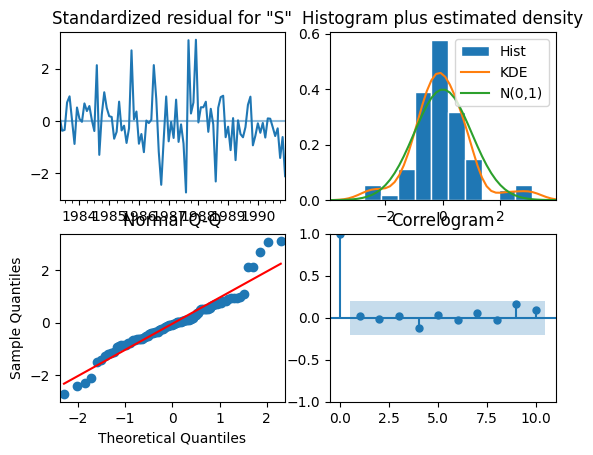

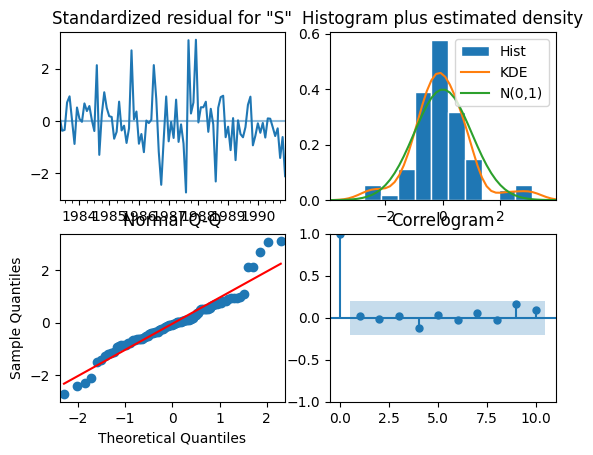

In [302]:
results_auto_SARIMA.plot_diagnostics()

#### Predict on the Test Set using this model and evaluate the model.

In [303]:
predicted_auto_SARIMA = results_auto_SARIMA.get_forecast(steps=len(test))

In [304]:
predicted_auto_SARIMA.summary_frame(alpha=0.05).head()

Sparkling          mean     mean_se  mean_ci_lower  mean_ci_upper
1991-01-01  1389.352007  415.861009     574.279407    2204.424607
1991-02-01  1224.649884  427.863894     386.052062    2063.247707
1991-03-01  1673.317682  428.008568     834.436302    2512.199061
1991-04-01  1533.300274  432.773221     685.080348    2381.520200
1991-05-01  1425.944913  435.887048     571.621997    2280.267829

In [305]:
rmse = mean_squared_error(test['Sparkling'],predicted_auto_SARIMA.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(test['Sparkling'],predicted_auto_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 601.2510537615699 
MAPE: 25.871055137484785


In [306]:
temp_resultsDf = pd.DataFrame({'RMSE': rmse,'MAPE':mape}
                           ,index=['SARIMA(3,1,1)(3,0,2,12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

RMSE        MAPE
ARIMA(2,1,2)             1299.980107   47.100014
ARIMA(0,1,0)             3864.279352  201.327650
SARIMA(3,1,1)(3,0,2,12)   601.251054   25.871055

Text(0.5, 1.0, 'SARIMA (3, 1, 1,) (3, 0, 0, 12) - Sparkling')

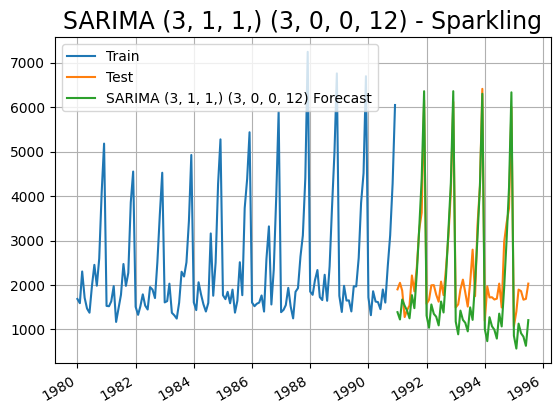

In [307]:
plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
# plt.plot(predicted_auto_SARIMA,label='SARIMA(3, 1, 1)(3, 0, 2, 12)')
# predicted_auto_SARIMA.plot(label='SARIMA(3, 1, 1)(3, 0, 2, 12)')
predicted_auto_SARIMA.predicted_mean.plot(label='SARIMA (3, 1, 1,) (3, 0, 0, 12) Forecast')


plt.legend(loc='best')
plt.grid()
plt.title('SARIMA (3, 1, 1,) (3, 0, 0, 12) - Sparkling', fontsize=17)

Build a version of the SARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots. - Seasonality at 12 - SPARKLING

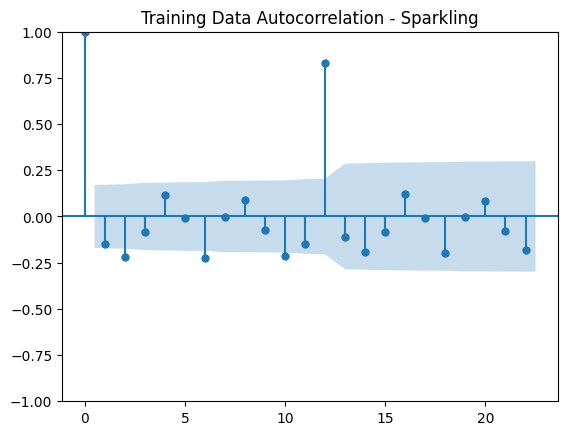

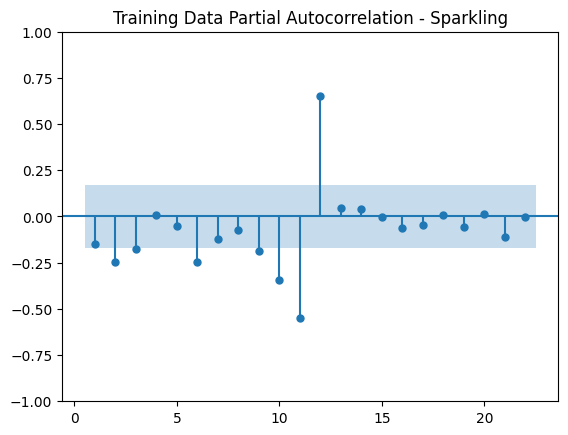

In [308]:
plot_acf(train['Sparkling'].diff(),title='Training Data Autocorrelation - Sparkling',missing='drop')
plot_pacf(train['Sparkling'].diff().dropna(),title='Training Data Partial Autocorrelation - Sparkling',zero=False,method='ywmle');


In [309]:
import statsmodels.api as sm

manual_SARIMA = sm.tsa.statespace.SARIMAX(train['Sparkling'],
                                order=(0,1,0),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA.summary())

                                      SARIMAX Results                                       
Dep. Variable:                            Sparkling   No. Observations:                  132
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 12)   Log Likelihood                -811.162
Date:                              Sun, 14 Jan 2024   AIC                           1628.324
Time:                                      17:24:25   BIC                           1636.315
Sample:                                  01-01-1980   HQIC                          1631.563
                                       - 12-01-1990                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.1482      0.223      0.664      0.507      -0.289       0.586
ma.S.L12      -0.57

C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [310]:
import statsmodels.api as sm

manual_SARIMA = sm.tsa.statespace.SARIMAX(train['Sparkling'],
                                order=(0,1,0),
                                seasonal_order=(2, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA1 = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA1.summary())

C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                        SARIMAX Results                                        
Dep. Variable:                               Sparkling   No. Observations:                  132
Model:             SARIMAX(0, 1, 0)x(2, 1, [1, 2], 12)   Log Likelihood                -722.996
Date:                                 Sun, 14 Jan 2024   AIC                           1455.991
Time:                                         17:24:26   BIC                           1468.708
Sample:                                     01-01-1980   HQIC                          1461.128
                                          - 12-01-1990                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.2445      0.879     -0.278      0.781      -1.967       1

In [311]:
import statsmodels.api as sm

manual_SARIMA = sm.tsa.statespace.SARIMAX(train['Sparkling'],
                                order=(0,1,0),
                                seasonal_order=(3, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA2 = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA2.summary())

C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                        SARIMAX Results                                        
Dep. Variable:                               Sparkling   No. Observations:                  132
Model:             SARIMAX(0, 1, 0)x(3, 1, [1, 2], 12)   Log Likelihood                -638.304
Date:                                 Sun, 14 Jan 2024   AIC                           1288.607
Time:                                         17:24:28   BIC                           1303.120
Sample:                                     01-01-1980   HQIC                          1294.438
                                          - 12-01-1990                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -1.0545      0.201     -5.254      0.000      -1.448      -0

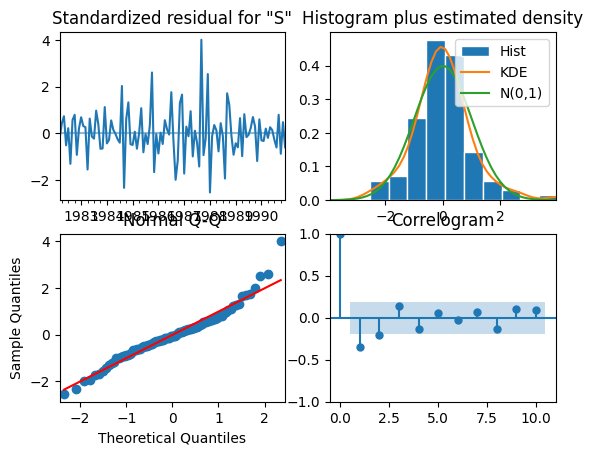

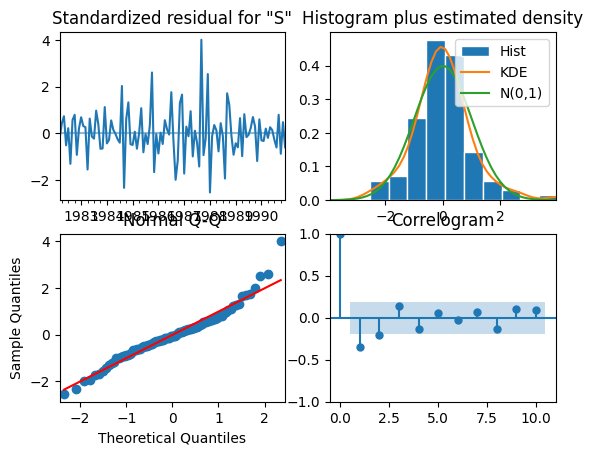

In [312]:
results_manual_SARIMA.plot_diagnostics()

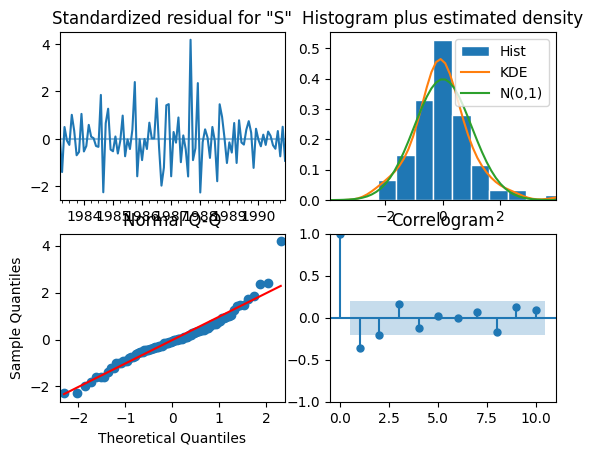

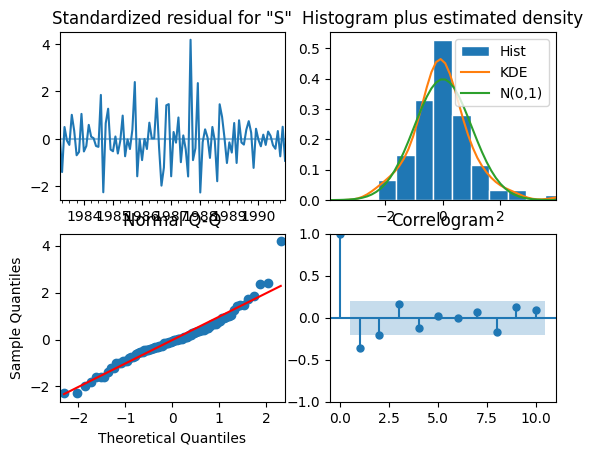

In [313]:
results_manual_SARIMA1.plot_diagnostics()

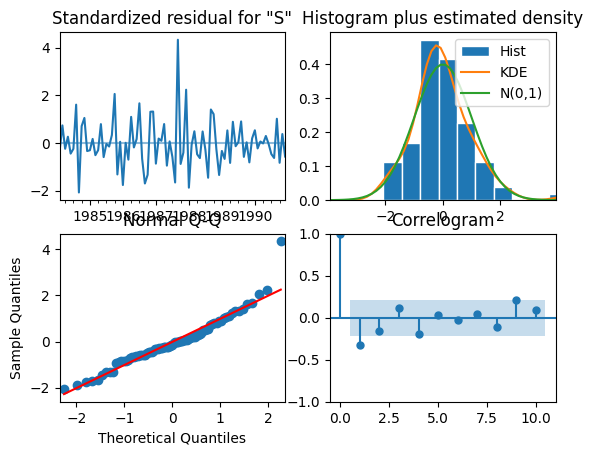

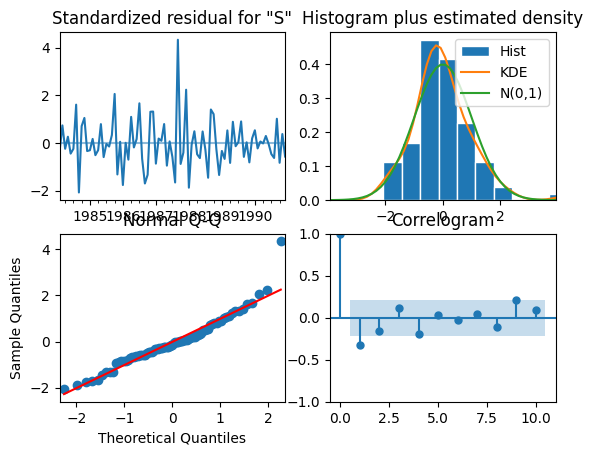

In [314]:
results_manual_SARIMA2.plot_diagnostics()

#### Predict on the Test Set using this model and evaluate the model

In [315]:
predicted_manual_SARIMA = results_manual_SARIMA.get_forecast(steps=len(test))
                                                             
predicted_manual_SARIMA1 = results_manual_SARIMA1.get_forecast(steps=len(test))

predicted_manual_SARIMA2 = results_manual_SARIMA2.get_forecast(steps=len(test))

In [316]:
rmse = mean_squared_error(test['Sparkling'],predicted_manual_SARIMA.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(test['Sparkling'],predicted_manual_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 1189.8357751406077 
MAPE: 54.87253530782019


In [317]:
rmse1 = mean_squared_error(test['Sparkling'],predicted_manual_SARIMA1.predicted_mean,squared=False)
mape1 = mean_absolute_percentage_error(test['Sparkling'],predicted_manual_SARIMA1.predicted_mean)
print('RMSE:',rmse1,'\nMAPE:',mape1)

RMSE: 1757.726876049181 
MAPE: 81.78523458248954


In [318]:
rmse2 = mean_squared_error(test['Sparkling'],predicted_manual_SARIMA2.predicted_mean,squared=False)
mape2 = mean_absolute_percentage_error(test['Sparkling'],predicted_manual_SARIMA2.predicted_mean)
print('RMSE:',rmse2,'\nMAPE:',mape2)

RMSE: 1551.6465672575314 
MAPE: 71.5662102318932


In [319]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse, rmse1, rmse2],'MAPE':[mape, mape1, mape2]}
                           ,index=['SARIMA(0,1,0)(3,1,2,12)', 'SARIMA(0,1,0)(2,1,2,12)', 'SARIMA(0,1,0)(3,1,2,12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

RMSE        MAPE
ARIMA(2,1,2)             1299.980107   47.100014
ARIMA(0,1,0)             3864.279352  201.327650
SARIMA(3,1,1)(3,0,2,12)   601.251054   25.871055
SARIMA(0,1,0)(3,1,2,12)  1189.835775   54.872535
SARIMA(0,1,0)(2,1,2,12)  1757.726876   81.785235
SARIMA(0,1,0)(3,1,2,12)  1551.646567   71.566210

In [320]:
resultsR0 = resultsDf.copy()

Text(0.5, 1.0, 'SARIMA (0, 1, 0) (1, 1, 1, 12) Forecast - SPARKLING')

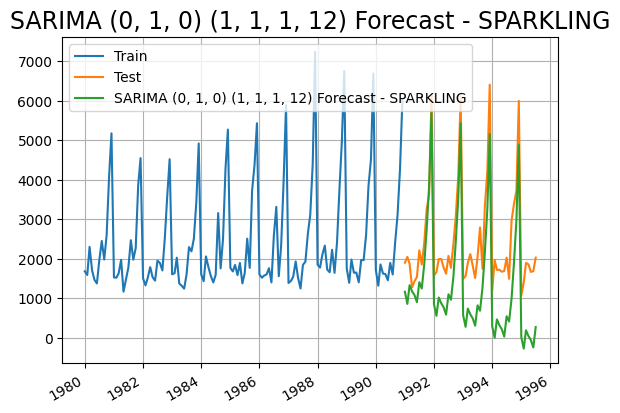

In [321]:
plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label ='Test')

predicted_manual_SARIMA.predicted_mean.plot(label = 'SARIMA (0, 1, 0) (1, 1, 1, 12) Forecast - SPARKLING')
plt.grid()
plt.legend(loc='best')
plt.title('SARIMA (0, 1, 0) (1, 1, 1, 12) Forecast - SPARKLING', fontsize=17)

Text(0.5, 1.0, 'SARIMA (0, 1, 0) (2, 1, 2, 12) Forecast - SPARKLING')

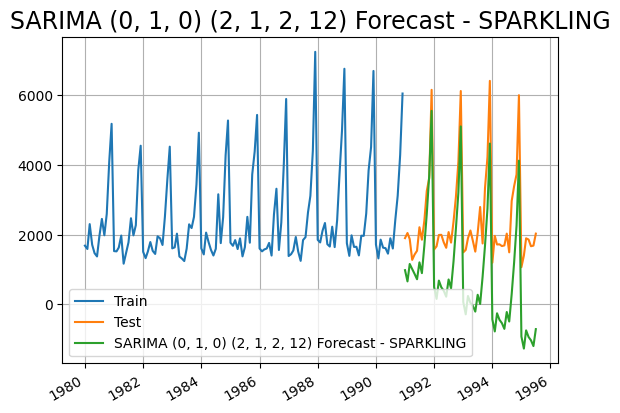

In [322]:
plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label ='Test')

predicted_manual_SARIMA1.predicted_mean.plot(label = 'SARIMA (0, 1, 0) (2, 1, 2, 12) Forecast - SPARKLING')
plt.grid()
plt.legend(loc='best')
plt.title('SARIMA (0, 1, 0) (2, 1, 2, 12) Forecast - SPARKLING', fontsize=17)

Text(0.5, 1.0, 'SARIMA (0, 1, 0) (3, 1, 2, 12) Forecast - SPARKLING')

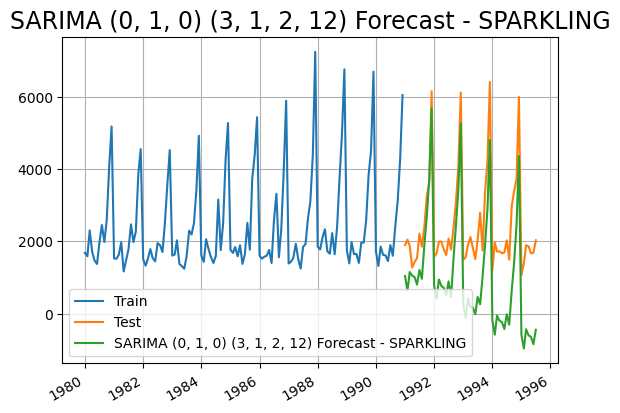

In [323]:
plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label ='Test')

predicted_manual_SARIMA2.predicted_mean.plot(label = 'SARIMA (0, 1, 0) (3, 1, 2, 12) Forecast - SPARKLING')
plt.grid()
plt.legend(loc='best')
plt.title('SARIMA (0, 1, 0) (3, 1, 2, 12) Forecast - SPARKLING', fontsize=17)

### Building the most optimum model on the Full Data

In [324]:
full_data_model = sm.tsa.statespace.SARIMAX(data['Rose'],
                                order=(2,1,2),
                                seasonal_order=(2,1,2,12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                               Rose   No. Observations:                  187
Model:             SARIMAX(2, 1, 2)x(2, 1, 2, 12)   Log Likelihood                -594.946
Date:                            Sun, 14 Jan 2024   AIC                           1207.893
Time:                                    17:24:35   BIC                           1234.807
Sample:                                01-01-1980   HQIC                          1218.828
                                     - 07-01-1995                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8156      0.102     -8.012      0.000      -1.015      -0.616
ar.L2          0.0765      0.089   

### Evaluate the model on the whole data and predict 12 months into the future

For Rose

In [325]:
predicted_manual_SARIMA_full_data = results_full_data_model.get_forecast(steps=12)

In [326]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_full_data.summary_frame(alpha=0.05)
pred_full_manual_SARIMA_date.head()

Rose             mean    mean_se  mean_ci_lower  mean_ci_upper
1995-08-01  59.169937  13.307246      33.088214      85.251661
1995-09-01  45.583748  13.722550      18.688044      72.479451
1995-10-01  45.561411  13.726926      18.657131      72.465692
1995-11-01  59.929724  13.877263      32.730789      87.128659
1995-12-01  85.530213  13.884090      58.317898     112.742529

In [327]:
rmse = mean_squared_error(data['Rose'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 36.061644097291705


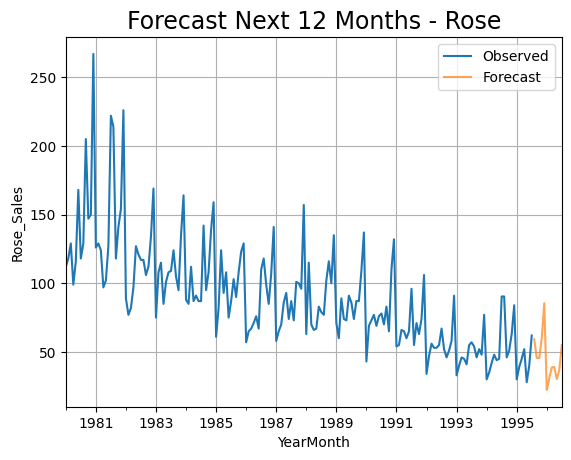

In [336]:
axis = data['Rose'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)

axis.set_xlabel('YearMonth')
axis.set_ylabel('Rose_Sales')
plt.legend(loc='best')
plt.grid();
plt.title('Forecast Next 12 Months - Rose', fontsize=17);

For Sparkling

In [330]:
full_data_model = sm.tsa.statespace.SARIMAX(data['Sparkling'],
                                order=(2,1,2),
                                seasonal_order=(2,1,2,12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model_S = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\RITU PRIYA SINGH\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                          Sparkling   No. Observations:                  187
Model:             SARIMAX(2, 1, 2)x(2, 1, 2, 12)   Log Likelihood               -1085.726
Date:                            Sun, 14 Jan 2024   AIC                           2189.453
Time:                                    17:26:20   BIC                           2216.367
Sample:                                01-01-1980   HQIC                          2200.388
                                     - 07-01-1995                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6655      0.275     -2.421      0.015      -1.204      -0.127
ar.L2         -0.0111      0.113   

In [332]:
predicted_manual_SARIMA_full_data_S = results_full_data_model_S.get_forecast(steps=12)

In [333]:
pred_full_manual_SARIMA_date_S = predicted_manual_SARIMA_full_data_S.summary_frame(alpha=0.05)
pred_full_manual_SARIMA_date_S.head()

Sparkling          mean     mean_se  mean_ci_lower  mean_ci_upper
1995-08-01  2132.780125  373.933717    1399.883507    2865.676743
1995-09-01  2359.398152  379.074528    1616.425731    3102.370574
1995-10-01  3266.883124  379.149839    2523.763095    4010.003154
1995-11-01  4040.248544  381.486413    3292.548913    4787.948175
1995-12-01  6101.118806  381.593590    5353.209112    6849.028500

In [334]:
srmse = mean_squared_error(data['Sparkling'],results_full_data_model_S.fittedvalues,squared=False)
print('RMSE of the Full Model',srmse)

RMSE of the Full Model 568.7899532597413


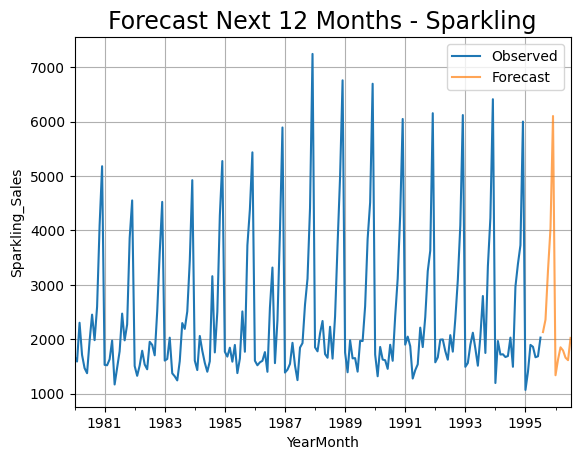

In [337]:
axis = data['Sparkling'].plot(label='Observed')
pred_full_manual_SARIMA_date_S['mean'].plot(ax=axis, label='Forecast', alpha=0.7)

axis.set_xlabel('YearMonth')
axis.set_ylabel('Sparkling_Sales')
plt.legend(loc='best')
plt.grid();
plt.title('Forecast Next 12 Months - Sparkling', fontsize=17);

In [1196]:
resultsDf

RMSE        MAPE
ARIMA(2,1,2)             1299.980107   47.100014
ARIMA(0,1,0)             3864.279352  201.327650
SARIMA(3,1,1)(3,0,2,12)   601.251054   25.871055
SARIMA(0,1,0)(3,1,2,12)  1189.835775   54.872535
SARIMA(0,1,0)(2,1,2,12)  1757.726876   81.785235
SARIMA(0,1,0)(3,1,2,12)  1551.646567   71.566210

In [1197]:
resultsS0 = resultsDf.copy()

In [1200]:
resultsS0

RMSE        MAPE
ARIMA(2,1,2)             1299.980107   47.100014
ARIMA(0,1,0)             3864.279352  201.327650
SARIMA(3,1,1)(3,0,2,12)   601.251054   25.871055
SARIMA(0,1,0)(3,1,2,12)  1189.835775   54.872535
SARIMA(0,1,0)(2,1,2,12)  1757.726876   81.785235
SARIMA(0,1,0)(3,1,2,12)  1551.646567   71.566210

### Final Predicted Values

In [1201]:
results_all_spark = pd.concat([resultsDf14, resultsS0], axis=0)
results_all_spark

Test RMSE Rose   
RegressionOnTime                                         16.979414  \
NaiveModel                                               78.396083   
SimpleAverageModel                                       52.318735   
2pointTrailingMovingAverage                              12.298291   
4pointTrailingMovingAverage                              15.845558   
6pointTrailingMovingAverage                              15.986163   
9pointTrailingMovingAverage                              16.500823   
Simple Exponential Smoothing                             35.936195   
Double Exponential Smoothing                             16.980564   
Triple Exponential Smoothing (Additive Season)           15.534165   
Triple Exponential Smoothing (Multiplicative Se...       18.775066   
Triple Exponential Smoothing (Additive Season, ...       25.263255   
Triple Exponential Smoothing (Multiplicative Se...       25.088023   
ARIMA(2,1,2)                                                   NaN   
ARIMA(0,1,0)                                                   NaN   
SARIMA(3,1,1)(3,0,2,12)                                        NaN   
SARIMA(0,1,0)(3,1,2,12)                                        NaN   
SARIMA(0,1,0)(2,1,2,12)                                        NaN   
SARIMA(0,1,0)(3,1,2,12)                                        NaN   

                                                    Test RMSE Sparkling   
RegressionOnTime                                            1389.135175  \
NaiveModel                                                  3864.279352   
SimpleAverageModel                                          1275.081804   
2pointTrailingMovingAverage                                  813.400684   
4pointTrailingMovingAverage                                 1156.589694   
6pointTrailingMovingAverage                                 1283.927428   
9pointTrailingMovingAverage                                 1346.278315   
Simple Exponential Smoothing                                1338.004623   
Double Exponential Smoothing                                5291.879833   
Triple Exponential Smoothing (Additive Season)               378.626241   
Triple Exponential Smoothing (Multiplicative Se...           403.706228   
Triple Exponential Smoothing (Additive Season, ...           378.626241   
Triple Exponential Smoothing (Multiplicative Se...           352.450966   
ARIMA(2,1,2)                                                        NaN   
ARIMA(0,1,0)                                                        NaN   
SARIMA(3,1,1)(3,0,2,12)                                             NaN   
SARIMA(0,1,0)(3,1,2,12)                                             NaN   
SARIMA(0,1,0)(2,1,2,12)                                             NaN   
SARIMA(0,1,0)(3,1,2,12)                                             NaN   

                                                           RMSE        MAPE  
RegressionOnTime                                            NaN         NaN  
NaiveModel                                                  NaN         NaN  
SimpleAverageModel                                          NaN         NaN  
2pointTrailingMovingAverage                                 NaN         NaN  
4pointTrailingMovingAverage                                 NaN         NaN  
6pointTrailingMovingAverage                                 NaN         NaN  
9pointTrailingMovingAverage                                 NaN         NaN  
Simple Exponential Smoothing                                NaN         NaN  
Double Exponential Smoothing                                NaN         NaN  
Triple Exponential Smoothing (Additive Season)              NaN         NaN  
Triple Exponential Smoothing (Multiplicative Se...          NaN         NaN  
Triple Exponential Smoothing (Additive Season, ...          NaN         NaN  
Triple Exponential Smoothing (Multiplicative Se...          NaN         NaN  
ARIMA(2,1,2)                                        1299.9